# Exploratary DA

## Import the data

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [213]:
data = pd.read_csv(r"C:\Users\user\Desktop\RA\uselection_tweets_1jul_11nov.csv", delimiter=';')

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24201654 entries, 0 to 24201653
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Created-At        object 
 1   From-User-Id      int64  
 2   To-User-Id        int64  
 3   Language          object 
 4   Retweet-Count     float64
 5   PartyName         object 
 6   Id                int64  
 7   Score             float64
 8   Scoring String    object 
 9   Negativity        float64
 10  Positivity        float64
 11  Uncovered Tokens  int64  
 12  Total Tokens      int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 2.3+ GB


In [215]:
data.head(5)

Created-At         From-User-Id  To-User-Id Language  Retweet-Count  \
0  7/1/20 7:44 PM  1223446325758394369   387882597       en            0.0   
1  7/1/20 7:44 PM  1001407960252342273          -1       en          178.0   
2  7/1/20 7:44 PM  1178522693840392195          -1       en            2.0   
3  7/1/20 7:44 PM             64267482    65497475       en            0.0   
4  7/1/20 7:44 PM  1068507190103699456          -1       en           28.0   

     PartyName                   Id     Score  \
0    BothParty  1278368973948694528  0.102564   
1  Republicans  1278368973923528704 -0.589744   
2    Democrats  1278368973910937600  0.692308   
3  Republicans  1278368973893951489 -1.461538   
4  Republicans  1278368973881511936  0.025641   

                                      Scoring String  Negativity  Positivity  \
0         yep (0.31)  torturing (-0.77)  care (0.56)    0.769231    0.871795   
1                                       ugly (-0.59)    0.589744    0.000000   
2                            okay (0.23)  lol (0.46)    0.000000    0.692308   
3  damage (-0.56)  incompetent (-0.54)  resign (-...    1.461538    0.000000   
4         clean (0.44)  threat (-0.62)  admit (0.21)    0.615385    0.641026   

   Uncovered Tokens  Total Tokens  
0                21            24  
1                22            23  
2                17            19  
3                30            33  
4                28            31

In [217]:
# By different party name

# Convert 'Created-At' to datetime
data['Created-At'] = pd.to_datetime(data['Created-At'])

C:\Users\user\AppData\Local\Temp\ipykernel_10572\1355038436.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Created-At'] = pd.to_datetime(data['Created-At'])


In [218]:
data["Created-At"].describe()

count                         24201654
mean     2020-09-26 06:56:16.735386112
min                2020-07-01 19:44:00
25%                2020-09-01 15:46:00
50%                2020-10-08 11:58:00
75%                2020-10-25 19:41:00
max                2020-11-12 17:47:00
Name: Created-At, dtype: object

In [219]:
data["Retweet-Count"].describe()

count    2.420165e+07
mean     4.663662e+03
std      1.848883e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.380000e+02
75%      2.536000e+03
max      6.254950e+05
Name: Retweet-Count, dtype: float64

In [223]:
retweet_range = max(data["Retweet-Count"]) -  min(data["Retweet-Count"])
retweet_range

625495.0

In [220]:
data["Score"].describe()

count    2.420165e+07
mean     1.151341e-02
std      7.239484e-01
min     -5.205128e+01
25%     -3.076923e-01
50%      0.000000e+00
75%      3.846154e-01
max      3.338462e+01
Name: Score, dtype: float64

In [224]:
score_range = max(data["Score"]) - min(data["Score"])
score_range

85.43589743589743

In [225]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Percentage of missing data per column
percentage_missing = data.isnull().mean() * 100
print("Percentage of missing data per column:")
print(percentage_missing)


Missing values per column:
Created-At                0
From-User-Id              0
To-User-Id                0
Language                  0
Retweet-Count             0
PartyName                 0
Id                        0
Score                     0
Scoring String      6858797
Negativity                0
Positivity                0
Uncovered Tokens          0
Total Tokens              0
dtype: int64
Percentage of missing data per column:
Created-At           0.000000
From-User-Id         0.000000
To-User-Id           0.000000
Language             0.000000
Retweet-Count        0.000000
PartyName            0.000000
Id                   0.000000
Score                0.000000
Scoring String      28.340199
Negativity           0.000000
Positivity           0.000000
Uncovered Tokens     0.000000
Total Tokens         0.000000
dtype: float64


In [226]:
# Check data types
print("Data Types:")
print(data.dtypes)

# Count unexpected zeros in specific columns
zeros_in_retweet_count = (data['Retweet-Count'] == 0).sum()
print("Number of zeros in Retweet-Count:", zeros_in_retweet_count)


Data Types:
Created-At          datetime64[ns]
From-User-Id                 int64
To-User-Id                   int64
Language                    object
Retweet-Count              float64
PartyName                   object
Id                           int64
Score                      float64
Scoring String              object
Negativity                 float64
Positivity                 float64
Uncovered Tokens             int64
Total Tokens                 int64
dtype: object
Number of zeros in Retweet-Count: 6895226


In [ ]:
# 假设数据集存储在一个名为 df 的 DataFrame 中
# 找到相同“score string”的行
grouped = data.groupby('Scoring String')

# 过滤掉那些只有一个条目的组
similar_posts = grouped.filter(lambda x: len(x) > 1)



# 查看结果
print(similar_posts)



                            From-User-Id           To-User-Id Language  \
Created-At                                                               
2020-07-01 19:44:00  1001407960252342273                   -1       en   
2020-07-01 19:44:00  1178522693840392195                   -1       en   
2020-07-01 19:44:00            376033756                   -1       en   
2020-07-01 19:44:00            306418365                   -1       en   
2020-07-01 19:44:00           1075573514                   -1       en   
...                                  ...                  ...      ...   
2020-11-12 17:47:00           2358110239                   -1       es   
2020-11-12 17:47:00           3421791370            195725305       en   
2020-11-12 17:47:00           1166761314                   -1       en   
2020-11-12 17:47:00            930244920             25073877       en   
2020-11-12 17:47:00            522420024  1166069567468310529       en   

                     Retweet-Count   

In [ ]:
# Find the row with the specified ID
specific_row = data[data['Id'] == 1278368973688418304]

# Display the row
print(specific_row)

       Created-At  From-User-Id  To-User-Id Language  Retweet-Count  \
8  7/1/20 7:44 PM    1075573514          -1       en        18011.0   

     PartyName                   Id     Score              Scoring String  \
8  Republicans  1278368973688418304 -0.179487  no (-0.31)  defense (0.13)   

   Negativity  Positivity  Uncovered Tokens  Total Tokens  
8    0.307692    0.128205                25            27  


In [ ]:
# Find the row with the specified ID
specific_row = data[data['Id'] == 1278368973835456515]

# Display the row
print(specific_row)

       Created-At  From-User-Id  To-User-Id Language  Retweet-Count PartyName  \
5  7/1/20 7:44 PM     376033756          -1       en        61527.0   Neither   

                    Id     Score                          Scoring String  \
5  1278368973835456515  0.076923  stop (-0.31)  won (0.69)  stop (-0.31)   

   Negativity  Positivity  Uncovered Tokens  Total Tokens  
5    0.615385    0.692308                31            34  


In [ ]:
# Find the row with the specified ID
specific_row = data[data['From-User-Id'] == 1075573514]

# Display the row
print(specific_row)

                Created-At  From-User-Id          To-User-Id Language  \
8           7/1/20 7:44 PM    1075573514                  -1       en   
50014       7/2/20 5:49 AM    1075573514                  -1      und   
250083     7/3/20 10:07 PM    1075573514                  -1       en   
251967     7/3/20 10:07 PM    1075573514                  -1       en   
257313     7/3/20 10:08 PM    1075573514                  -1       en   
363601      7/4/20 8:18 PM    1075573514                  -1       en   
761757      7/8/20 4:54 AM    1075573514                  -1       en   
789816      7/8/20 8:57 AM    1075573514                  -1       en   
1110306    7/11/20 3:30 AM    1075573514            26642006       en   
1118139    7/11/20 3:31 AM    1075573514  834913928270471172      und   
1370797    7/13/20 7:50 AM    1075573514                  -1       en   
1389120    7/13/20 9:54 AM    1075573514                  -1       en   
1500083    7/14/20 9:59 AM    1075573514           

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24201654 entries, 0 to 24201653
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Created-At        object 
 1   From-User-Id      int64  
 2   To-User-Id        int64  
 3   Language          object 
 4   Retweet-Count     float64
 5   PartyName         object 
 6   Id                int64  
 7   Score             float64
 8   Scoring String    object 
 9   Negativity        float64
 10  Positivity        float64
 11  Uncovered Tokens  int64  
 12  Total Tokens      int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 2.3+ GB


## Sentiment Distribution by different categories

In [7]:


# Group by 'PartyName' and calculate summary statistics for 'Score'
grouped_party = data.groupby('PartyName')['Score'].describe()

# Display the summary statistics
print(grouped_party)

C:\Users\user\AppData\Local\Temp\ipykernel_10572\2954581857.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Created-At'] = pd.to_datetime(data['Created-At'])


                  count      mean       std        min       25%  50%  \
PartyName                                                               
BothParty     2207960.0  0.008014  0.715314 -16.153846 -0.333333  0.0   
Democrats     4562488.0  0.117513  0.686945 -33.025641 -0.102564  0.0   
Neither       3883327.0 -0.014130  0.713448 -23.410256 -0.333333  0.0   
Republicans  13547879.0 -0.016263  0.737081 -52.051282 -0.358974  0.0   

                  75%        max  
PartyName                         
BothParty    0.384615  30.820513  
Democrats    0.461538  25.128205  
Neither      0.358974  30.512821  
Republicans  0.384615  33.384615  


In [8]:
data['Created-At'].describe()

count                         24201654
mean     2020-09-26 06:56:16.735386112
min                2020-07-01 19:44:00
25%                2020-09-01 15:46:00
50%                2020-10-08 11:58:00
75%                2020-10-25 19:41:00
max                2020-11-12 17:47:00
Name: Created-At, dtype: object

<Figure size 1200x600 with 0 Axes>

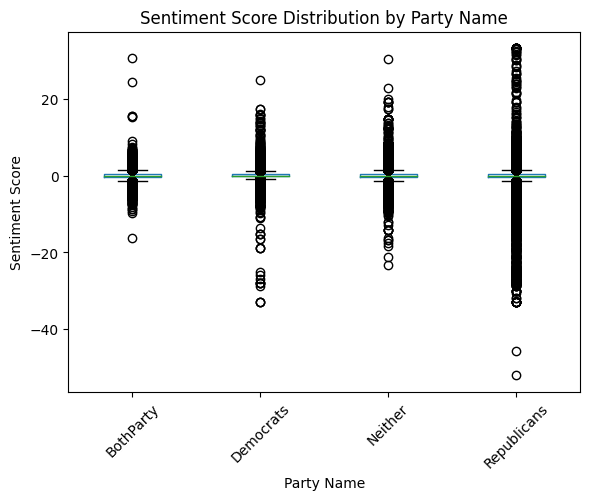

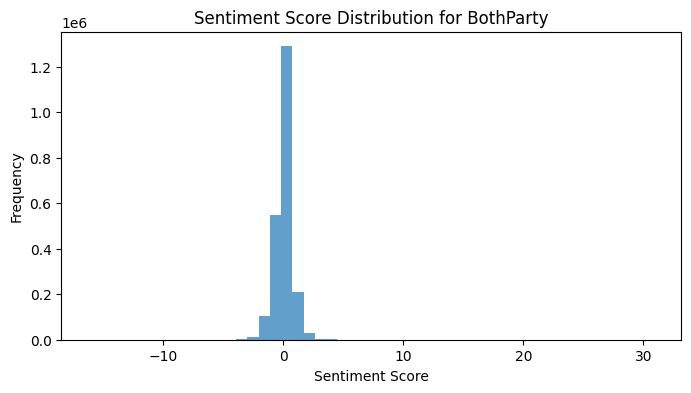

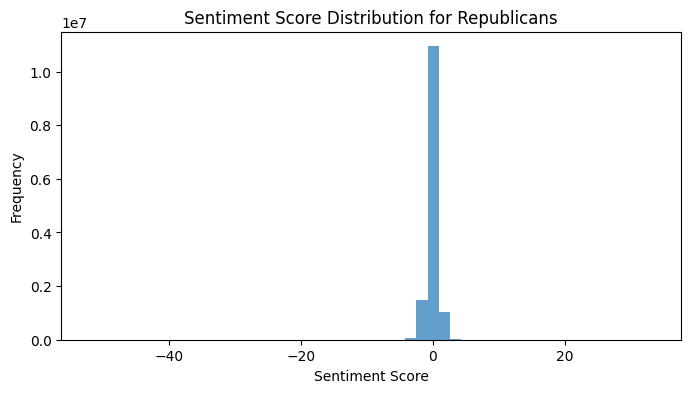

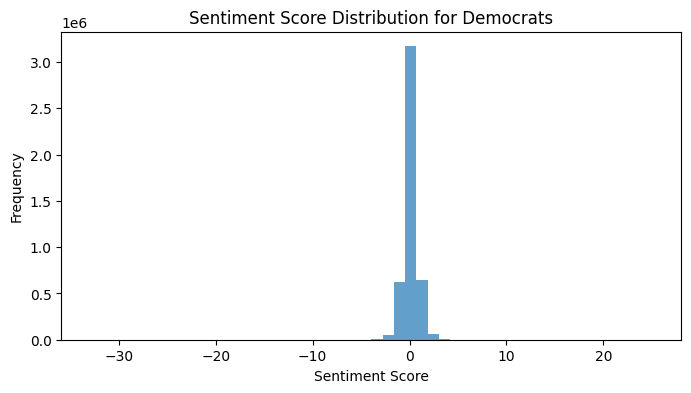

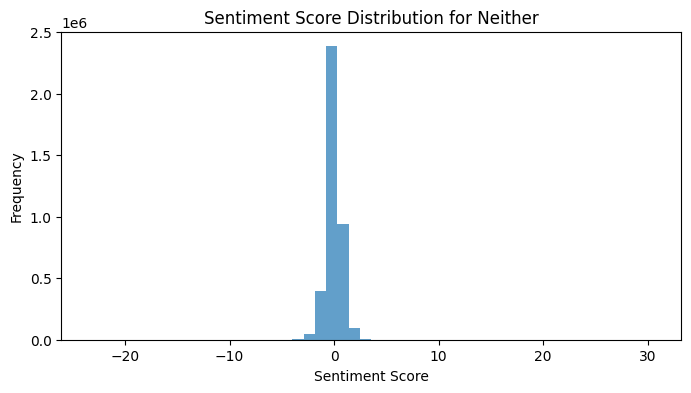

In [ ]:
# Visualize the distribution of sentiment scores by 'PartyName'
plt.figure(figsize=(12, 6))
data.boxplot(column='Score', by='PartyName', grid=False)
plt.title('Sentiment Score Distribution by Party Name')
plt.suptitle('')
plt.xlabel('Party Name')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

# Alternatively, use histograms
party_names = data['PartyName'].unique()
for party in party_names:
    plt.figure(figsize=(8, 4))
    plt.hist(data[data['PartyName'] == party]['Score'], bins=50, alpha=0.7)
    plt.title(f'Sentiment Score Distribution for {party}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

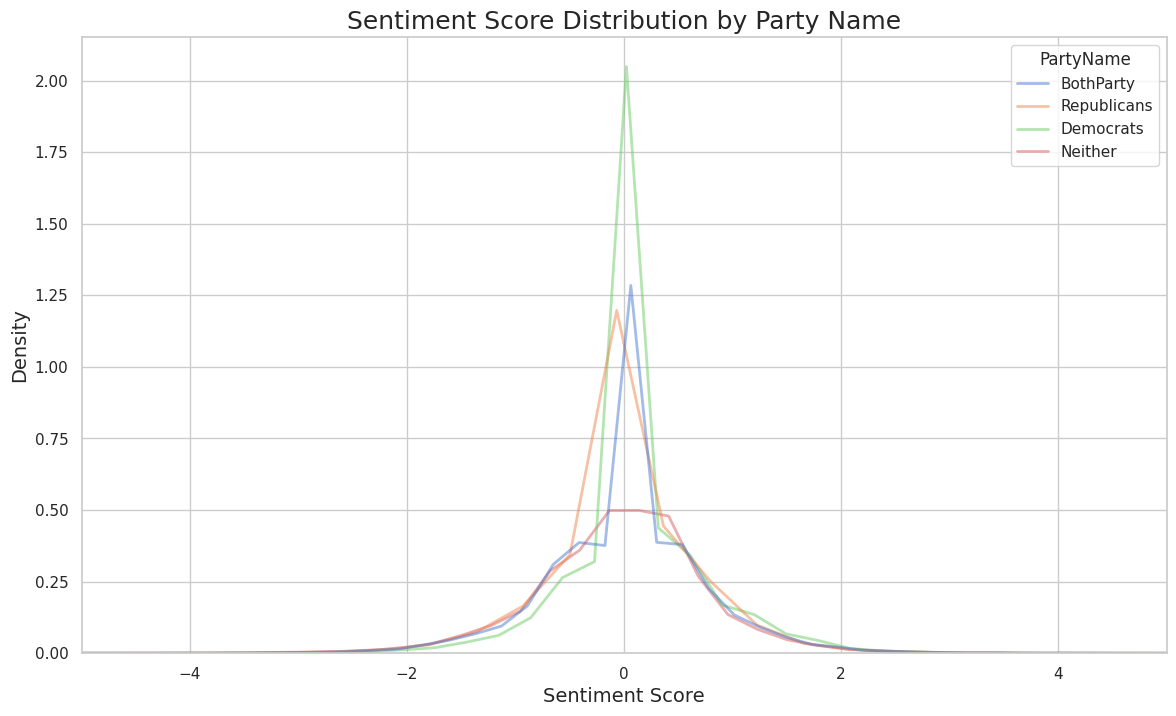

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Create the distribution plot with adjustments
plt.figure(figsize=(14, 8))
sns.kdeplot(data=data, x="Score", hue="PartyName", fill=False, common_norm=False,
            palette="muted", alpha=0.5, linewidth=2, bw_adjust=2)


# Set the plot title and labels
plt.title("Sentiment Score Distribution by Party Name", fontsize=18)
plt.xlabel("Sentiment Score", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Adjust x-axis range to focus on relevant sentiment scores
plt.xlim(-5, 5)

# Show the plot
plt.show()

## sentiment distribution analysis

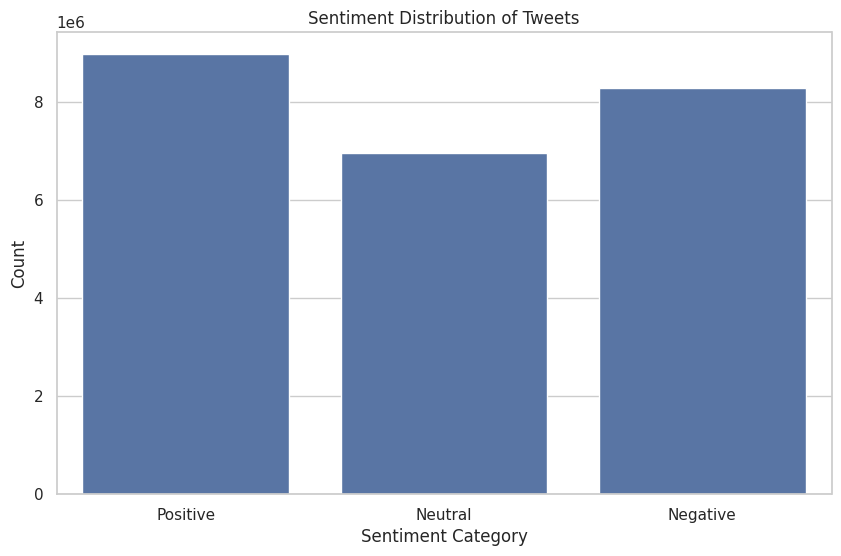

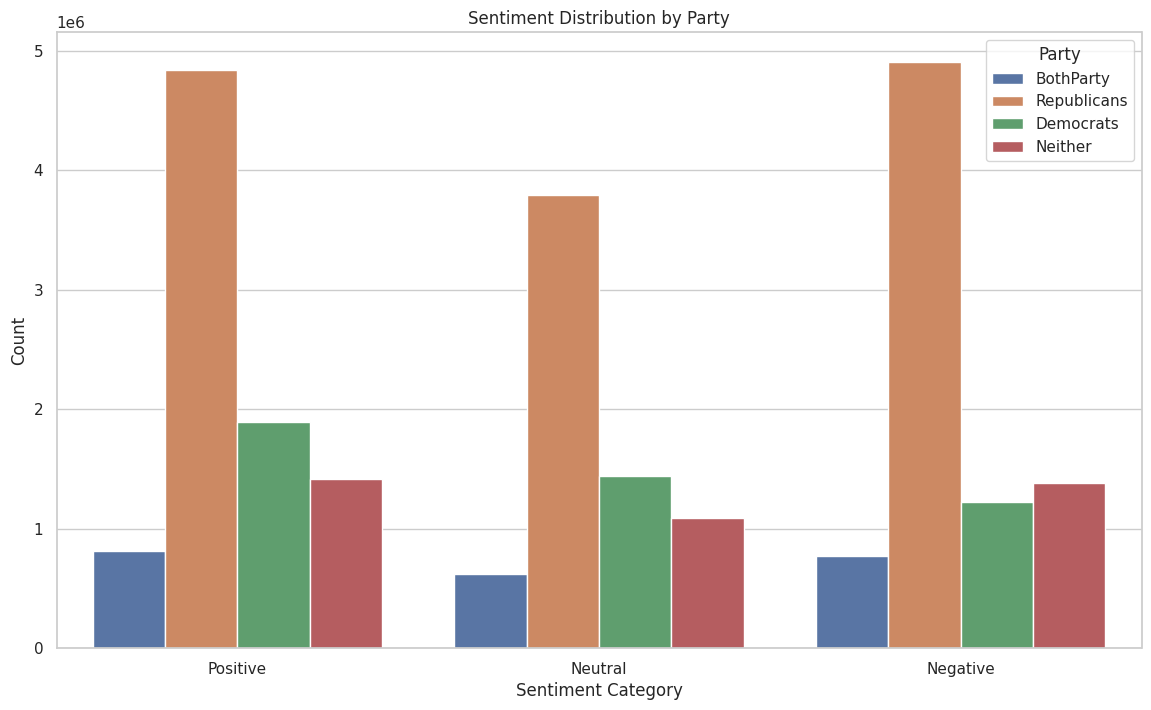

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define sentiment categories
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization
data['Sentiment_Category'] = data['Score'].apply(categorize_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sentiment_Category', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Plot sentiment distribution by party
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='Sentiment_Category', hue='PartyName', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution by Party')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.legend(title='Party')
plt.show()


In [5]:
data['Sentiment_Category']

KeyError: 'Sentiment_Category'

In [ ]:
# Group by 'PartyName' and 'Sentiment_Category' to get counts
sentiment_counts = data.groupby(['PartyName', 'Sentiment_Category']).size().unstack(fill_value=0)

# Calculate the total tweets for each party
total_tweets = sentiment_counts.sum(axis=1)

# Calculate the ratio of each sentiment category
sentiment_ratios = sentiment_counts.divide(total_tweets, axis=0)

# Display the sentiment ratios
print(sentiment_ratios)

Sentiment_Category  Negative   Neutral  Positive
PartyName                                       
BothParty           0.348412  0.282893  0.368696
Democrats           0.268806  0.316449  0.414746
Neither             0.355125  0.279834  0.365041
Republicans         0.362473  0.280330  0.357197


In [ ]:
# Group by Sentiment_Category and get the count
sentiment_distribution = data['Sentiment_Category'].value_counts().reset_index()
sentiment_distribution.columns = ['Sentiment_Category', 'Count']

# Calculate the percentage
total_count = sentiment_distribution['Count'].sum()
sentiment_distribution['Percentage'] = (sentiment_distribution['Count'] / total_count) * 100

# Display the sentiment distribution
print("Sentiment Distribution DataFrame:")
print(sentiment_distribution)

Sentiment Distribution DataFrame:
  Sentiment_Category    Count  Percentage
0           Positive  8963173   37.035374
1           Negative  8285512   34.235313
2            Neutral  6952969   28.729313


In [ ]:
# Group by PartyName and Sentiment_Category to get the counts
party_sentiment_distribution = data.groupby(['PartyName', 'Sentiment_Category']).size().reset_index(name='Count')

# Pivot the table for better readability
party_sentiment_pivot = party_sentiment_distribution.pivot(index='PartyName', columns='Sentiment_Category', values='Count').fillna(0).reset_index()

# Display the party sentiment distribution
print("Party Sentiment Distribution DataFrame:")
print(party_sentiment_pivot)


Party Sentiment Distribution DataFrame:
Sentiment_Category    PartyName  Negative  Neutral  Positive
0                     BothParty    769279   624616    814065
1                     Democrats   1226422  1443794   1892272
2                       Neither   1379065  1086688   1417574
3                   Republicans   4910746  3797871   4839262


### standard deviation of sentiment score by Parties

In [ ]:
# Group by PartyName and calculate the mean and standard deviation of sentiment scores
party_sentiment_stats = data.groupby('PartyName')['Score'].agg(['mean', 'std']).reset_index()

# Rename the columns for clarity
party_sentiment_stats.columns = ['PartyName', 'Sentiment_Mean', 'Sentiment_STD']

# Display the results
print("Sentiment Mean and Standard Deviation by Party:")
print(party_sentiment_stats)


Sentiment Mean and Standard Deviation by Party:
     PartyName  Sentiment_Mean  Sentiment_STD
0    BothParty        0.008014       0.715314
1    Democrats        0.117513       0.686945
2      Neither       -0.014130       0.713448
3  Republicans       -0.016263       0.737081


##### create a "date" column

In [9]:
data['Day'] = data['Created-At'].dt.to_period('D')

In [11]:
data.head()

Created-At         From-User-Id  To-User-Id Language  \
0 2020-07-01 19:44:00  1223446325758394369   387882597       en   
1 2020-07-01 19:44:00  1001407960252342273          -1       en   
2 2020-07-01 19:44:00  1178522693840392195          -1       en   
3 2020-07-01 19:44:00             64267482    65497475       en   
4 2020-07-01 19:44:00  1068507190103699456          -1       en   

   Retweet-Count    PartyName                   Id     Score  \
0            0.0    BothParty  1278368973948694528  0.102564   
1          178.0  Republicans  1278368973923528704 -0.589744   
2            2.0    Democrats  1278368973910937600  0.692308   
3            0.0  Republicans  1278368973893951489 -1.461538   
4           28.0  Republicans  1278368973881511936  0.025641   

                                      Scoring String  Negativity  Positivity  \
0         yep (0.31)  torturing (-0.77)  care (0.56)    0.769231    0.871795   
1                                       ugly (-0.59)    0.589744    0.000000   
2                            okay (0.23)  lol (0.46)    0.000000    0.692308   
3  damage (-0.56)  incompetent (-0.54)  resign (-...    1.461538    0.000000   
4         clean (0.44)  threat (-0.62)  admit (0.21)    0.615385    0.641026   

   Uncovered Tokens  Total Tokens         Day  
0                21            24  2020-07-01  
1                22            23  2020-07-01  
2                17            19  2020-07-01  
3                30            33  2020-07-01  
4                28            31  2020-07-01

In [ ]:
# Filter for tweets where 'To-User-Id' == -1 and 'Retweet-Count' > 0
testing_tweets = data[(data['Retweet-Count'] > 0) & (data['To-User-Id'] == -1)]

# Randomly select 20 samples
if len(testing_tweets) >= 20:
    sampled_retweets = testing_tweets.sample(n=20)
    print(sampled_retweets[['Id', 'Retweet-Count', 'To-User-Id']])
else:
    print(f"Only {len(testing_tweets)} tweets found with the specified criteria.")

                           Id  Retweet-Count  To-User-Id
22194347  1324815377679855616          896.0          -1
14379347  1316216893288710145        13089.0          -1
10870573  1311158876654448640        18300.0          -1
21711798  1324519996958146561          291.0          -1
22033336  1324723691847098369         3640.0          -1
8691683   1307137852036317186         5563.0          -1
6565832   1302266308059435008         1057.0          -1
1156153   1281868768520667136          542.0          -1
3461642   1293361911661244417         2595.0          -1
13597443  1315419086092824576          373.0          -1
8945792   1307732484101206016        35367.0          -1
16851076  1318813817883774976         8136.0          -1
15671256  1317628051258183680            1.0          -1
13546938  1315371334319443970            1.0          -1
9058798   1307983559186055169          273.0          -1
16631672  1318596646729633792         1152.0          -1
15740208  1317706434558201856  

In [ ]:
# Filter for tweets where 'To-User-Id' == -1 and 'Retweet-Count' > 0
testing_orignal_tweets = data[(data['Retweet-Count'] == 0) & (data['To-User-Id'] == -1)]

# Randomly select 20 samples
if len(testing_orignal_tweets) >= 20:
    sampled_retweets = testing_orignal_tweets.sample(n=20)
    print(sampled_retweets[['Id', 'Retweet-Count', 'To-User-Id']])
else:
    print(f"Only {len(testing_orignal_tweets)} tweets found with the specified criteria.")

                           Id  Retweet-Count  To-User-Id
6845512   1302906265509789696            0.0          -1
2787065   1291291029426053121            0.0          -1
19755120  1322774631288221697            0.0          -1
12358191  1314331600050630659            0.0          -1
21580663  1324428881978368013            0.0          -1
5069306   1297098383870562304            0.0          -1
13854666  1315672154906787840            0.0          -1
2211660   1287097006356410372            0.0          -1
22663215  1325149658029711360            0.0          -1
3737685   1294033286453493766            0.0          -1
14237598  1316068681852489728            0.0          -1
9051905   1307961104673525760            0.0          -1
20094279  1323108167463575554            0.0          -1
23261397  1325556917524107264            0.0          -1
6577118   1302289228693491719            0.0          -1
2667743   1288527168276922369            0.0          -1
23206939  1325513921265094663  

## Sentiment distribution by time series

In [12]:
data.set_index('Created-At', inplace=True)

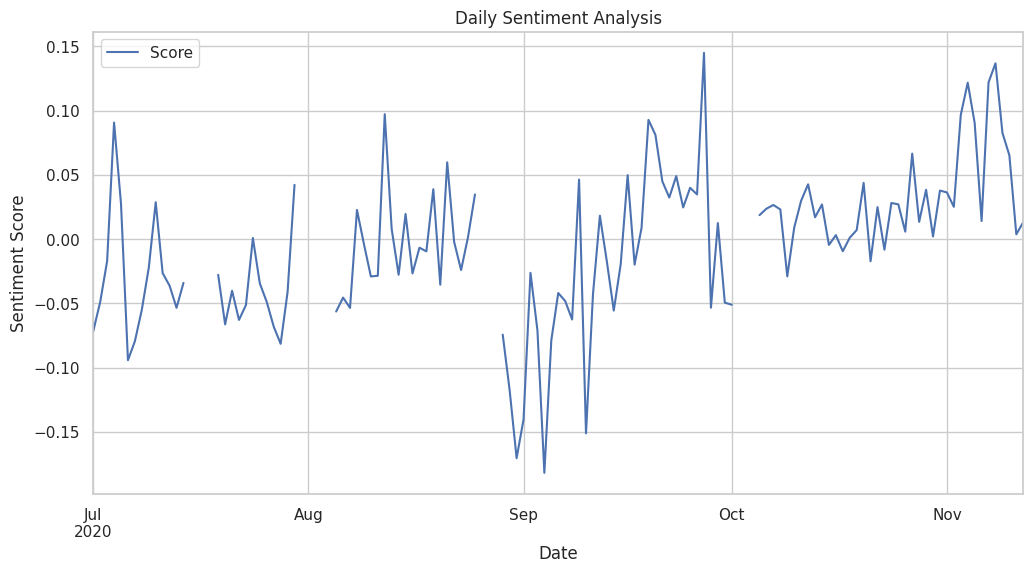

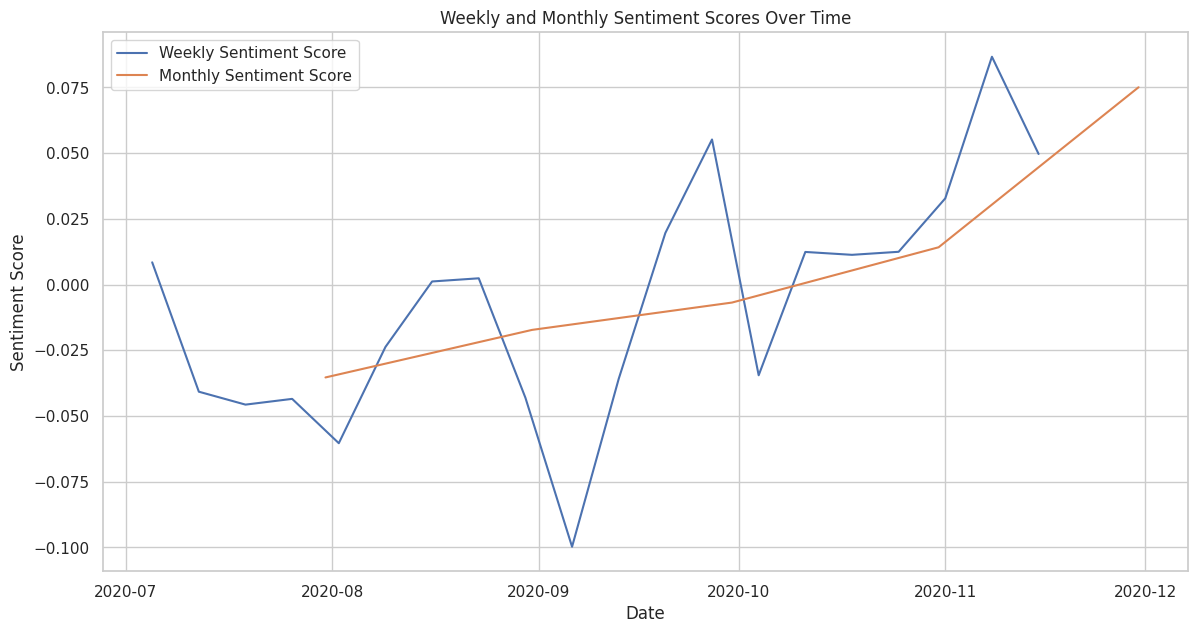

In [ ]:


daily_sentiment = data['Score'].resample('D').mean()

plt.figure(figsize=(12, 6))
daily_sentiment.plot()
plt.title('Daily Sentiment Analysis')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


# For more granularity, you can also resample weekly or monthly
weekly_sentiment = data['Score'].resample('W').mean()
monthly_sentiment = data['Score'].resample('M').mean()

# Plot the weekly and monthly time series for comparison
plt.figure(figsize=(14, 7))
plt.plot(weekly_sentiment, label='Weekly Sentiment Score')
plt.plot(monthly_sentiment, label='Monthly Sentiment Score')
plt.title('Weekly and Monthly Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

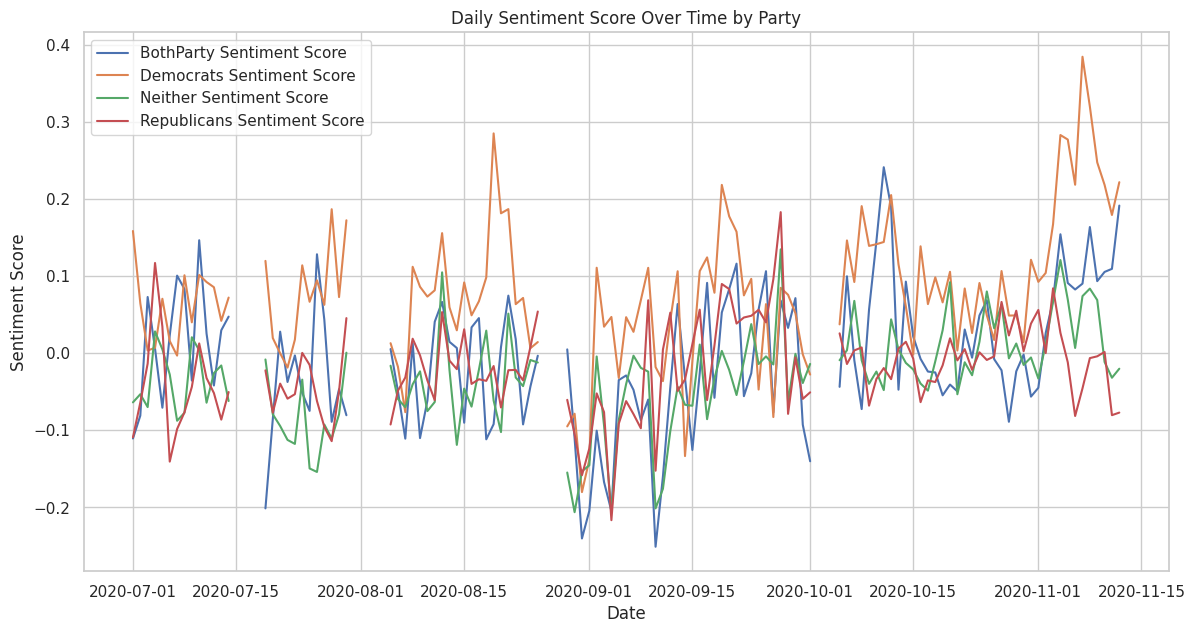

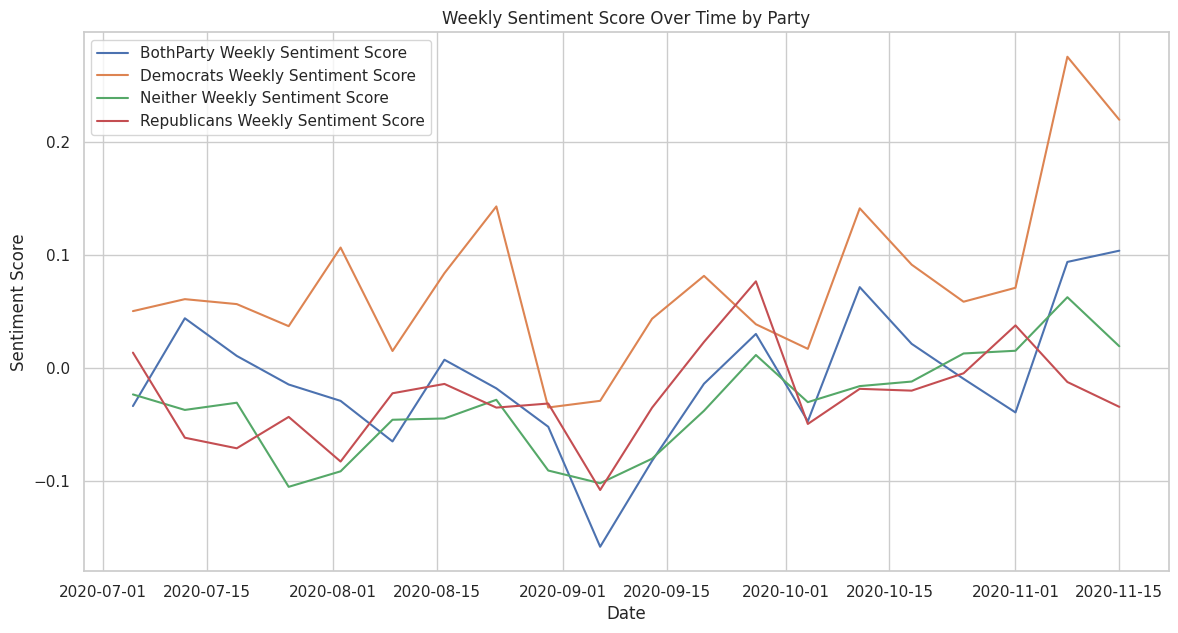

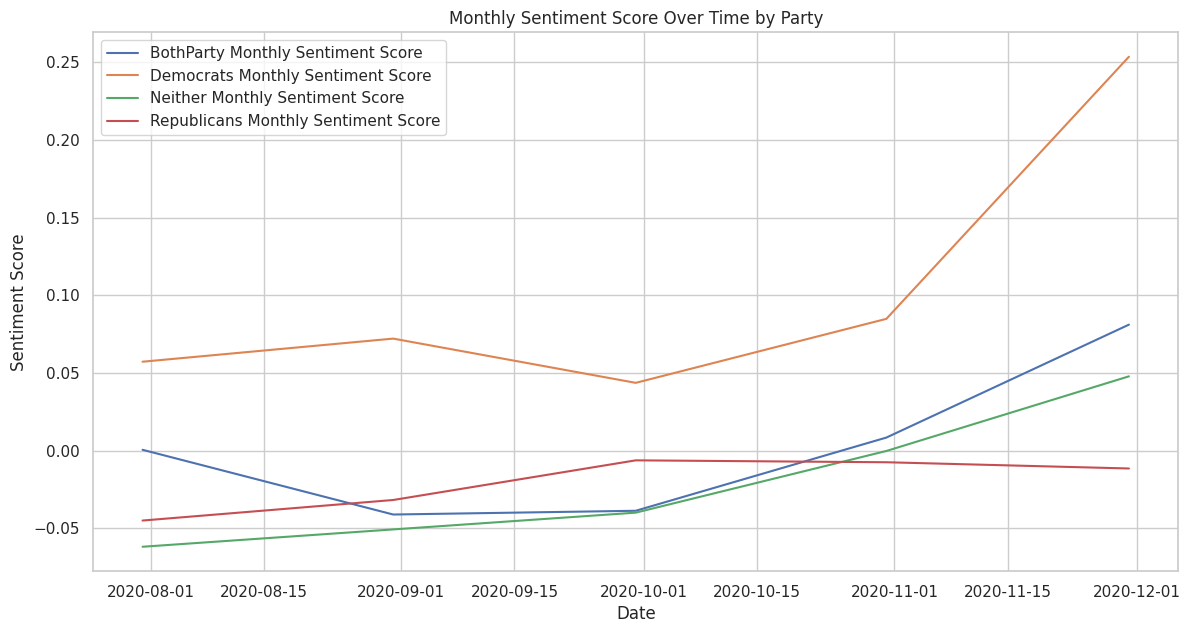

In [ ]:
# Resample and calculate the mean sentiment score by party
party_sentiment = data.groupby('PartyName')['Score'].resample('D').mean().unstack('PartyName')

# Plot the time series of sentiment scores for each party
plt.figure(figsize=(14, 7))
for party in party_sentiment.columns:
    plt.plot(party_sentiment[party], label=f'{party} Sentiment Score')
plt.title('Daily Sentiment Score Over Time by Party')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

# For more granularity, you can also resample weekly or monthly
party_sentiment_weekly = data.groupby('PartyName')['Score'].resample('W').mean().unstack('PartyName')
party_sentiment_monthly = data.groupby('PartyName')['Score'].resample('M').mean().unstack('PartyName')

# Plot the weekly and monthly time series for comparison
plt.figure(figsize=(14, 7))
for party in party_sentiment_weekly.columns:
    plt.plot(party_sentiment_weekly[party], label=f'{party} Weekly Sentiment Score')
plt.title('Weekly Sentiment Score Over Time by Party')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
for party in party_sentiment_monthly.columns:
    plt.plot(party_sentiment_monthly[party], label=f'{party} Monthly Sentiment Score')
plt.title('Monthly Sentiment Score Over Time by Party')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Load your dataset
# df = pd.read_csv('your_dataset.csv') # Modify this line to load your actual dataset

# Filter for replies
replies = data[data['To-User-Id'] != -1]

# Check if any reply has a non-zero retweet count
non_zero_retweets_in_replies = replies[replies['Retweet-Count'] != 0]

# Display the result
print(non_zero_retweets_in_replies)

# Count the number of such cases
count_non_zero_retweets_in_replies = len(non_zero_retweets_in_replies)
print(f"Number of replies with non-zero retweet count: {count_non_zero_retweets_in_replies}")


                            From-User-Id           To-User-Id Language  \
Created-At                                                               
2020-07-01 19:44:00           4509862400   739184414341640192       da   
2020-07-01 19:44:00  1204945057125679104             17087924       en   
2020-07-01 19:44:00            341180845            341180845       en   
2020-07-01 19:44:00             50468914             16106584       en   
2020-07-01 19:44:00             19808401             25073877       en   
...                                  ...                  ...      ...   
2020-11-12 01:57:00   976326038958481408   976326038958481408       ja   
2020-11-12 01:57:00   962708582230888449            477012156       en   
2020-11-12 01:57:00  1271834070314606592             28453911       en   
2020-11-12 01:57:00  1321645788615876611  1322417358498050048      und   
2020-11-12 01:57:00  1317668845654454273             14247236       en   

                     Retweet-Count   

## Categoriezd tweets

In [13]:
# Define a function to categorize the tweet
def categorize_tweet(row):
    if row['To-User-Id'] != -1:
        return 'Reply'
    elif row['Retweet-Count'] > 0:
        return 'Retweet'
    else:
        return 'Original Post'

# Apply the function to create a new column 'Tweet_Type'
data['Tweet_Type'] = data.apply(categorize_tweet, axis=1)

# Display the first few rows to verify
print(data[['To-User-Id', 'Retweet-Count', 'Tweet_Type']].head())












                     To-User-Id  Retweet-Count Tweet_Type
Created-At                                               
2020-07-01 19:44:00   387882597            0.0      Reply
2020-07-01 19:44:00          -1          178.0    Retweet
2020-07-01 19:44:00          -1            2.0    Retweet
2020-07-01 19:44:00    65497475            0.0      Reply
2020-07-01 19:44:00          -1           28.0    Retweet


In [ ]:
# Filter out retweets
#df_filtered = data[data['Tweet_Type'] != 'Retweet']

# Compute summary statistics for sentiment scores
summary_stats = data.groupby('Tweet_Type')['Score'].describe()

# Display the summary statistics
print(summary_stats)

                    count      mean       std        min       25%  50%  \
Tweet_Type                                                                
Original Post   1691127.0 -0.021173  0.798648 -25.846154 -0.358974  0.0   
Reply           5275947.0 -0.020531  0.826383 -52.051282 -0.333333  0.0   
Retweet        17234580.0  0.024530  0.680983 -16.666667 -0.307692  0.0   

                    75%        max  
Tweet_Type                          
Original Post  0.384615  19.384615  
Reply          0.384615  33.384615  
Retweet        0.384615  19.384615  


<Figure size 1000x600 with 0 Axes>

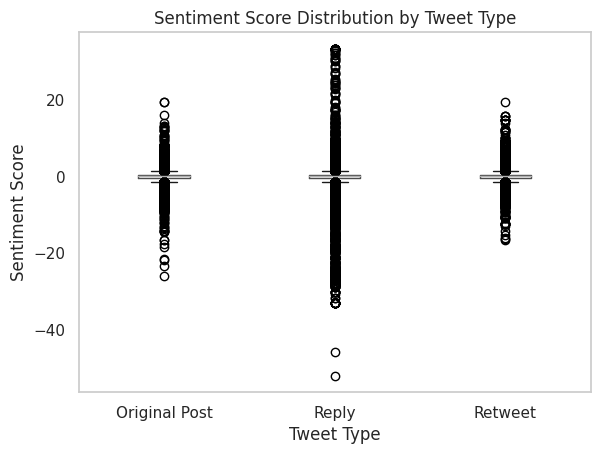

In [ ]:
# Create a box plot for sentiment scores
plt.figure(figsize=(10, 6))
data.boxplot(column='Score', by='Tweet_Type', grid=False)
plt.title('Sentiment Score Distribution by Tweet Type')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Tweet Type')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_filtered = data[data['Tweet_Type'] != 'Retweet']

## Weekly Sentiment Score Over Time by Tweet Type

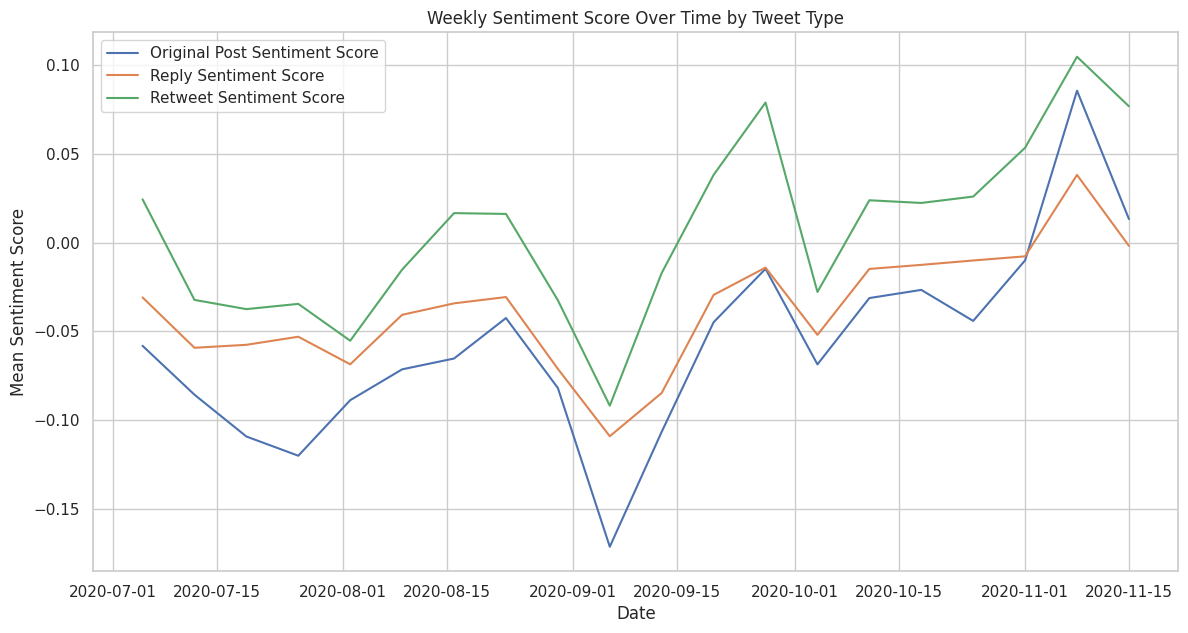

In [ ]:


# Resample the data by time (e.g., weekly) and calculate the mean sentiment score for each tweet type
weekly_sentiment = data.groupby('Tweet_Type')['Score'].resample('W').mean().unstack('Tweet_Type')

# Plot the time series of sentiment scores for each tweet type
plt.figure(figsize=(14, 7))
for tweet_type in weekly_sentiment.columns:
    plt.plot(weekly_sentiment.index, weekly_sentiment[tweet_type], label=f'{tweet_type} Sentiment Score')
plt.title('Weekly Sentiment Score Over Time by Tweet Type')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.legend()
plt.show()

## Statistical Testing

### ANOVA for all types of posts

In [ ]:
from scipy.stats import f_oneway, shapiro, levene
# Extract sentiment scores for each tweet type
original_post_scores = data[data['Tweet_Type'] == 'Original Post']['Score']
reply_scores = data[data['Tweet_Type'] == 'Reply']['Score']
retweet_scores = data[data['Tweet_Type'] == 'Retweet']['Score']

# Perform one-way ANOVA
anova_test = f_oneway(original_post_scores, reply_scores, retweet_scores)
print(f"One-way ANOVA test result: F-statistic = {anova_test.statistic}, p-value = {anova_test.pvalue}")

One-way ANOVA test result: F-statistic = 9685.86323644038, p-value = 0.0


there are statistically significant differences in the sentiment scores among the three tweet types (Original Post, Reply, Retweet).

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Perform ANOVA using statsmodels
model = ols('Score ~ C(Tweet_Type)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

                     sum_sq          df            F  PR(>F)
C(Tweet_Type)  1.014463e+04         2.0  9685.863236     0.0
Residual       1.267397e+07  24201651.0          NaN     NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=data['Score'], groups=data['Tweet_Type'], alpha=0.05)

# Display the results
print(tukey_result)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
    group1     group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
Original Post   Reply   0.0006 0.5745 -0.0009 0.0021  False
Original Post Retweet   0.0457    0.0  0.0443 0.0471   True
        Reply Retweet   0.0451    0.0  0.0442 0.0459   True
-----------------------------------------------------------


### Hypothesis test to compare reply and orignial post

In [ ]:

from scipy.stats import ttest_ind






# Filter data by tweet type
original_scores = data[data['Tweet_Type'] == 'Original Post']['Score']
reply_scores = data[data['Tweet_Type'] == 'Reply']['Score']
retweet_scores = data[data['Tweet_Type'] == 'Retweet']['Score']

# Perform T-tests between each pair of tweet types
t_stat_or_rp, p_value_or_rp = ttest_ind(original_scores, reply_scores)
t_stat_or_rt, p_value_or_rt = ttest_ind(original_scores, retweet_scores)
t_stat_rp_rt, p_value_rp_rt = ttest_ind(reply_scores, retweet_scores)

# Print the results
print(f"T-test Original Post vs Reply: T-statistic = {t_stat_or_rp}, p-value = {p_value_or_rp}")
print(f"T-test Original Post vs Retweet: T-statistic = {t_stat_or_rt}, p-value = {p_value_or_rt}")
print(f"T-test Reply vs Retweet: T-statistic = {t_stat_rp_rt}, p-value = {p_value_rp_rt}")




T-test Original Post vs Reply: T-statistic = -0.8860036599097567, p-value = 0.3756155855895482
T-test Original Post vs Retweet: T-statistic = -81.92341799647664, p-value = 0.0
T-test Reply vs Retweet: T-statistic = -126.18690470573179, p-value = 0.0


### T_test bar chart

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind





# Calculate the mean difference over time for each pair of tweet types by day
daily_diff_or_rp = data.groupby('Day').apply(
    lambda x: x[x['Tweet_Type'] == 'Original Post']['Score'].mean() - x[x['Tweet_Type'] == 'Reply']['Score'].mean()
)
daily_diff_or_rt = data.groupby('Day').apply(
    lambda x: x[x['Tweet_Type'] == 'Original Post']['Score'].mean() - x[x['Tweet_Type'] == 'Retweet']['Score'].mean()
)
daily_diff_rp_rt = data.groupby('Day').apply(
    lambda x: x[x['Tweet_Type'] == 'Reply']['Score'].mean() - x[x['Tweet_Type'] == 'Retweet']['Score'].mean()
)



In [ ]:
data['Day']

Created-At
2020-07-01 19:44:00    2020-07-01
2020-07-01 19:44:00    2020-07-01
2020-07-01 19:44:00    2020-07-01
2020-07-01 19:44:00    2020-07-01
2020-07-01 19:44:00    2020-07-01
                          ...    
2020-11-12 17:47:00    2020-11-12
2020-11-12 17:47:00    2020-11-12
2020-11-12 17:47:00    2020-11-12
2020-11-12 17:47:00    2020-11-12
2020-11-12 17:47:00    2020-11-12
Name: Day, Length: 24201654, dtype: period[D]

In [ ]:
from matplotlib.dates import DateFormatter, MonthLocator
import matplotlib.dates as mdates




# Ensure the index is a datetime index for proper plotting
daily_diff_or_rp.index = daily_diff_or_rp.index.to_timestamp()
daily_diff_or_rt.index = daily_diff_or_rt.index.to_timestamp()
daily_diff_rp_rt.index = daily_diff_rp_rt.index.to_timestamp()


In [ ]:
print(daily_diff_or_rp.index.dtype)
print(daily_diff_or_rt.index.dtype)
print(daily_diff_rp_rt.index.dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


<ipython-input-65-ec4a76bda88d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Use a darker grid with gray background


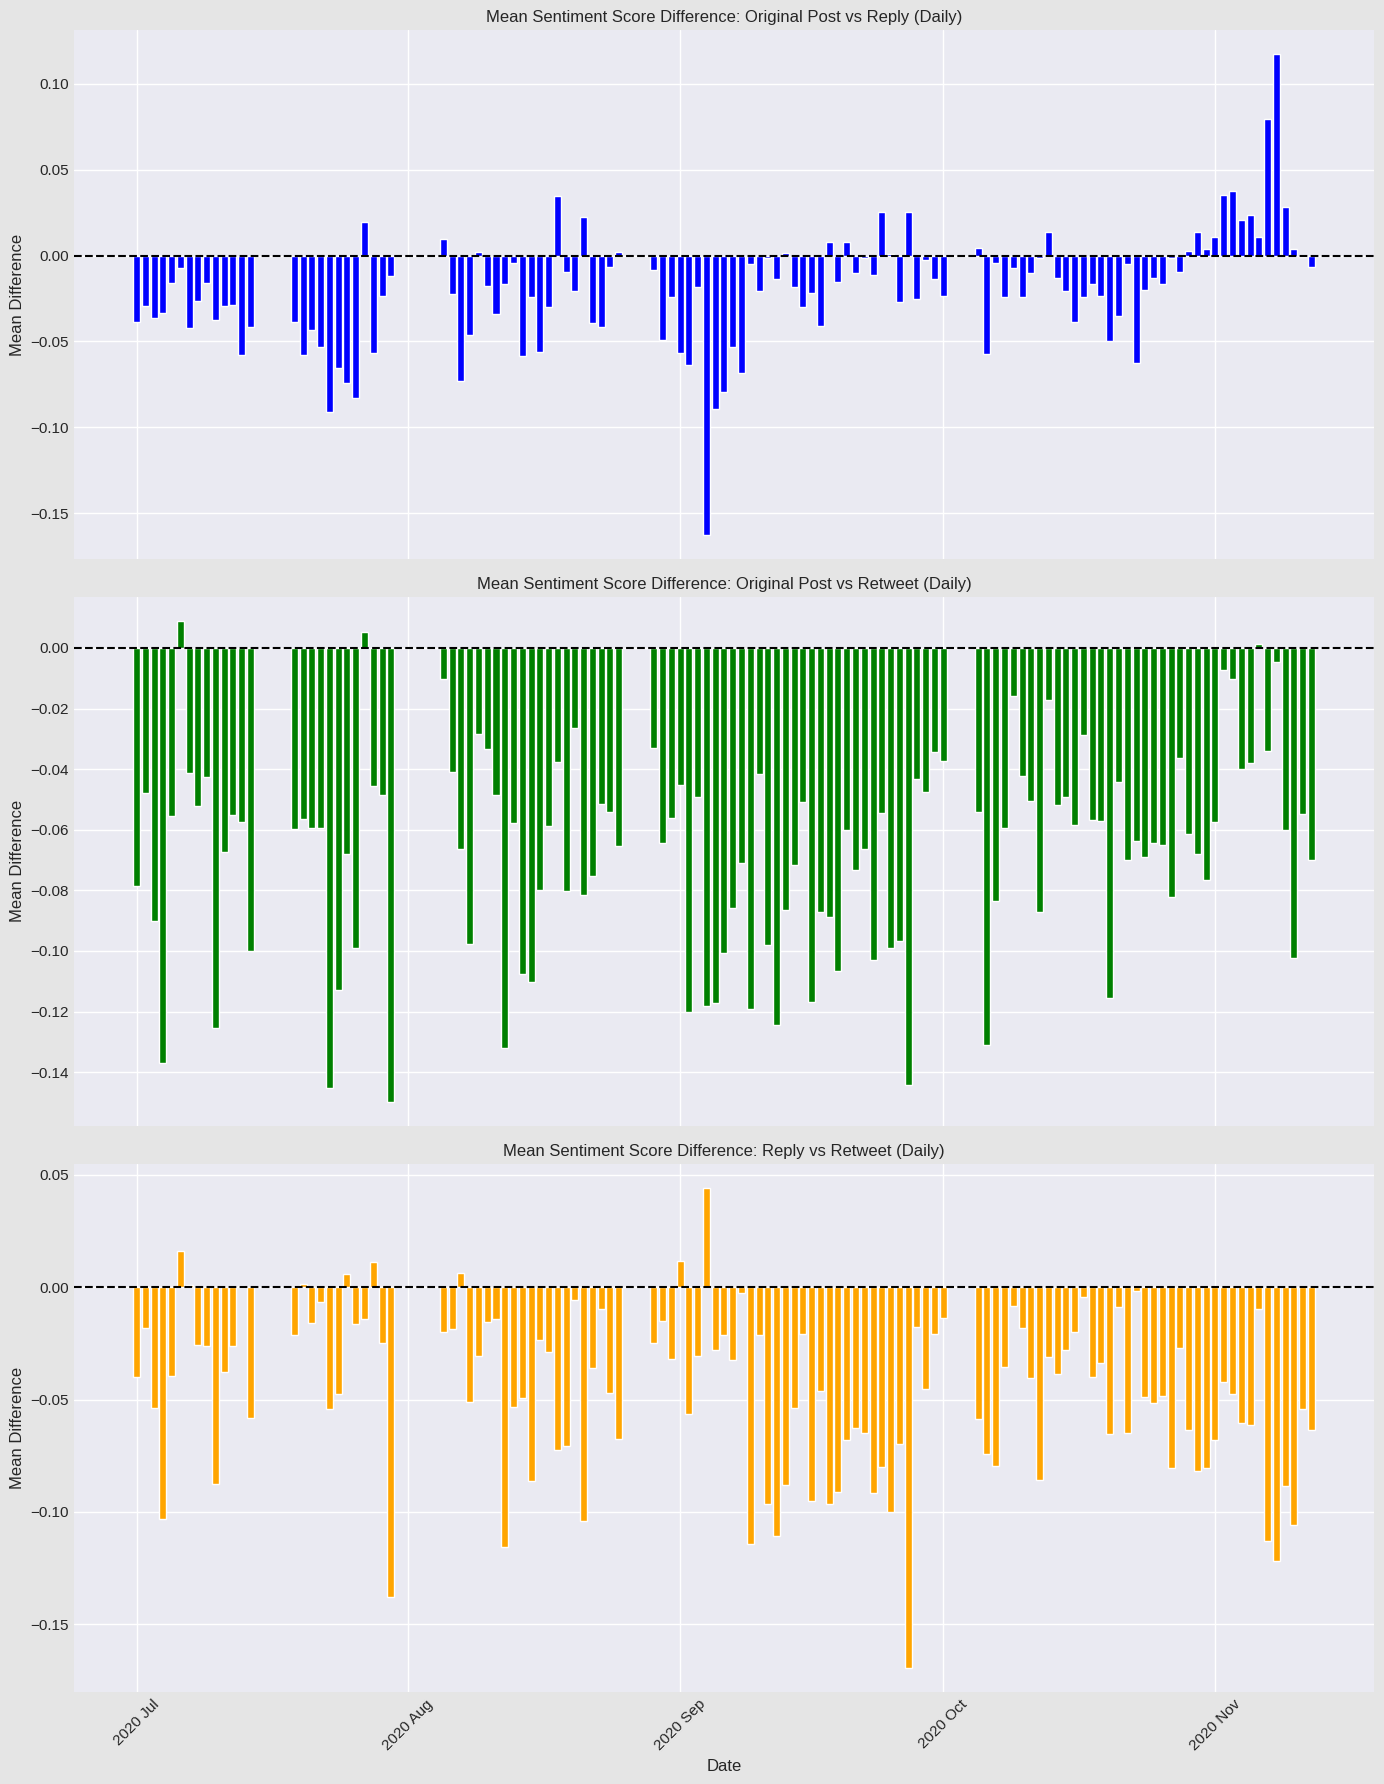

In [ ]:
plt.style.use('seaborn-darkgrid')  # Use a darker grid with gray background

# Plot the bar charts
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Date formatting for x-axis
month_locator = MonthLocator()  # Locate ticks at the start of each month
date_format = DateFormatter("%Y %b")  # Format dates as "Month Year"

# Bar chart for Original vs Reply

axes[0].bar(daily_diff_or_rp.index, daily_diff_or_rp.values, color='blue')
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_title("Mean Sentiment Score Difference: Original Post vs Reply (Daily)")
axes[0].set_ylabel("Mean Difference")

# Bar chart for Original vs Retweet
axes[1].bar(daily_diff_or_rt.index, daily_diff_or_rt.values, color='green')
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_title("Mean Sentiment Score Difference: Original Post vs Retweet (Daily)")
axes[1].set_ylabel("Mean Difference")

# Bar chart for Reply vs Retweet
axes[2].bar(daily_diff_rp_rt.index, daily_diff_rp_rt.values, color='orange')
axes[2].axhline(0, color='black', linestyle='--')
axes[2].set_title("Mean Sentiment Score Difference: Reply vs Retweet (Daily)")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Mean Difference")



# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_major_locator(month_locator)
    ax.xaxis.set_major_formatter(date_format)

# Adjust the layout
fig.patch.set_facecolor('#e5e5e5')
plt.tight_layout()
plt.show()




In [ ]:
from scipy import stats
# Function to calculate mean difference and confidence intervals
def calculate_diff_and_ci(group1, group2):
    diff = group1.mean() - group2.mean()
    stderr = np.sqrt(group1.var() / len(group1) + group2.var() / len(group2))
    ci = stats.norm.interval(0.95, loc=diff, scale=stderr)
    return diff, ci

# Calculate daily differences and confidence intervals
daily_diff_or_rp = data.groupby('Day').apply(lambda x: calculate_diff_and_ci(
    x[x['Tweet_Type'] == 'Original Post']['Score'],
    x[x['Tweet_Type'] == 'Reply']['Score']
))
daily_diff_or_rt = data.groupby('Day').apply(lambda x: calculate_diff_and_ci(
    x[x['Tweet_Type'] == 'Original Post']['Score'],
    x[x['Tweet_Type'] == 'Retweet']['Score']
))
daily_diff_rp_rt = data.groupby('Day').apply(lambda x: calculate_diff_and_ci(
    x[x['Tweet_Type'] == 'Reply']['Score'],
    x[x['Tweet_Type'] == 'Retweet']['Score']
))



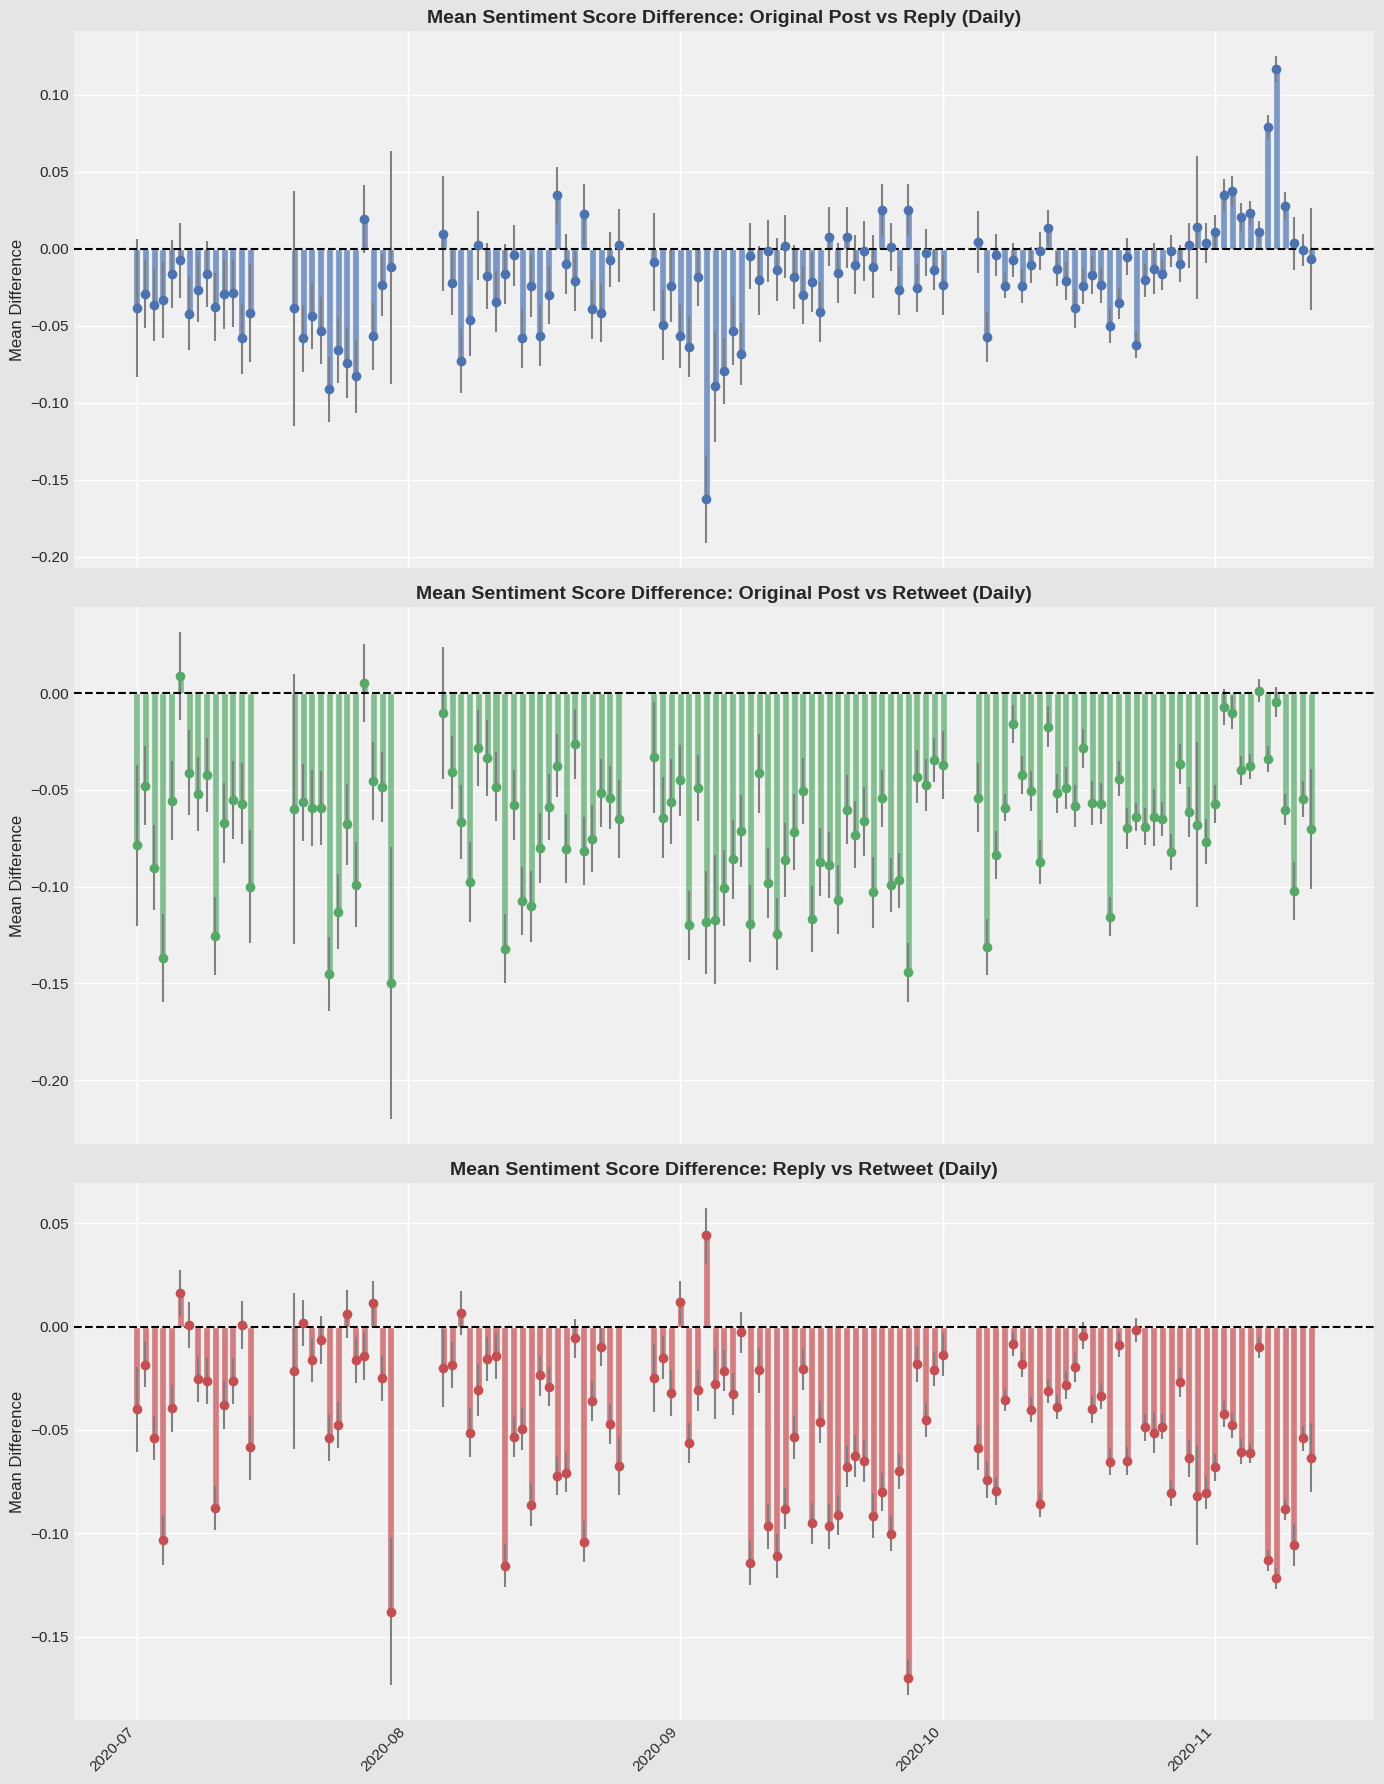

In [ ]:

# Extract means and confidence intervals
diff_or_rp_means = daily_diff_or_rp.apply(lambda x: x[0])
diff_or_rp_cis = daily_diff_or_rp.apply(lambda x: x[1])
diff_or_rt_means = daily_diff_or_rt.apply(lambda x: x[0])
diff_or_rt_cis = daily_diff_or_rt.apply(lambda x: x[1])
diff_rp_rt_means = daily_diff_rp_rt.apply(lambda x: x[0])
diff_rp_rt_cis = daily_diff_rp_rt.apply(lambda x: x[1])

# Plot the differences with confidence intervals
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Helper function to plot with confidence intervals
def plot_diff_and_ci(ax, dates, means, cis, title, color):
    lower_bounds = cis.apply(lambda x: x[0])
    upper_bounds = cis.apply(lambda x: x[1])
    # Plot bar chart
    ax.bar(dates, means, color=color, alpha=0.7, align='center')

    ax.errorbar(dates, means, yerr=[means - lower_bounds, upper_bounds - means], fmt='o', color=color,
                ecolor='gray')
    ax.axhline(0, color='black', linestyle='--')
    ax.set_title(title, fontsize=14, weight='bold')
    ax.set_ylabel("Mean Difference", fontsize=12)

# Plot each comparison with confidence intervals
plot_diff_and_ci(axes[0], diff_or_rp_means.index.to_timestamp(), diff_or_rp_means, diff_or_rp_cis,
                 "Mean Sentiment Score Difference: Original Post vs Reply (Daily)", '#4c72b0')
plot_diff_and_ci(axes[1], diff_or_rt_means.index.to_timestamp(), diff_or_rt_means, diff_or_rt_cis,
                 "Mean Sentiment Score Difference: Original Post vs Retweet (Daily)", '#55a868')
plot_diff_and_ci(axes[2], diff_rp_rt_means.index.to_timestamp(), diff_rp_rt_means, diff_rp_rt_cis,
                 "Mean Sentiment Score Difference: Reply vs Retweet (Daily)", '#c44e52')

# Set x-axis major ticks to show the first day of each month
for ax in axes:
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.set_facecolor('#f0f0f0')  # Set a light gray background for the subplot

# Rotate x-axis labels for readability
plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Adjust the layout and set a gray background for the figure
fig.patch.set_facecolor('#e5e5e5')
plt.tight_layout()
plt.show()



In [ ]:
def significant_diff(diffs):
    return diffs.apply(lambda x: x[1][0] > 0 or x[1][1] < 0)

# Filter for significant differences
significant_or_rp = significant_diff(daily_diff_or_rp)
significant_or_rt = significant_diff(daily_diff_or_rt)
significant_rp_rt = significant_diff(daily_diff_rp_rt)
# Output the dates with significant differences
print("Significant differences for Original Post vs Reply:")
print(daily_diff_or_rp[significant_or_rp].index)

print("\nSignificant differences for Original Post vs Retweet:")
print(daily_diff_or_rt[significant_or_rt].index)

print("\nSignificant differences for Reply vs Retweet:")
print(daily_diff_rp_rt[significant_rp_rt].index)

Significant differences for Original Post vs Reply:
PeriodIndex(['2020-07-02', '2020-07-03', '2020-07-04', '2020-07-07',
             '2020-07-08', '2020-07-10', '2020-07-11', '2020-07-12',
             '2020-07-13', '2020-07-14', '2020-07-20', '2020-07-21',
             '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
             '2020-07-26', '2020-07-28', '2020-07-29', '2020-08-06',
             '2020-08-07', '2020-08-08', '2020-08-11', '2020-08-14',
             '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18',
             '2020-08-20', '2020-08-21', '2020-08-22', '2020-08-23',
             '2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02',
             '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07',
             '2020-09-08', '2020-09-15', '2020-09-16', '2020-09-17',
             '2020-09-24', '2020-09-26', '2020-09-27', '2020-09-28',
             '2020-09-30', '2020-10-01', '2020-10-06', '2020-10-08',
             '2020-10-10', '2020-10-13', '2020-10-1

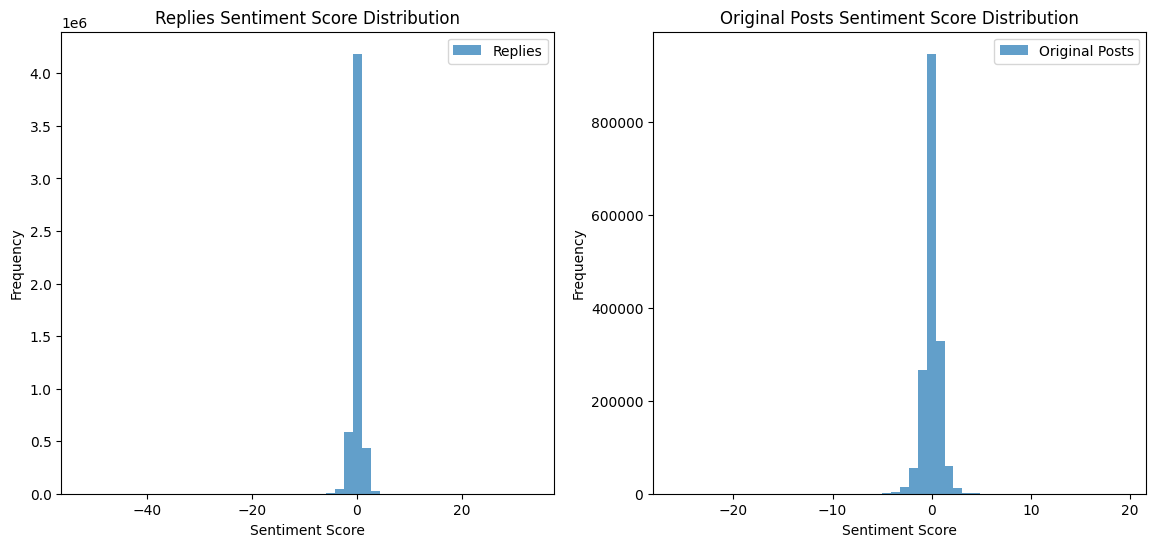

T-test results: t-statistic = 0.9016997625458748, p-value = 0.3672164530530262
Mann-Whitney U test results: U-statistic = 4470579079422.0, p-value = 2.62516821794918e-05


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu
# Separate the sentiment scores for replies and original posts
replies_scores = df_filtered[df_filtered['Tweet_Type'] == 'Reply']['Score']
original_posts_scores = df_filtered[df_filtered['Tweet_Type'] == 'Original Post']['Score']

# Check for normality using histograms
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(replies_scores, bins=50, alpha=0.7, label='Replies')
plt.title('Replies Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(original_posts_scores, bins=50, alpha=0.7, label='Original Posts')
plt.title('Original Posts Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()

plt.show()

# Perform t-test to compare the means
t_stat, p_value = ttest_ind(replies_scores, original_posts_scores, equal_var=False)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

# Perform Mann-Whitney U test (non-parametric test) as an alternative
u_stat, p_value_u = mannwhitneyu(replies_scores, original_posts_scores)
print(f"Mann-Whitney U test results: U-statistic = {u_stat}, p-value = {p_value_u}")

 there is no statistically significant difference in the mean sentiment scores between replies and original posts based on the data you provided.

In [ ]:
from scipy.stats import shapiro, kstest, levene, ttest_ind, mannwhitneyu
# Check for normality
shapiro_replies = shapiro(replies_scores.sample(5000, random_state=1))
shapiro_original = shapiro(original_posts_scores.sample(5000, random_state=1))
print(f"Shapiro-Wilk test for replies: {shapiro_replies}")
print(f"Shapiro-Wilk test for original posts: {shapiro_original}")

# Check for equal variances
levene_test = levene(replies_scores.sample(5000, random_state=1), original_posts_scores.sample(5000, random_state=1))
print(f"Levene's test for equal variances: {levene_test}")

# Perform Mann-Whitney U test (non-parametric test) as an alternative
u_stat, p_value_u = mannwhitneyu(replies_scores.sample(5000, random_state=1), original_posts_scores.sample(5000, random_state=1))
print(f"Mann-Whitney U test results: U-statistic = {u_stat}, p-value = {p_value_u}")

Shapiro-Wilk test for replies: ShapiroResult(statistic=0.9139440978993703, pvalue=1.0223373839651252e-46)
Shapiro-Wilk test for original posts: ShapiroResult(statistic=0.9259769047701714, pvalue=2.7728855371909654e-44)
Levene's test for equal variances: LeveneResult(statistic=0.0784304885158107, pvalue=0.7794415331309962)
Mann-Whitney U test results: U-statistic = 12749981.5, p-value = 0.07887630793208741


### Measure the sentiment intensity

In [ ]:
# Calculate the absolute sentiment intensity
data['Sentiment_Intensity'] = data['Positivity'].abs() + data['Negativity'].abs()

<Figure size 1000x600 with 0 Axes>

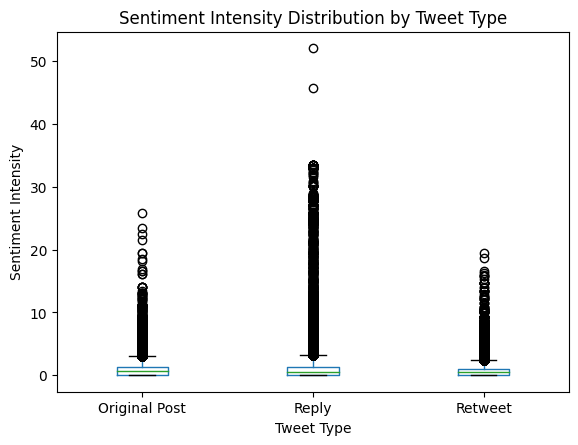

                    count      mean       std  min  25%       50%       75%  \
Tweet_Type                                                                    
Original Post   1691127.0  0.847555  0.933835  0.0  0.0  0.615385  1.256410   
Reply           5275947.0  0.861143  0.996431  0.0  0.0  0.589744  1.307692   
Retweet        17234580.0  0.651353  0.641340  0.0  0.0  0.538462  1.000000   

                     max  
Tweet_Type                
Original Post  25.846154  
Reply          52.051282  
Retweet        19.384615  


In [ ]:
# Create a box plot for sentiment intensity
plt.figure(figsize=(10, 6))
data.boxplot(column='Sentiment_Intensity', by='Tweet_Type', grid=False)
plt.title('Sentiment Intensity Distribution by Tweet Type')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Tweet Type')
plt.ylabel('Sentiment Intensity')
plt.xticks(rotation=0)
plt.show()

# Summary statistics for sentiment intensity
summary_stats_intensity = data.groupby('Tweet_Type')['Sentiment_Intensity'].describe()
print(summary_stats_intensity)

In [ ]:
# Perform ANOVA using statsmodels
model2 = ols('Sentiment_Intensity ~ C(Tweet_Type)', data=data).fit()
anova_table2 = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table2)

                     sum_sq          df            F  PR(>F)
C(Tweet_Type)  1.014463e+04         2.0  9685.863236     0.0
Residual       1.267397e+07  24201651.0          NaN     NaN


In [ ]:
# Perform Tukey's HSD test
tukey_result2 = pairwise_tukeyhsd(endog=data['Sentiment_Intensity'], groups=data['Tweet_Type'], alpha=0.05)

# Display the results
print(tukey_result2)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
    group1     group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------------
Original Post   Reply   0.0136   0.0   0.012  0.0152   True
Original Post Retweet  -0.1962   0.0 -0.1976 -0.1948   True
        Reply Retweet  -0.2098   0.0 -0.2107 -0.2089   True
-----------------------------------------------------------


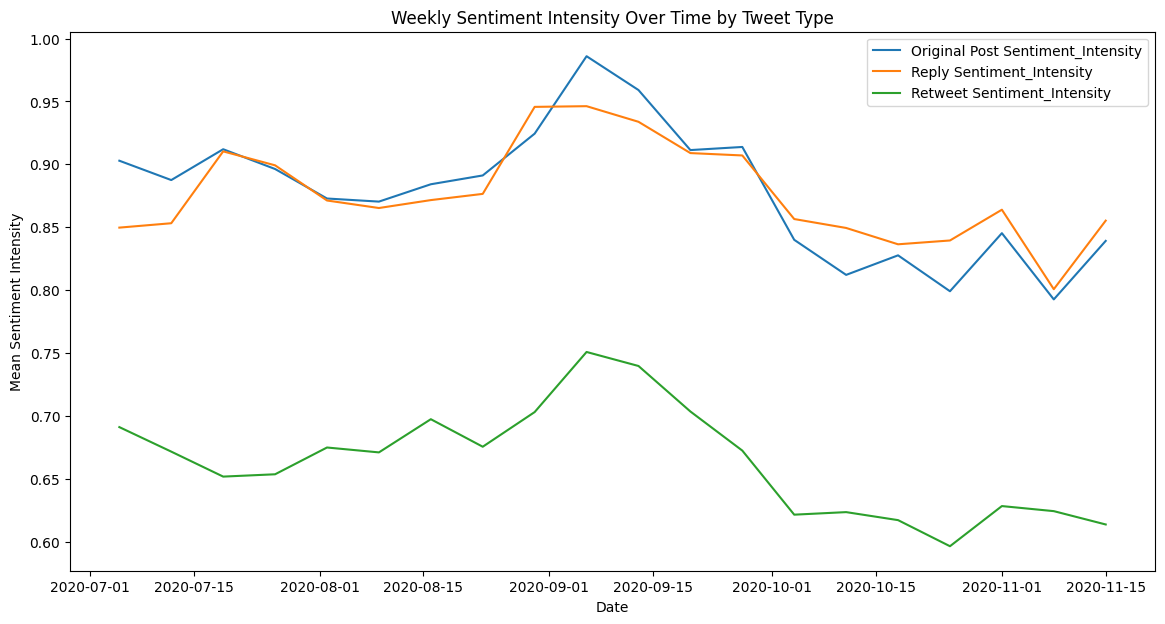

In [ ]:
# Resample the data by time (e.g., weekly) and calculate the mean sentiment score for each tweet type
weekly_sentiment = data.groupby('Tweet_Type')['Sentiment_Intensity'].resample('W').mean().unstack('Tweet_Type')

# Plot the time series of sentiment scores for each tweet type
plt.figure(figsize=(14, 7))
for tweet_type in weekly_sentiment.columns:
    plt.plot(weekly_sentiment.index, weekly_sentiment[tweet_type], label=f'{tweet_type} Sentiment_Intensity')
plt.title('Weekly Sentiment Intensity Over Time by Tweet Type')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Intensity')
plt.legend()
plt.show()

 there is no statistically significant difference in the sentiment intensities between replies and original posts

# Measurement of Polarization

## Measurement of Polarization (replication from the paper: Duclos, et.al (2002))

### Party Group

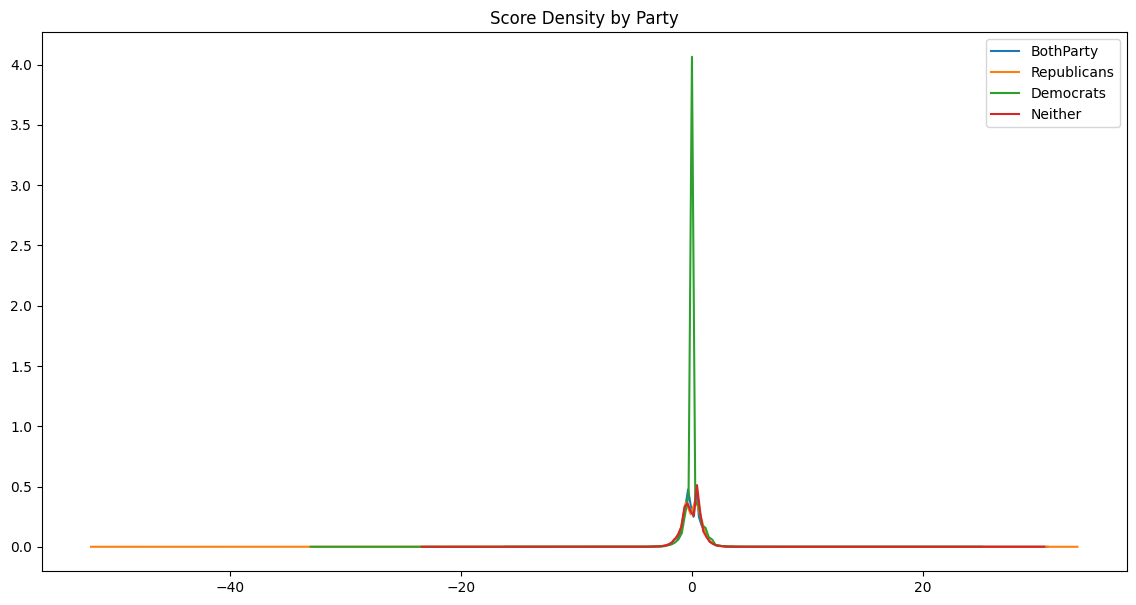

In [ ]:
from scipy.stats import gaussian_kde

# Grouping by Party and calculating density for each Party
parties = data['PartyName'].unique()
plt.figure(figsize=(14, 7))
for party in parties:
    scores = data[data['PartyName'] == party]['Score']
    density = gaussian_kde(scores)
    xs = np.linspace(min(scores), max(scores), 200)
    plt.plot(xs, density(xs), label=party)

plt.title("Score Density by Party")
plt.legend()
plt.show()










In [14]:
# Ensure the data is loaded and clean
df = data.copy()

# Check PartyName and Score columns
parties = df['PartyName'].unique()
print(parties)  # ['BothParty', 'Republicans', 'Democrats', 'Neither']

# Filter out rows with missing Score values
df = df[df['Score'].notna()]

['BothParty' 'Republicans' 'Democrats' 'Neither']


#### Estimation of the within Group polarization
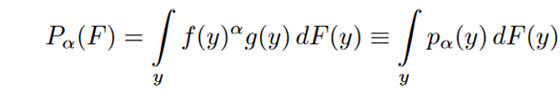

In [15]:
#another method presented in the article for estimation

def calculate_polarization_within_party_estimation(party, alpha):
    # Get the sentiment scores for the party
    party_scores = df[df['PartyName'] == party]['Score']

    # Compute the KDE for the party's sentiment scores
    kde = gaussian_kde(party_scores)

    # Generate a range of scores to evaluate
    scores = np.linspace(min(party_scores), max(party_scores), 100)

    # Evaluate the KDE for the score range (f(y))
    density = kde(scores)

    # Compute the mean of the sentiment scores (mu)
    mean_score = np.mean(party_scores)

    # Calculate the CDF manually by integrating the KDE
    cdf = np.cumsum(density) / np.sum(density)

    # Calculate g(y) for alienation
    g = mean_score + scores * (2 * cdf - 1) - 2 * np.cumsum(scores * density) / len(scores)

    # Calculate p_alpha(y) = f(y)^alpha * g(y)
    p_alpha = density**alpha * g

    # Integrate p_alpha(y) over the range of scores to get the polarization index
    polarization = np.trapz(p_alpha * density, scores)

    return polarization


In [16]:
# Assuming df is your dataset with 'PartyName', 'Tweet_Type', and 'Score' columns
tweet_groups = df.groupby(['Tweet_Type', 'PartyName'])

overall_polarization_bygroup = []

for dtagroup, dtagroup_df in tweet_groups:
    party_scores = dtagroup_df['Score'].values  # Convert to numpy array
    er = calculate_polarization_within_party_estimation(party_scores, alpha=1)  # You can change alpha as needed
    overall_polarization_bygroup.append([dtagroup, er])

# Convert the results to a DataFrame for easier manipulation
overall_polarization_df = pd.DataFrame(overall_polarization_bygroup, columns=['Group', 'Polarization'])
overall_polarization_df[['Tweet_Type', 'PartyName']] = pd.DataFrame(overall_polarization_df['Group'].tolist(), index=overall_polarization_df.index)
overall_polarization_df = overall_polarization_df.drop(columns=['Group'])

# Display the result
print(overall_polarization_df.head())

ValueError: ('Lengths must match to compare', (24201654,), (169807,))

In [ ]:
# Compute polarization for each party with alpha = 0.25
polarization_per_party_alpha_025_estimation = {}
for party in parties:
    polarization_per_party_alpha_025_estimation[party] = calculate_polarization_within_party_estimation(party, alpha=0.25)

# Compute polarization for each party with alpha = 1
polarization_per_party_alpha_1_estimation = {}
for party in parties:
    polarization_per_party_alpha_1_estimation[party] = calculate_polarization_within_party_estimation(party, alpha=1)

# Print results for alpha = 0.25
print("Polarization with alpha = 0.25")
for party, polarization in polarization_per_party_alpha_025_estimation.items():
    print(f"Polarization for {party}: {polarization}")

# Print results for alpha = 1
print("\nPolarization with alpha = 1")
for party, polarization in polarization_per_party_alpha_1_estimation.items():
    print(f"Polarization for {party}: {polarization}")

Polarization with alpha = 0.25
Polarization for BothParty: 0.28659100084046624
Polarization for Republicans: 0.15596948747092154
Polarization for Democrats: 0.2986759006099404
Polarization for Neither: 0.24291476510629498

Polarization with alpha = 1
Polarization for BothParty: 0.11521713856634573
Polarization for Republicans: 0.033181216646495544
Polarization for Democrats: 0.12669384636021092
Polarization for Neither: 0.08201785156467549


In [ ]:
# Compute polarization for each party with alpha = 0 to represent GINI index as shown in the paper
polarization_per_party_alpha_0_estimation = {}
for party in parties:
    polarization_per_party_alpha_0_estimation[party] = calculate_polarization_within_party_estimation(party, alpha=0)
print("Polarization with alpha = 0")
for party, polarization in polarization_per_party_alpha_0_estimation.items():
    print(f"Polarization for {party}: {polarization}")


Polarization with alpha = 0
Polarization for BothParty: 0.46019072782966386
Polarization for Republicans: 0.2925988417341435
Polarization for Democrats: 0.4621880396745784
Polarization for Neither: 0.40777952503445714


In [ ]:
normalized_scores = party_scores / np.mean(party_scores)
normalized_scores.describe()

count    4.562488e+06
mean     1.000000e+00
std      5.845695e+00
min     -2.810381e+02
25%     -8.727891e-01
50%      0.000000e+00
75%      3.927551e+00
max      2.138333e+02
Name: Score, dtype: float64

#### Calculte the Gini Index (no need to use it, we can replace it with alpha = 0)

In [17]:
def plot_polarization_curves(party, alpha=1):
    # Get the sentiment scores for the party
    party_scores = df[df['PartyName'] == party]['Score']

    # Compute the KDE for the party's sentiment scores
    kde = gaussian_kde(party_scores)

    # Generate a range of scores to evaluate
    scores = np.linspace(min(party_scores), max(party_scores), 100)

    # Evaluate the KDE for the score range (f(y))
    density = kde(scores)

    # Compute the mean of the sentiment scores (mu)
    mean_score = np.mean(party_scores)

    # Calculate the CDF manually by integrating the KDE
    cdf = np.cumsum(density) / np.sum(density)

    # Calculate g(y) for alienation
    g = mean_score + scores * (2 * cdf - 1) - 2 * np.cumsum(scores * density) / len(scores)

    # Calculate p_alpha(y) = f(y)^alpha * g(y)
    p_alpha = density**alpha * g

    # Calculate the polarization curve p_alpha(y)f(y)
    polarization_curve = p_alpha * density

    # Calculate the alienation curve g(y)f(y)
    alienation_curve = g * density

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot the polarization curve p_alpha(y) * f(y)
    plt.plot(scores, polarization_curve, label=f'Polarization Curve (alpha={alpha})', color='blue')

    # Plot the alienation curve g(y) * f(y)
    plt.plot(scores, alienation_curve, label='Alienation Curve (Gini)', color='green', linestyle='--')

    # Plot the KDE density curve f(y)
    plt.plot(scores, density, label='Density f(y)', color='red', linestyle='-.')

    # Labels and title
    plt.title(f'Polarization and Alienation Curves for {party}')
    plt.xlabel('Sentiment Scores')
    plt.ylabel('Contribution to Polarization / Inequality')
    plt.legend()

    # Show the plot
    plt.show()

# Example usage for plotting the curves for Democrats with alpha = 1
plot_polarization_curves('Democrats', alpha=1)


NameError: name 'gaussian_kde' is not defined

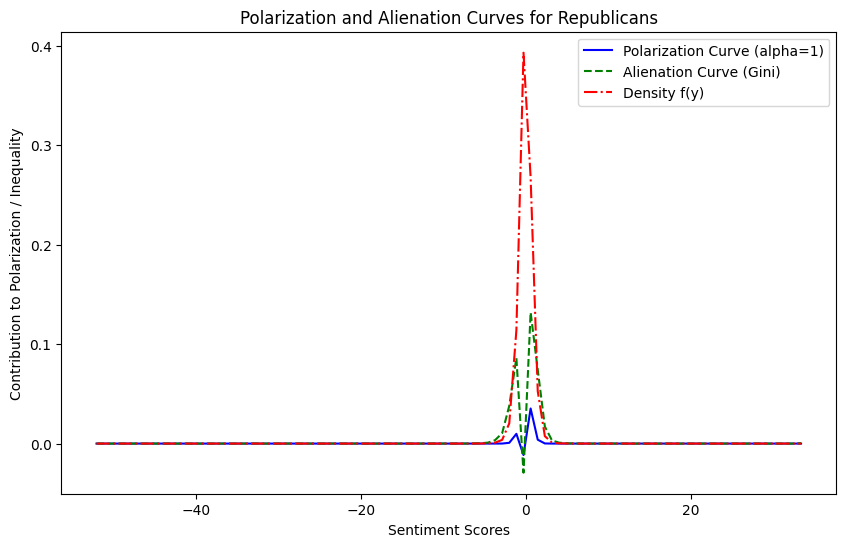

In [ ]:
plot_polarization_curves('Republicans', alpha=1)

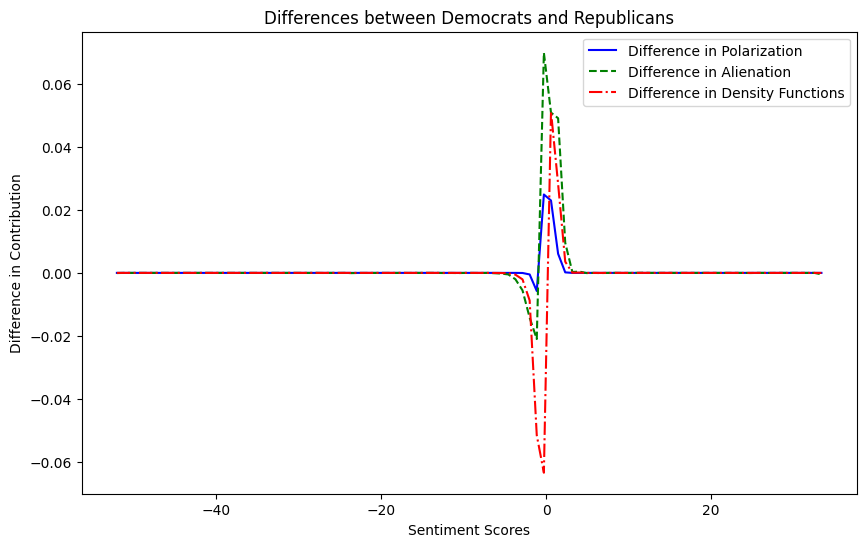

In [ ]:
def calculate_party_curves(party, alpha=1):
    # Get the sentiment scores for the party
    party_scores = df[df['PartyName'] == party]['Score']

    # Compute the KDE for the party's sentiment scores
    kde = gaussian_kde(party_scores)

    # Generate a range of scores to evaluate
    scores = np.linspace(min(party_scores), max(party_scores), 100)

    # Evaluate the KDE for the score range (f(y))
    density = kde(scores)

    # Compute the mean of the sentiment scores (mu)
    mean_score = np.mean(party_scores)

    # Calculate the CDF manually by integrating the KDE
    cdf = np.cumsum(density) / np.sum(density)

    # Calculate g(y) for alienation
    g = mean_score + scores * (2 * cdf - 1) - 2 * np.cumsum(scores * density) / len(scores)

    # Calculate p_alpha(y) = f(y)^alpha * g(y)
    p_alpha = density**alpha * g

    return scores, density, p_alpha, g

def plot_difference_between_parties(party1, party2, alpha=1):
    # Get curves for both parties
    scores1, density1, p_alpha1, g1 = calculate_party_curves(party1, alpha)
    scores2, density2, p_alpha2, g2 = calculate_party_curves(party2, alpha)

    # Ensure scores are aligned between the two parties
    scores = np.linspace(min(min(scores1), min(scores2)), max(max(scores1), max(scores2)), 100)

    # Evaluate KDEs and g(y) on the new scores grid
    kde1 = gaussian_kde(df[df['PartyName'] == party1]['Score'])
    kde2 = gaussian_kde(df[df['PartyName'] == party2]['Score'])

    density1 = kde1(scores)
    density2 = kde2(scores)

    # Recompute g(y) for both parties based on new scores
    cdf1 = np.cumsum(density1) / np.sum(density1)
    cdf2 = np.cumsum(density2) / np.sum(density2)

    mean1 = np.mean(df[df['PartyName'] == party1]['Score'])
    mean2 = np.mean(df[df['PartyName'] == party2]['Score'])

    g1 = mean1 + scores * (2 * cdf1 - 1) - 2 * np.cumsum(scores * density1) / len(scores)
    g2 = mean2 + scores * (2 * cdf2 - 1) - 2 * np.cumsum(scores * density2) / len(scores)

    p_alpha1 = density1**alpha * g1
    p_alpha2 = density2**alpha * g2

    # Plot the differences
    plt.figure(figsize=(10, 6))

    # Difference in Polarization Contributions
    plt.plot(scores, density1 * p_alpha1 - density2 * p_alpha2, label='Difference in Polarization', color='blue')

    # Difference in Alienation Contributions
    plt.plot(scores, density1 * g1 - density2 * g2, label='Difference in Alienation', color='green', linestyle='--')

    # Difference in Density Functions
    plt.plot(scores, density1 - density2, label='Difference in Density Functions', color='red', linestyle='-.')

    # Labels and title
    plt.title(f'Differences between {party1} and {party2}')
    plt.xlabel('Sentiment Scores')
    plt.ylabel('Difference in Contribution')
    plt.legend()

    # Show the plot
    plt.show()

# Example usage
plot_difference_between_parties('Democrats', 'Republicans', alpha=1)

### Post Type

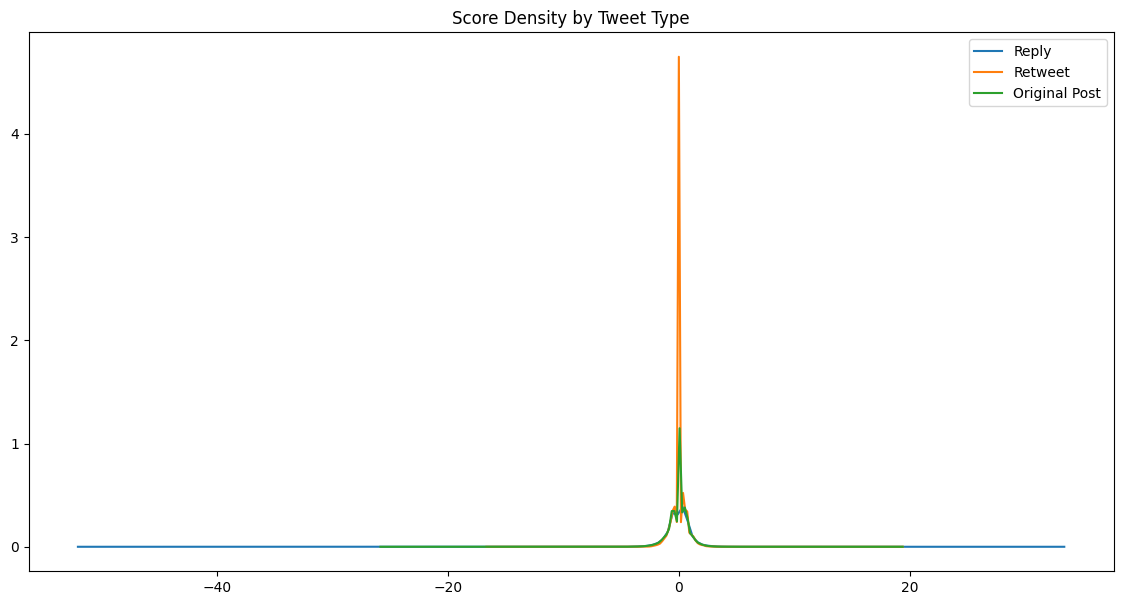

In [ ]:
# Similarly, for tweet type
tweet_types = data['Tweet_Type'].unique()
plt.figure(figsize=(14, 7))
for ttype in tweet_types:
    scores = data[data['Tweet_Type'] == ttype]['Score']
    density = gaussian_kde(scores)
    xs = np.linspace(min(scores), max(scores), 200)
    plt.plot(xs, density(xs), label=ttype)

plt.title("Score Density by Tweet Type")
plt.legend()
plt.show()

In [ ]:

def calculate_polarization_within_Tweettype_estimation(tweet, alpha):
    # Get the sentiment scores for the party
    type_scores = df[df['Tweet_Type'] == tweet]['Score']

    # Compute the KDE for the party's sentiment scores
    kde = gaussian_kde(type_scores)

    # Generate a range of scores to evaluate
    scores = np.linspace(min(type_scores), max(type_scores), 100)

    # Evaluate the KDE for the score range (f(y))
    density = kde(scores)

    # Compute the mean of the sentiment scores (mu)
    mean_score = np.mean(type_scores)

    # Calculate the CDF manually by integrating the KDE
    cdf = np.cumsum(density) / np.sum(density)

    # Calculate g(y) for alienation
    g = mean_score + scores * (2 * cdf - 1) - 2 * np.cumsum(scores * density) / len(scores)

    # Calculate p_alpha(y) = f(y)^alpha * g(y)
    p_alpha = density**alpha * g

    # Integrate p_alpha(y) over the range of scores to get the polarization index
    polarization = np.trapz(p_alpha * density, scores)

    return polarization


In [ ]:
def calculate_polarization_for_tweet_types(alpha):
    tweet_types = df['Tweet_Type'].unique()
    polarization_results = {}

    for tweet_type in tweet_types:
        polarization = calculate_polarization_within_Tweettype_estimation(tweet_type, alpha)
        polarization_results[tweet_type] = polarization

    return polarization_results

# Example: Calculating polarization for all Tweet-Type groups with alpha = 0, 0.25, 1
for alpha_value in [0, 0.25, 1]:
    results = calculate_polarization_for_tweet_types(alpha=alpha_value)
    print(f"Polarization results for alpha = {alpha_value}:")
    for tweet_type, polarization in results.items():
        print(f"{tweet_type}: {polarization}")

Polarization results for alpha = 0:
Reply: 0.3123667661119644
Retweet: 0.39266629510510925
Original Post: 0.34352618676959523
Polarization results for alpha = 0.25:
Reply: 0.1525111925306577
Retweet: 0.2446547356669567
Original Post: 0.18030564565727142
Polarization results for alpha = 1:
Reply: 0.02577454454396519
Retweet: 0.08640170596533212
Original Post: 0.03985946859578891


In [ ]:
df["Tweet_Type"].value_counts()

Tweet_Type
Retweet          17234580
Reply             5275947
Original Post     1691127
Name: count, dtype: int64

In [ ]:
def plot_polarization_curves_tweet_type(tweet_type, alpha=1):
    # Get the sentiment scores for the tweet type
    tweet_type_scores = df[df['Tweet_Type'] == tweet_type]['Score']

    # Compute the KDE for the tweet type's sentiment scores
    kde = gaussian_kde(tweet_type_scores)

    # Generate a range of scores to evaluate
    scores = np.linspace(min(tweet_type_scores), max(tweet_type_scores), 100)

    # Evaluate the KDE for the score range (f(y))
    density = kde(scores)

    # Compute the mean of the sentiment scores (mu)
    mean_score = np.mean(tweet_type_scores)

    # Calculate the CDF manually by integrating the KDE
    cdf = np.cumsum(density) / np.sum(density)

    # Calculate g(y) for alienation
    g = mean_score + scores * (2 * cdf - 1) - 2 * np.cumsum(scores * density) / len(scores)

    # Calculate p_alpha(y) = f(y)^alpha * g(y)
    p_alpha = density**alpha * g

    # Calculate the polarization curve p_alpha(y)f(y)
    polarization_curve = p_alpha * density

    # Calculate the alienation curve g(y)f(y)
    alienation_curve = g * density

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot the polarization curve p_alpha(y) * f(y)
    plt.plot(scores, polarization_curve, label=f'Polarization Curve (alpha={alpha})', color='blue')

    # Plot the alienation curve g(y) * f(y)
    plt.plot(scores, alienation_curve, label='Alienation Curve (Gini)', color='green', linestyle='--')

    # Plot the KDE density curve f(y)
    plt.plot(scores, density, label='Density f(y)', color='red', linestyle='-.')

    # Labels and title
    plt.title(f'Polarization and Alienation Curves for {tweet_type}')
    plt.xlabel('Sentiment Scores')
    plt.ylabel('Contribution to Polarization / Inequality')
    plt.legend()

    # Show the plot
    plt.show()




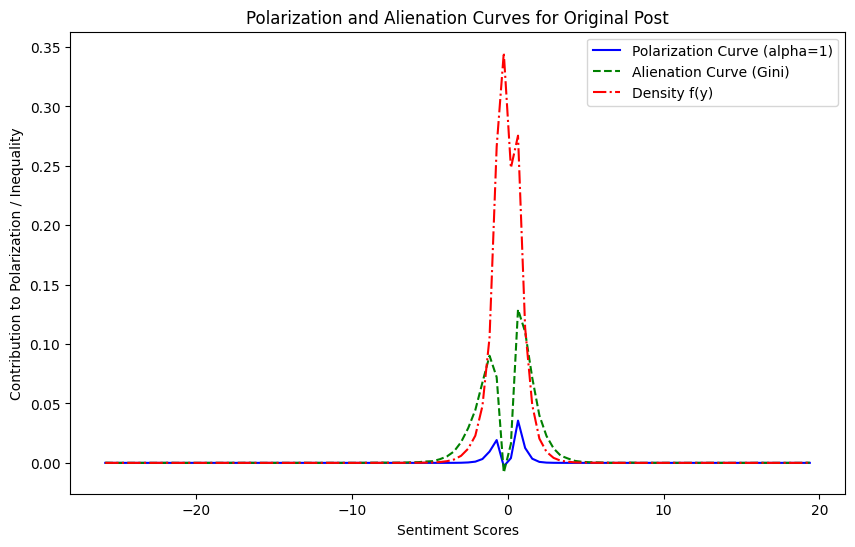

In [ ]:
plot_polarization_curves_tweet_type('Original Post', alpha=1)

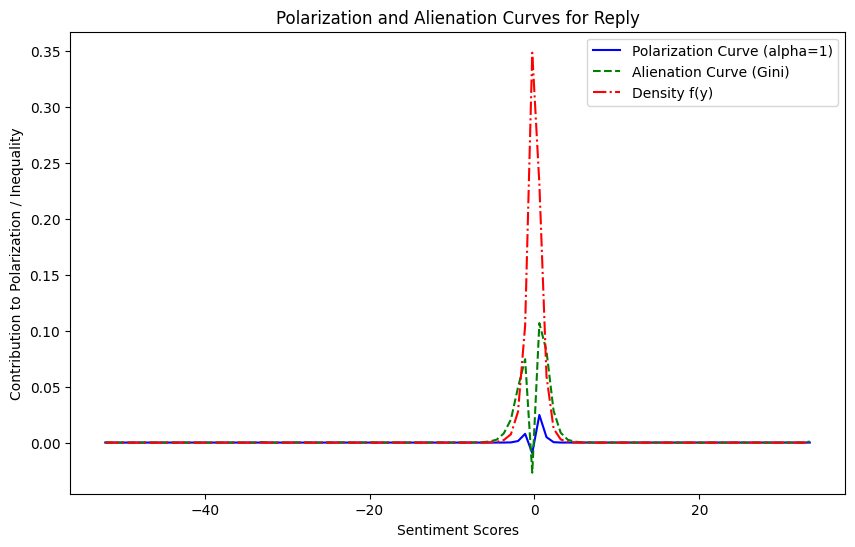

In [ ]:
# Example usage for plotting the curves for different Tweet Types

plot_polarization_curves_tweet_type('Reply', alpha=1)

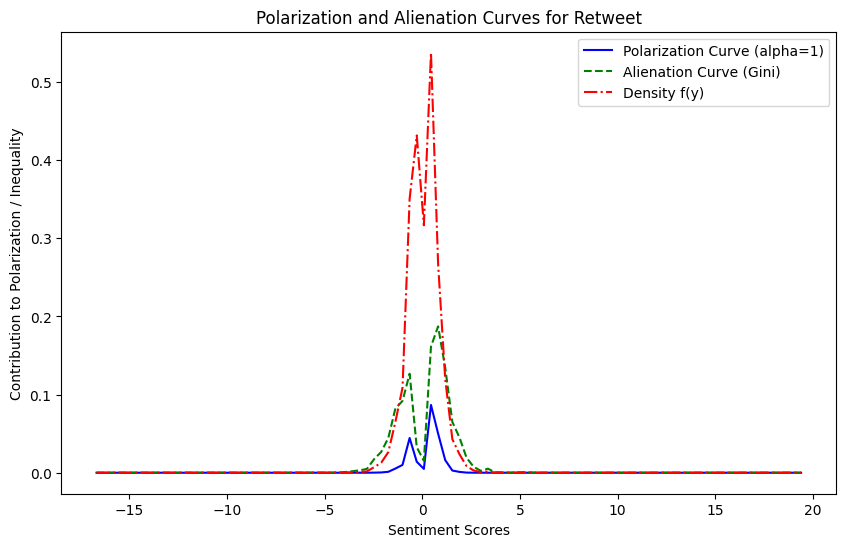

In [ ]:
plot_polarization_curves_tweet_type('Retweet', alpha=1)

In [ ]:
# Function to calculate polarization, density, and g(y) for a given tweet type
def calculate_tweet_type_curves(tweet_type, alpha=1):
    # Get the sentiment scores for the tweet type group
    tweet_type_scores = df[df['Tweet_Type'] == tweet_type]['Score']

    # Compute the KDE for the tweet type group's sentiment scores
    kde = gaussian_kde(tweet_type_scores)

    # Generate a range of scores to evaluate
    scores = np.linspace(min(tweet_type_scores), max(tweet_type_scores), 100)

    # Evaluate the KDE for the score range (f(y))
    density = kde(scores)

    # Compute the mean of the sentiment scores (mu)
    mean_score = np.mean(tweet_type_scores)

    # Calculate the CDF manually by integrating the KDE
    cdf = np.cumsum(density) / np.sum(density)

    # Calculate g(y) for alienation
    g = mean_score + scores * (2 * cdf - 1) - 2 * np.cumsum(scores * density) / len(scores)

    # Calculate p_alpha(y) = f(y)^alpha * g(y)
    p_alpha = density**alpha * g

    return scores, density, p_alpha, g

def plot_difference_between_tweet_types(type1, type2, alpha=1):
    # Get curves for both tweet types
    scores1, density1, p_alpha1, g1 = calculate_tweet_type_curves(type1, alpha)
    scores2, density2, p_alpha2, g2 = calculate_tweet_type_curves(type2, alpha)

    # Ensure scores are aligned between the two tweet types
    scores = np.linspace(min(min(scores1), min(scores2)), max(max(scores1), max(scores2)), 100)

    # Evaluate KDEs and g(y) on the new scores grid
    kde1 = gaussian_kde(df[df['Tweet_Type'] == type1]['Score'])
    kde2 = gaussian_kde(df[df['Tweet_Type'] == type2]['Score'])

    density1 = kde1(scores)
    density2 = kde2(scores)

    # Recompute g(y) for both tweet types based on new scores
    cdf1 = np.cumsum(density1) / np.sum(density1)
    cdf2 = np.cumsum(density2) / np.sum(density2)

    mean1 = np.mean(df[df['Tweet_Type'] == type1]['Score'])
    mean2 = np.mean(df[df['Tweet_Type'] == type2]['Score'])

    g1 = mean1 + scores * (2 * cdf1 - 1) - 2 * np.cumsum(scores * density1) / len(scores)
    g2 = mean2 + scores * (2 * cdf2 - 1) - 2 * np.cumsum(scores * density2) / len(scores)

    p_alpha1 = density1**alpha * g1
    p_alpha2 = density2**alpha * g2

    # Plot the differences
    plt.figure(figsize=(10, 6))

    # Difference in Polarization Contributions
    plt.plot(scores, density1 * p_alpha1 - density2 * p_alpha2, label='Difference in Polarization', color='blue')

    # Difference in Alienation Contributions
    plt.plot(scores, density1 * g1 - density2 * g2, label='Difference in Alienation', color='green', linestyle='--')

    # Difference in Density Functions
    plt.plot(scores, density1 - density2, label='Difference in Density Functions', color='red', linestyle='-.')

    # Labels and title
    plt.title(f'Differences between {type1} and {type2}')
    plt.xlabel('Sentiment Scores')
    plt.ylabel('Difference in Contribution')
    plt.legend()

    # Show the plot
    plt.show()




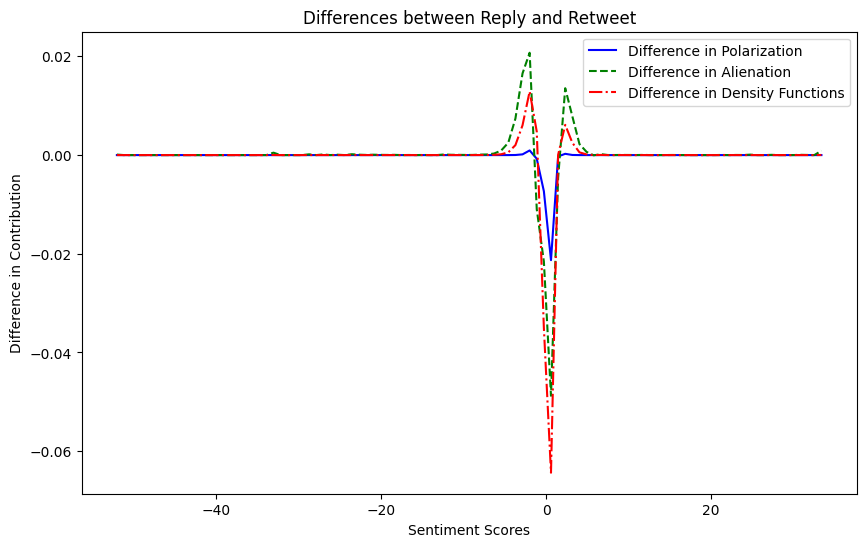

In [ ]:
# Example usage for different Tweet Types

plot_difference_between_tweet_types('Reply', 'Retweet', alpha=1)



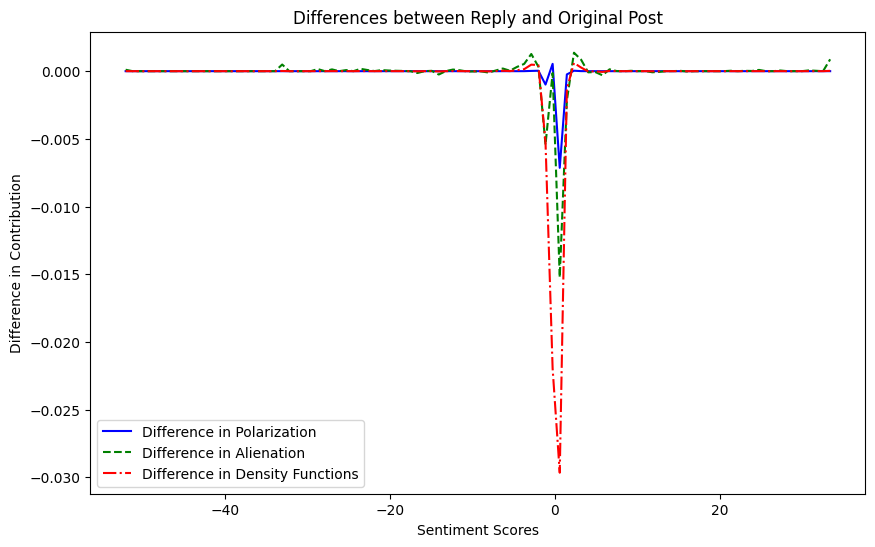

In [ ]:
plot_difference_between_tweet_types('Reply', 'Original Post', alpha=1)

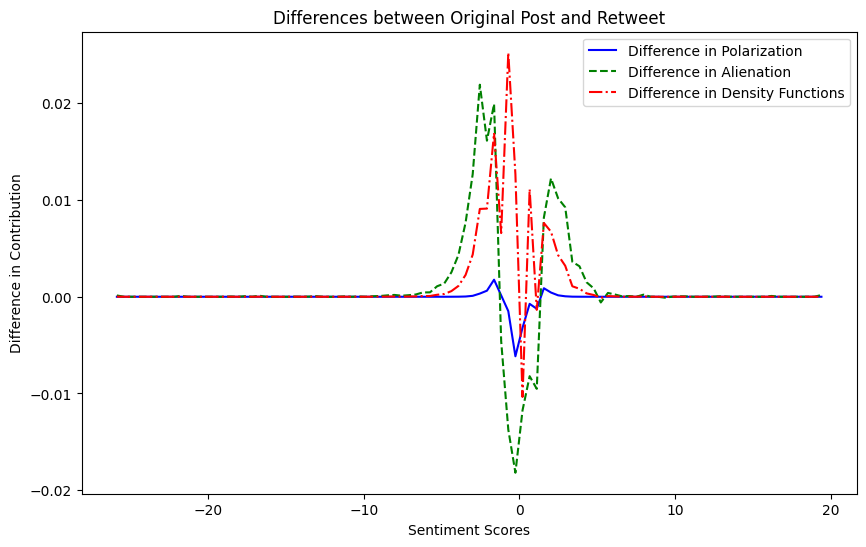

In [ ]:
plot_difference_between_tweet_types('Original Post', 'Retweet', alpha=1)

### polarization scores overtime

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24201654 entries, 2020-07-01 19:44:00 to 2020-11-12 17:47:00
Data columns (total 14 columns):
 #   Column            Dtype    
---  ------            -----    
 0   From-User-Id      int64    
 1   To-User-Id        int64    
 2   Language          object   
 3   Retweet-Count     float64  
 4   PartyName         object   
 5   Id                int64    
 6   Score             float64  
 7   Scoring String    object   
 8   Negativity        float64  
 9   Positivity        float64  
 10  Uncovered Tokens  int64    
 11  Total Tokens      int64    
 12  Day               period[D]
 13  Tweet_Type        object   
dtypes: float64(4), int64(5), object(4), period[D](1)
memory usage: 2.7+ GB


In [19]:
df['Day'] = df['Day'].dt.to_timestamp()

In [20]:
from scipy.stats import gaussian_kde
def calculate_polarization(scores, alpha):
    # Compute the KDE for the group's sentiment scores
    kde = gaussian_kde(scores)

    # Generate a range of scores to evaluate
    score_range = np.linspace(min(scores), max(scores), 100)

    # Evaluate the KDE for the score range (f(y))
    density = kde(score_range)

    # Compute the mean of the sentiment scores (mu)
    mean_score = np.mean(scores)

    # Calculate the CDF manually by integrating the KDE
    cdf = np.cumsum(density) / np.sum(density)

    # Calculate g(y) for alienation
    g = mean_score + score_range * (2 * cdf - 1) - 2 * np.cumsum(score_range * density) / len(score_range)

    # Calculate p_alpha(y) = f(y)^alpha * g(y)
    p_alpha = density**alpha * g

    # Calculate the polarization score by integrating p_alpha * f(y)
    polarization = np.trapz(p_alpha * density, score_range)

    return polarization

# Function to calculate polarization for each day and party
def calculate_daily_polarization(df, alpha):
    # Group the data by Day and PartyName
    grouped = df.groupby(['Day', 'PartyName'])

    # Create an empty list to store the results
    results = []

    # Iterate over each group and calculate polarization
    for (day, party), group in grouped:
        scores = group['Score'].values
        polarization = calculate_polarization(scores, alpha)
        results.append({'Day': day, 'PartyName': party, 'Polarization': polarization})

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    return results_df

def plot_polarization_Party_over_time(df, alpha=1):
    # Calculate daily polarization
    results_df = calculate_daily_polarization(df, alpha=alpha)
    # Get a fancy color palette using seaborn
    colors = sns.color_palette("Dark2", n_colors=len(results_df['PartyName'].unique()))

    # Plot the polarization scores over time, grouped by PartyName
    plt.figure(figsize=(25, 6))

    for idx, party in enumerate(results_df['PartyName'].unique()):
        party_data = results_df[results_df['PartyName'] == party]
        plt.plot(party_data['Day'], party_data['Polarization'], label=party, color=colors[idx], lw = 3)

     # Remove the top and right spines (borders)
    ax = plt.gca()  # Get current axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    plt.title(f'Polarization Over Time by Party (alpha={alpha})')
    plt.xlabel('Day')
    plt.ylabel('Polarization Score')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




In [21]:
# it includes all tweet types
calculate_daily_polarization(df, alpha = 1)

Day    PartyName  Polarization
0   2020-07-01    BothParty      0.087164
1   2020-07-01    Democrats      0.176775
2   2020-07-01      Neither      0.076094
3   2020-07-01  Republicans      0.033545
4   2020-07-02    BothParty      0.083356
..         ...          ...           ...
475 2020-11-11  Republicans     -0.097317
476 2020-11-12    BothParty      0.180292
477 2020-11-12    Democrats      0.221951
478 2020-11-12      Neither      0.091561
479 2020-11-12  Republicans      0.030911

[480 rows x 3 columns]

In [55]:
# Group the data by Day and PartyName
grouped_two_party = df[df['PartyName'].isin(['Democrats', 'Republicans'])].groupby(['Day','PartyName'])

# Create an empty list to store the results
results = []

# Iterate over each group and calculate polarization
for (day, party), group in grouped_two_party:
    scores = group['Score'].values
    polarization = calculate_polarization(scores, alpha = 1)
    results.append({'Day': day, 'PartyName': party, 'Polarization': polarization})

# Convert results to a DataFrame
results_df_two_party = pd.DataFrame(results)

results_df_two_party


Day    PartyName  Polarization
0   2020-07-01    Democrats      0.176775
1   2020-07-01  Republicans      0.033545
2   2020-07-02    Democrats      0.141031
3   2020-07-02  Republicans      0.016485
4   2020-07-03    Democrats      0.102212
..         ...          ...           ...
235 2020-11-10  Republicans      0.042468
236 2020-11-11    Democrats      0.215225
237 2020-11-11  Republicans     -0.097317
238 2020-11-12    Democrats      0.221951
239 2020-11-12  Republicans      0.030911

[240 rows x 3 columns]

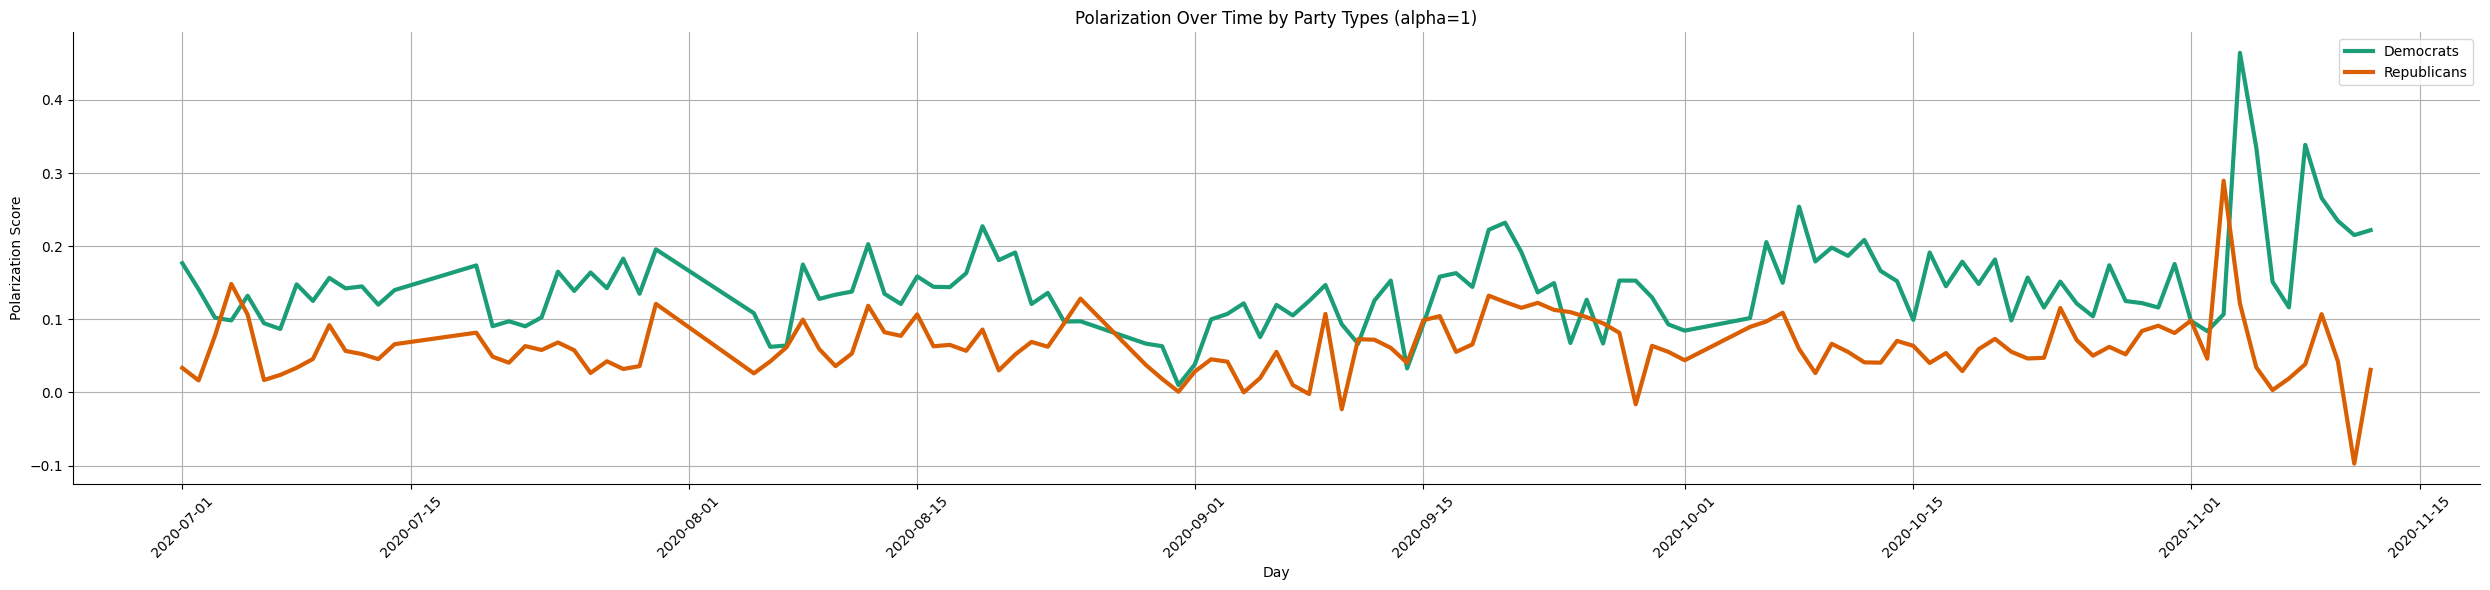

In [63]:
# Get a fancy color palette using seaborn
colors = sns.color_palette("Dark2", n_colors=4)

# Plot the polarization scores over time, grouped by PartyName
plt.figure(figsize=(25, 6))
for idx, party in enumerate(results_df_two_party['PartyName'].unique()):
    # Filter the data for the current party
    party_data = results_df_two_party[results_df_two_party['PartyName'] == party]

    # Plot the data
    plt.plot(party_data['Day'], party_data['Polarization'], label=party, lw=3, color=colors[idx])

# Remove the top and right spines (borders)
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the title and labels
plt.title('Polarization Over Time by Party Types (alpha=1)')
plt.xlabel('Day')
plt.ylabel('Polarization Score')

# Show legend
plt.legend()

# Enable grid
plt.grid(True)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()




In [57]:
plot_polarization_Party_over_time(df, alpha=1)

MemoryError: Unable to allocate 923. MiB for an array with shape (5, 24201654) and data type int64

In [23]:

# Function to calculate daily polarization for tweet types
def calculate_daily_polarization_by_tweet_type(df, alpha):
    # Group the data by Day and Tweet_Type
    grouped = df.groupby(['Day', 'Tweet_Type'])

    # Create an empty list to store the results
    results = []

    # Iterate over each group and calculate polarization
    for (day, tweet_type), group in grouped:
        scores = group['Score'].values
        polarization = calculate_polarization(scores, alpha)
        results.append({'Day': day, 'Tweet_Type': tweet_type, 'Polarization': polarization})

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    return results_df

# Function to plot polarization over time by tweet type
def plot_polarization_over_time_by_tweet_type(df, alpha):
    # Calculate daily polarization by tweet type
    results_df = calculate_daily_polarization_by_tweet_type(df, alpha=alpha)

    # Get a fancy color palette using seaborn
    colors = sns.color_palette("Set2", n_colors=len(results_df['Tweet_Type'].unique()))

    # Plot the polarization scores over time, grouped by Tweet_Type
    plt.figure(figsize=(25, 6))

    for idx, tweet_type in enumerate(results_df['Tweet_Type'].unique()):
        tweet_data = results_df[results_df['Tweet_Type'] == tweet_type]
        plt.plot(tweet_data['Day'], tweet_data['Polarization'], label=tweet_type, color=colors[idx], lw = 3)


    # Remove the top and right spines (borders)
    ax = plt.gca()  # Get current axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)



    plt.title(f'Polarization Over Time by Tweet Type (alpha={alpha})')
    plt.xlabel('Day')
    plt.ylabel('Polarization Score')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [28]:
# includes all the parties
calculate_daily_polarization_by_tweet_type(df, alpha = 1)

Day     Tweet_Type  Polarization
0   2020-07-01  Original Post      0.045396
1   2020-07-01          Reply      0.042255
2   2020-07-01        Retweet      0.083122
3   2020-07-02  Original Post      0.040738
4   2020-07-02          Reply      0.022745
..         ...            ...           ...
355 2020-11-11          Reply      0.032309
356 2020-11-11        Retweet      0.117040
357 2020-11-12  Original Post      0.085277
358 2020-11-12          Reply      0.065653
359 2020-11-12        Retweet      0.131752

[360 rows x 3 columns]

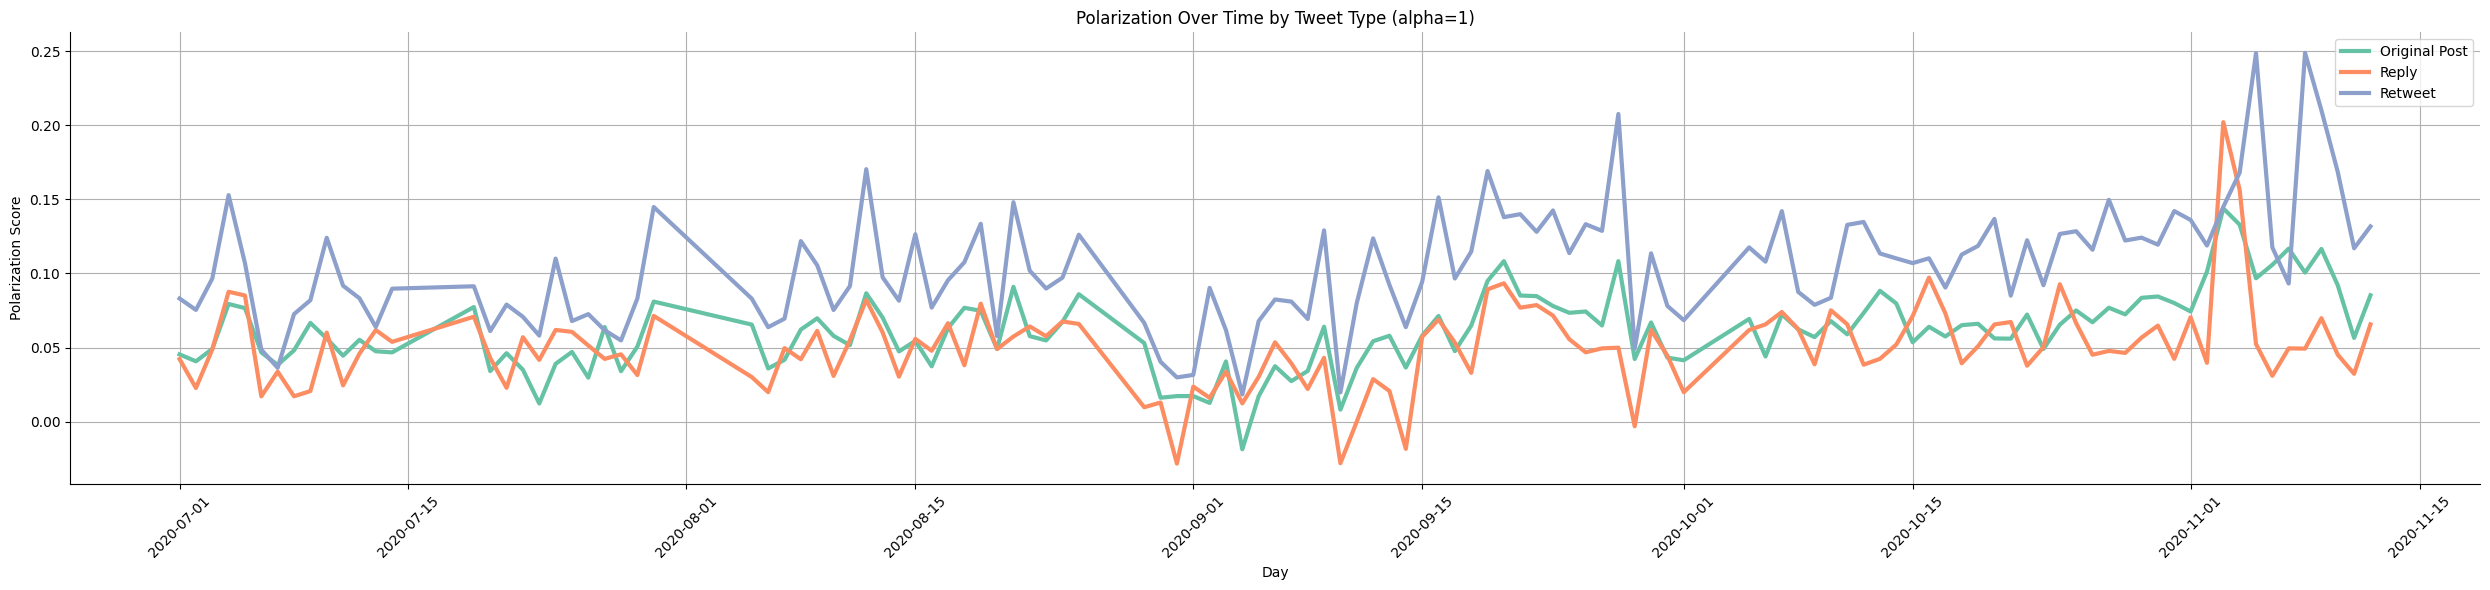

In [35]:
# Example usage to plot polarization over time by tweet type
plot_polarization_over_time_by_tweet_type(df, alpha=1)

In [24]:
# Group the data by Day and Tweet_Type
tweets_grouped = df.groupby(['Day', 'Tweet_Type', 'PartyName'])

# Create an empty list to store the results
results = []

# Iterate over each group and calculate polarization
for (day, tweet_type), group in tweets_grouped:
    scores = group['Score'].values
    polarization = calculate_polarization(scores, alpha = 1)
    results.append({'Day': day, 'Tweet_Type': tweet_type, 'Polarization': polarization})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)


ValueError: too many values to unpack (expected 2)

#### Polarization scores by all the groups over time

In [25]:
#polarization by all the groups overtime


# Assuming df is your dataset with 'PartyName', 'Tweet_Type', 'Day', and 'Score' columns
tweet_groups = df.groupby(['Day', 'Tweet_Type', 'PartyName'])

polarization_bygroup = []

for dtagroup, dtagroup_df in tweet_groups:
    er = calculate_polarization(dtagroup_df['Score'], alpha = 1)
    polarization_bygroup.append([dtagroup, er])

# Convert the results to a DataFrame for easier manipulation
polarization_df_Duclos = pd.DataFrame(polarization_bygroup, columns=['Group', 'Polarization_Duclos'])
polarization_df_Duclos[['Date', 'Tweet_Type', 'PartyName']] = pd.DataFrame(polarization_df_Duclos['Group'].tolist(), index=polarization_df_Duclos.index)
#polarization_df = polarization_df.drop(columns=['Group'])



In [26]:
# Display the result
polarization_df_Duclos

Group  Polarization_Duclos  \
0       (2020-07-01 00:00:00, Original Post, BothParty)             0.120542   
1       (2020-07-01 00:00:00, Original Post, Democrats)             0.126354   
2         (2020-07-01 00:00:00, Original Post, Neither)             0.022889   
3     (2020-07-01 00:00:00, Original Post, Republicans)             0.043248   
4               (2020-07-01 00:00:00, Reply, BothParty)             0.131793   
...                                                 ...                  ...   
1435          (2020-11-12 00:00:00, Reply, Republicans)             0.034105   
1436          (2020-11-12 00:00:00, Retweet, BothParty)             0.246805   
1437          (2020-11-12 00:00:00, Retweet, Democrats)             0.261797   
1438            (2020-11-12 00:00:00, Retweet, Neither)             0.106336   
1439        (2020-11-12 00:00:00, Retweet, Republicans)             0.059188   

           Date     Tweet_Type    PartyName  
0    2020-07-01  Original Post    BothParty  
1    2020-07-01  Original Post    Democrats  
2    2020-07-01  Original Post      Neither  
3    2020-07-01  Original Post  Republicans  
4    2020-07-01          Reply    BothParty  
...         ...            ...          ...  
1435 2020-11-12          Reply  Republicans  
1436 2020-11-12        Retweet    BothParty  
1437 2020-11-12        Retweet    Democrats  
1438 2020-11-12        Retweet      Neither  
1439 2020-11-12        Retweet  Republicans  

[1440 rows x 5 columns]

In [27]:
# overall polarization about election (including both party and neither)
p_bydate = df.groupby(['Day'])
polarization_bydate_Duclos = []
for dtagroup, dtagroup_df in p_bydate:
    er = calculate_polarization(dtagroup_df['Score'], alpha = 1)
    polarization_bydate_Duclos.append([dtagroup,er])

In [28]:
polarization_bydate_Duclos_df = pd.DataFrame(polarization_bydate_Duclos, columns=['Date', 'Polarization_Duclos'])
polarization_bydate_Duclos_df['Date'] = polarization_bydate_Duclos_df['Date'].apply(lambda x: x[0])

# Convert to datetime
polarization_bydate_Duclos_df['Date'] = pd.to_datetime(polarization_bydate_Duclos_df['Date'])

polarization_bydate_Duclos_df

Date  Polarization_Duclos
0   2020-07-01             0.055740
1   2020-07-02             0.025303
2   2020-07-03             0.074596
3   2020-07-04             0.140683
4   2020-07-05             0.098946
..         ...                  ...
115 2020-11-08             0.066939
116 2020-11-09             0.356424
117 2020-11-10             0.067458
118 2020-11-11             0.108530
119 2020-11-12             0.090433

[120 rows x 2 columns]

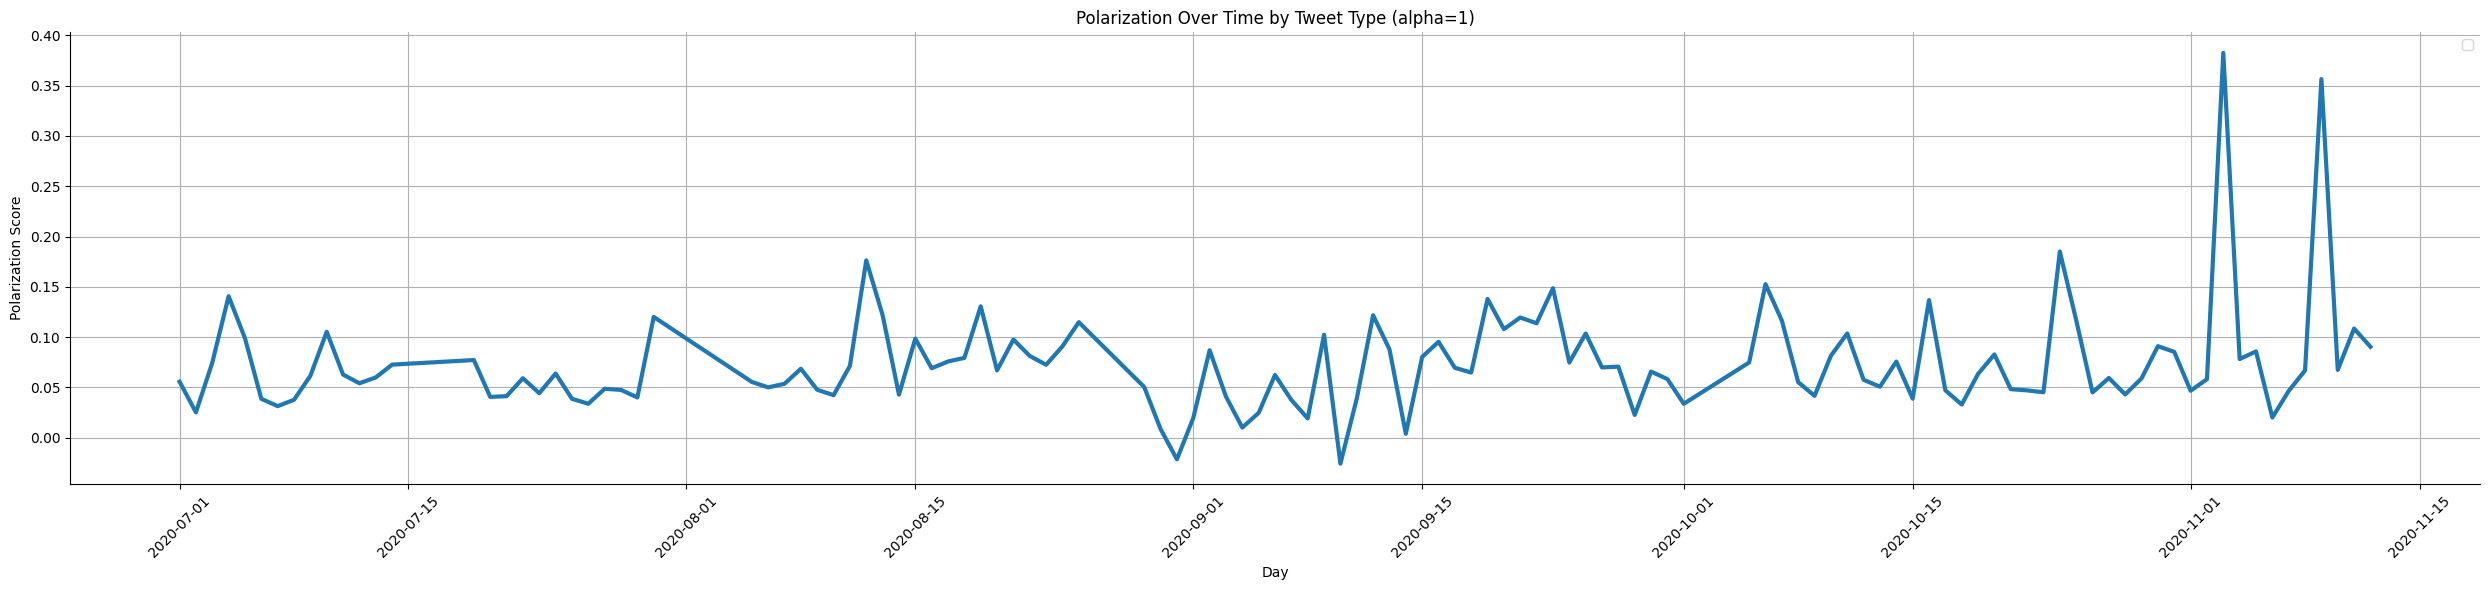

In [54]:
# Plot the polarization scores over time, grouped by Tweet_Type
plt.figure(figsize=(25, 6))
plt.plot(polarization_bydate_Duclos_df['Date'], polarization_bydate_Duclos_df['Polarization_Duclos'],  lw = 3)


# Remove the top and right spines (borders)
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.title(f'Polarization Over Time by Tweet Type (alpha={1})')
plt.xlabel('Day')
plt.ylabel('Polarization Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Measurement of Polarization (replication from the paper: Ray, et.al (1994))

combining these components, the overall polarization measure is:

$$
P_\alpha(F) = \sum_{i=1}^{n} \sum_{j=1}^{n} \pi_i \pi_j \cdot |y_i - y_j| \cdot \pi_i^{1 + \alpha}
$$

Where:


*   $\pi_i$ and $\pi_j$ are the population shares of groups $i$ and $j$

*  $|y_i - y_j|$ is the distance between the sentiment scores of groups $i$  and $j$,


*   $\alpha$ controls the emphasis on within-group identification.




### calculate the polarization scores categorizeed by tweet and party type

In [30]:
df.head()

From-User-Id  To-User-Id Language  Retweet-Count  \
Created-At                                                                     
2020-07-01 19:44:00  1223446325758394369   387882597       en            0.0   
2020-07-01 19:44:00  1001407960252342273          -1       en          178.0   
2020-07-01 19:44:00  1178522693840392195          -1       en            2.0   
2020-07-01 19:44:00             64267482    65497475       en            0.0   
2020-07-01 19:44:00  1068507190103699456          -1       en           28.0   

                       PartyName                   Id     Score  \
Created-At                                                        
2020-07-01 19:44:00    BothParty  1278368973948694528  0.102564   
2020-07-01 19:44:00  Republicans  1278368973923528704 -0.589744   
2020-07-01 19:44:00    Democrats  1278368973910937600  0.692308   
2020-07-01 19:44:00  Republicans  1278368973893951489 -1.461538   
2020-07-01 19:44:00  Republicans  1278368973881511936  0.025641   

                                                        Scoring String  \
Created-At                                                               
2020-07-01 19:44:00         yep (0.31)  torturing (-0.77)  care (0.56)   
2020-07-01 19:44:00                                       ugly (-0.59)   
2020-07-01 19:44:00                            okay (0.23)  lol (0.46)   
2020-07-01 19:44:00  damage (-0.56)  incompetent (-0.54)  resign (-...   
2020-07-01 19:44:00         clean (0.44)  threat (-0.62)  admit (0.21)   

                     Negativity  Positivity  Uncovered Tokens  Total Tokens  \
Created-At                                                                    
2020-07-01 19:44:00    0.769231    0.871795                21            24   
2020-07-01 19:44:00    0.589744    0.000000                22            23   
2020-07-01 19:44:00    0.000000    0.692308                17            19   
2020-07-01 19:44:00    1.461538    0.000000                30            33   
2020-07-01 19:44:00    0.615385    0.641026                28            31   

                           Day Tweet_Type  
Created-At                                 
2020-07-01 19:44:00 2020-07-01      Reply  
2020-07-01 19:44:00 2020-07-01    Retweet  
2020-07-01 19:44:00 2020-07-01    Retweet  
2020-07-01 19:44:00 2020-07-01      Reply  
2020-07-01 19:44:00 2020-07-01    Retweet

In [31]:
# Function to calculate polarization according to Esteban and Ray's model
def polarization_Ray(alpha, dta):
    totalcount = dta.count()
    rho = dta.value_counts()
    rho = pd.DataFrame({'mean': rho.index, 'share': rho.values})
    rho['share_ratio'] = rho['share'] / totalcount

    #shares to represent the identification
    shares = rho['share_ratio'].values
    sharesj = shares
    sharesi = np.power(shares, 1 + alpha).reshape(1, rho.shape[0])

    #mean difference is the alienation
    meani = np.array([rho['mean']] * rho.shape[0]).reshape(rho.shape[0], rho.shape[0]).transpose()
    meanj = np.array([rho['mean']] * rho.shape[0]).reshape(rho.shape[0], rho.shape[0])

    meandiff = abs(np.subtract(meani, meanj))

    # total polarization
    er = np.matmul(np.matmul(sharesi, meandiff), rho['share_ratio'].values)

    return er[0]



In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24201654 entries, 2020-07-01 19:44:00 to 2020-11-12 17:47:00
Data columns (total 14 columns):
 #   Column            Dtype         
---  ------            -----         
 0   From-User-Id      int64         
 1   To-User-Id        int64         
 2   Language          object        
 3   Retweet-Count     float64       
 4   PartyName         object        
 5   Id                int64         
 6   Score             float64       
 7   Scoring String    object        
 8   Negativity        float64       
 9   Positivity        float64       
 10  Uncovered Tokens  int64         
 11  Total Tokens      int64         
 12  Day               datetime64[ns]
 13  Tweet_Type        object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 2.7+ GB


### the overall polarization among di

In [33]:
# Assuming df is your dataset with 'PartyName', 'Tweet_Type', and 'Score' columns
tweet_groups = df.groupby(['Tweet_Type', 'PartyName'])

overall_polarization_bygroup = []

for dtagroup, dtagroup_df in tweet_groups:
    er = polarization_Ray(1, dtagroup_df['Score'])
    overall_polarization_bygroup.append([dtagroup, er])

# Convert the results to a DataFrame for easier manipulation
overall_polarization_df = pd.DataFrame(overall_polarization_bygroup, columns=['Group', 'Polarization'])
overall_polarization_df[['Tweet_Type', 'PartyName']] = pd.DataFrame(overall_polarization_df['Group'].tolist(), index=overall_polarization_df.index)
overall_polarization_df = overall_polarization_df.drop(columns=['Group'])

# Display the result
print(overall_polarization_df)

    Polarization     Tweet_Type    PartyName
0       0.042990  Original Post    BothParty
1       0.049441  Original Post    Democrats
2       0.064449  Original Post      Neither
3       0.038467  Original Post  Republicans
4       0.032715          Reply    BothParty
5       0.053772          Reply    Democrats
6       0.047153          Reply      Neither
7       0.054044          Reply  Republicans
8       0.042453        Retweet    BothParty
9       0.047227        Retweet    Democrats
10      0.037173        Retweet      Neither
11      0.037039        Retweet  Republicans


In [53]:
overall_polarization_df_two_party = overall_polarization_df[overall_polarization_df['PartyName'].isin(['Democrats', 'Republicans'])]
overall_polarization_df_two_party

Polarization     Tweet_Type    PartyName
1       0.049441  Original Post    Democrats
3       0.038467  Original Post  Republicans
5       0.053772          Reply    Democrats
7       0.054044          Reply  Republicans
9       0.047227        Retweet    Democrats
11      0.037039        Retweet  Republicans

### overall polarization by tweet type (alpha = 0 , 0.25, 1)

In [231]:
#overall polarization by tweet type (alpha = 1)

tweet_groups1 = df.groupby(['Tweet_Type'])

overall_polarization_bygroup = []

for dtagroup, dtagroup_df in tweet_groups1:
    er = polarization_Ray(1, dtagroup_df['Score'])
    overall_polarization_bygroup.append([dtagroup, er])

# Convert the results to a DataFrame for easier manipulation
overall_polarization_df_alpha1 = pd.DataFrame(overall_polarization_bygroup, columns=['Group', 'Polarization'])
overall_polarization_df_alpha1[['Tweet_Type']] = pd.DataFrame(overall_polarization_df_alpha1['Group'].tolist(), index=overall_polarization_df.index)
overall_polarization_df_alpha1 = overall_polarization_df_alpha1.drop(columns=['Group'])

# Display the result
print(overall_polarization_df_alpha1)

   Polarization     Tweet_Type
0      0.045579  Original Post
1      0.051701          Reply
2      0.039391        Retweet


In [235]:
tweet_groups2 = df.groupby(['Tweet_Type'])

overall_polarization_bygroup = []

for dtagroup, dtagroup_df in tweet_groups1:
    er = polarization_Ray(0, dtagroup_df['Score'])
    overall_polarization_bygroup.append([dtagroup, er])

# Convert the results to a DataFrame for easier manipulation
overall_polarization_df_alpha0 = pd.DataFrame(overall_polarization_bygroup, columns=['Group', 'Polarization'])
overall_polarization_df_alpha0[['Tweet_Type']] = pd.DataFrame(overall_polarization_df_alpha0['Group'].tolist(), index=overall_polarization_df.index)
overall_polarization_df_alpha0 = overall_polarization_df_alpha0.drop(columns=['Group'])

# Display the result
print(overall_polarization_df_alpha0)

   Polarization     Tweet_Type
0      0.818656  Original Post
1      0.815599          Reply
2      0.721677        Retweet


In [238]:
tweet_groups2 = df.groupby(['Tweet_Type'])

overall_polarization_bygroup = []

for dtagroup, dtagroup_df in tweet_groups1:
    er = polarization_Ray(0.25, dtagroup_df['Score'])
    overall_polarization_bygroup.append([dtagroup, er])

# Convert the results to a DataFrame for easier manipulation
overall_polarization_df_alpha025 = pd.DataFrame(overall_polarization_bygroup, columns=['Group', 'Polarization'])
overall_polarization_df_alpha025[['Tweet_Type']] = pd.DataFrame(overall_polarization_df_alpha025['Group'].tolist(), index=overall_polarization_df.index)
# overall_polarization_df_alpha025 = overall_polarization_df_alpha0.drop(columns=['Group'])

# Display the result
print(overall_polarization_df_alpha025)

              Group  Polarization     Tweet_Type
0  (Original Post,)      0.256793  Original Post
1          (Reply,)      0.260207          Reply
2        (Retweet,)      0.236644        Retweet


### overall polarzation by partyname (alpha = 0, 0.25, 1)



In [241]:
tweet_groups = df.groupby(['PartyName'])

overall_polarization_bygroup = []

for dtagroup, dtagroup_df in tweet_groups:
    er = polarization_Ray(0.25, dtagroup_df['Score'])
    overall_polarization_bygroup.append([dtagroup, er])

# Convert the results to a DataFrame for easier manipulation
overall_polarization_df_alpha = pd.DataFrame(overall_polarization_bygroup, columns=['Group', 'Polarization'])
overall_polarization_df_alpha[['Tweet_Type']] = pd.DataFrame(overall_polarization_df_alpha['Group'].tolist(), index=overall_polarization_df_alpha.index)
# overall_polarization_df_alpha025 = overall_polarization_df_alpha0.drop(columns=['Group'])

# Display the result
print(overall_polarization_df_alpha)

            Group  Polarization   Tweet_Type
0    (BothParty,)      0.242116    BothParty
1    (Democrats,)      0.242833    Democrats
2      (Neither,)      0.239021      Neither
3  (Republicans,)      0.244014  Republicans


In [245]:
tweet_groups = df.groupby(['PartyName'])

overall_polarization_bygroup = []

for dtagroup, dtagroup_df in tweet_groups:
    er = polarization_Ray(0, dtagroup_df['Score'])
    overall_polarization_bygroup.append([dtagroup, er])

# Convert the results to a DataFrame for easier manipulation
overall_polarization_df_alpha = pd.DataFrame(overall_polarization_bygroup, columns=['Group', 'Polarization'])
overall_polarization_df_alpha[['Tweet_Type']] = pd.DataFrame(overall_polarization_df_alpha['Group'].tolist(), index=overall_polarization_df_alpha.index)
# overall_polarization_df_alpha025 = overall_polarization_df_alpha0.drop(columns=['Group'])

# Display the result
print(overall_polarization_df_alpha)

            Group  Polarization   Tweet_Type
0    (BothParty,)      0.747836    BothParty
1    (Democrats,)      0.711850    Democrats
2      (Neither,)      0.742563      Neither
3  (Republicans,)      0.760535  Republicans


In [246]:
tweet_groups = df.groupby(['PartyName'])

overall_polarization_bygroup = []

for dtagroup, dtagroup_df in tweet_groups:
    er = polarization_Ray(1, dtagroup_df['Score'])
    overall_polarization_bygroup.append([dtagroup, er])

# Convert the results to a DataFrame for easier manipulation
overall_polarization_df_alpha = pd.DataFrame(overall_polarization_bygroup, columns=['Group', 'Polarization'])
overall_polarization_df_alpha[['Tweet_Type']] = pd.DataFrame(overall_polarization_df_alpha['Group'].tolist(), index=overall_polarization_df_alpha.index)
# overall_polarization_df_alpha025 = overall_polarization_df_alpha0.drop(columns=['Group'])

# Display the result
print(overall_polarization_df_alpha)

            Group  Polarization   Tweet_Type
0    (BothParty,)      0.041150    BothParty
1    (Democrats,)      0.048725    Democrats
2      (Neither,)      0.039937      Neither
3  (Republicans,)      0.041054  Republicans


In [34]:
# Assuming df is your dataset with 'PartyName', 'Tweet_Type', 'Day', and 'Score' columns
tweet_groups = df.groupby(['Day', 'Tweet_Type', 'PartyName'])

polarization_bygroup = []

for dtagroup, dtagroup_df in tweet_groups:
    er = polarization_Ray(1, dtagroup_df['Score'])
    polarization_bygroup.append([dtagroup, er])

# Convert the results to a DataFrame for easier manipulation
polarization_Ray_df_all_groups = pd.DataFrame(polarization_bygroup, columns=['Group', 'Polarization'])
polarization_Ray_df_all_groups[['Day', 'Tweet_Type', 'PartyName']] = pd.DataFrame(polarization_Ray_df_all_groups['Group'].tolist(), index=polarization_Ray_df_all_groups.index)
#polarization_df = polarization_df.drop(columns=['Group'])

# Display the result
print(polarization_Ray_df_all_groups.head())

                                               Group  Polarization        Day  \
0    (2020-07-01 00:00:00, Original Post, BothParty)      0.037085 2020-07-01   
1    (2020-07-01 00:00:00, Original Post, Democrats)      0.033323 2020-07-01   
2      (2020-07-01 00:00:00, Original Post, Neither)      0.076098 2020-07-01   
3  (2020-07-01 00:00:00, Original Post, Republicans)      0.032910 2020-07-01   
4            (2020-07-01 00:00:00, Reply, BothParty)      0.032173 2020-07-01   

      Tweet_Type    PartyName  
0  Original Post    BothParty  
1  Original Post    Democrats  
2  Original Post      Neither  
3  Original Post  Republicans  
4          Reply    BothParty  


In [35]:
polarization_Ray_df_all_groups['Day'] = pd.to_datetime(polarization_Ray_df_all_groups['Day'].astype(str), format='%Y-%m-%d')

In [36]:
polarization_bygroup

[[(Timestamp('2020-07-01 00:00:00'), 'Original Post', 'BothParty'),
  0.03708475790648259],
 [(Timestamp('2020-07-01 00:00:00'), 'Original Post', 'Democrats'),
  0.03332257043368156],
 [(Timestamp('2020-07-01 00:00:00'), 'Original Post', 'Neither'),
  0.07609760896954286],
 [(Timestamp('2020-07-01 00:00:00'), 'Original Post', 'Republicans'),
  0.0329096334652574],
 [(Timestamp('2020-07-01 00:00:00'), 'Reply', 'BothParty'),
  0.03217322836489435],
 [(Timestamp('2020-07-01 00:00:00'), 'Reply', 'Democrats'),
  0.0518229310822002],
 [(Timestamp('2020-07-01 00:00:00'), 'Reply', 'Neither'),
  0.040550241849650406],
 [(Timestamp('2020-07-01 00:00:00'), 'Reply', 'Republicans'),
  0.047089868112257176],
 [(Timestamp('2020-07-01 00:00:00'), 'Retweet', 'BothParty'),
  0.08613510468770333],
 [(Timestamp('2020-07-01 00:00:00'), 'Retweet', 'Democrats'),
  0.03756643860228083],
 [(Timestamp('2020-07-01 00:00:00'), 'Retweet', 'Neither'),
  0.03426133663863898],
 [(Timestamp('2020-07-01 00:00:00'), 'Re

In [40]:
polarization_Ray_df_all_groups

Group  Polarization  \
0       (2020-07-01 00:00:00, Original Post, BothParty)      0.037085   
1       (2020-07-01 00:00:00, Original Post, Democrats)      0.033323   
2         (2020-07-01 00:00:00, Original Post, Neither)      0.076098   
3     (2020-07-01 00:00:00, Original Post, Republicans)      0.032910   
4               (2020-07-01 00:00:00, Reply, BothParty)      0.032173   
...                                                 ...           ...   
1435          (2020-11-12 00:00:00, Reply, Republicans)      0.049043   
1436          (2020-11-12 00:00:00, Retweet, BothParty)      0.045092   
1437          (2020-11-12 00:00:00, Retweet, Democrats)      0.049473   
1438            (2020-11-12 00:00:00, Retweet, Neither)      0.051273   
1439        (2020-11-12 00:00:00, Retweet, Republicans)      0.057250   

            Day     Tweet_Type    PartyName  
0    2020-07-01  Original Post    BothParty  
1    2020-07-01  Original Post    Democrats  
2    2020-07-01  Original Post      Neither  
3    2020-07-01  Original Post  Republicans  
4    2020-07-01          Reply    BothParty  
...         ...            ...          ...  
1435 2020-11-12          Reply  Republicans  
1436 2020-11-12        Retweet    BothParty  
1437 2020-11-12        Retweet    Democrats  
1438 2020-11-12        Retweet      Neither  
1439 2020-11-12        Retweet  Republicans  

[1440 rows x 5 columns]

In [41]:
tweet_groups = df[df['PartyName'].isin(['Democrats', 'Republicans'])].groupby(['Day','Tweet_Type','PartyName'])
polarization_two_party = []
for dtagroup, dtagroup_df in tweet_groups:
    # print(dtagroup)
    # print(dtagroup_df.shape)
    er = polarization_Ray(1, dtagroup_df['Score'])
    polarization_two_party.append([dtagroup,er])
polarization_two_party


[[(Timestamp('2020-07-01 00:00:00'), 'Original Post', 'Democrats'),
  0.03332257043368156],
 [(Timestamp('2020-07-01 00:00:00'), 'Original Post', 'Republicans'),
  0.0329096334652574],
 [(Timestamp('2020-07-01 00:00:00'), 'Reply', 'Democrats'),
  0.0518229310822002],
 [(Timestamp('2020-07-01 00:00:00'), 'Reply', 'Republicans'),
  0.047089868112257176],
 [(Timestamp('2020-07-01 00:00:00'), 'Retweet', 'Democrats'),
  0.03756643860228083],
 [(Timestamp('2020-07-01 00:00:00'), 'Retweet', 'Republicans'),
  0.0323938478856726],
 [(Timestamp('2020-07-02 00:00:00'), 'Original Post', 'Democrats'),
  0.045094284898010234],
 [(Timestamp('2020-07-02 00:00:00'), 'Original Post', 'Republicans'),
  0.04093399768905613],
 [(Timestamp('2020-07-02 00:00:00'), 'Reply', 'Democrats'),
  0.06071299465166091],
 [(Timestamp('2020-07-02 00:00:00'), 'Reply', 'Republicans'),
  0.0494273880474749],
 [(Timestamp('2020-07-02 00:00:00'), 'Retweet', 'Democrats'),
  0.05699793695262899],
 [(Timestamp('2020-07-02 00:00

In [42]:
polarization_two_party_df = pd.DataFrame(polarization_two_party,columns=['group','ER'])


polarization_two_party_df[['Day', 'Tweet_Type', 'PartyName']] = pd.DataFrame(polarization_two_party_df['group'].tolist(), index=polarization_two_party_df.index)




group        ER        Day  \
0      (2020-07-01 00:00:00, Original Post, Democrats)  0.033323 2020-07-01   
1    (2020-07-01 00:00:00, Original Post, Republicans)  0.032910 2020-07-01   
2              (2020-07-01 00:00:00, Reply, Democrats)  0.051823 2020-07-01   
3            (2020-07-01 00:00:00, Reply, Republicans)  0.047090 2020-07-01   
4            (2020-07-01 00:00:00, Retweet, Democrats)  0.037566 2020-07-01   
..                                                 ...       ...        ...   
715  (2020-11-12 00:00:00, Original Post, Republicans)  0.030130 2020-11-12   
716            (2020-11-12 00:00:00, Reply, Democrats)  0.047608 2020-11-12   
717          (2020-11-12 00:00:00, Reply, Republicans)  0.049043 2020-11-12   
718          (2020-11-12 00:00:00, Retweet, Democrats)  0.049473 2020-11-12   
719        (2020-11-12 00:00:00, Retweet, Republicans)  0.057250 2020-11-12   

        Tweet_Type    PartyName  
0    Original Post    Democrats  
1    Original Post  Republicans  
2            Reply    Democrats  
3            Reply  Republicans  
4          Retweet    Democrats  
..             ...          ...  
715  Original Post  Republicans  
716          Reply    Democrats  
717          Reply  Republicans  
718        Retweet    Democrats  
719        Retweet  Republicans  

[720 rows x 5 columns]

In [43]:
polarization_two_party_df

group        ER        Day  \
0      (2020-07-01 00:00:00, Original Post, Democrats)  0.033323 2020-07-01   
1    (2020-07-01 00:00:00, Original Post, Republicans)  0.032910 2020-07-01   
2              (2020-07-01 00:00:00, Reply, Democrats)  0.051823 2020-07-01   
3            (2020-07-01 00:00:00, Reply, Republicans)  0.047090 2020-07-01   
4            (2020-07-01 00:00:00, Retweet, Democrats)  0.037566 2020-07-01   
..                                                 ...       ...        ...   
715  (2020-11-12 00:00:00, Original Post, Republicans)  0.030130 2020-11-12   
716            (2020-11-12 00:00:00, Reply, Democrats)  0.047608 2020-11-12   
717          (2020-11-12 00:00:00, Reply, Republicans)  0.049043 2020-11-12   
718          (2020-11-12 00:00:00, Retweet, Democrats)  0.049473 2020-11-12   
719        (2020-11-12 00:00:00, Retweet, Republicans)  0.057250 2020-11-12   

        Tweet_Type    PartyName  
0    Original Post    Democrats  
1    Original Post  Republicans  
2            Reply    Democrats  
3            Reply  Republicans  
4          Retweet    Democrats  
..             ...          ...  
715  Original Post  Republicans  
716          Reply    Democrats  
717          Reply  Republicans  
718        Retweet    Democrats  
719        Retweet  Republicans  

[720 rows x 5 columns]

Tweet_Type     PartyName  
Original Post  Democrats      Axes(0.125,0.2;0.775x0.68)
               Republicans    Axes(0.125,0.2;0.775x0.68)
Reply          Democrats      Axes(0.125,0.2;0.775x0.68)
               Republicans    Axes(0.125,0.2;0.775x0.68)
Retweet        Democrats      Axes(0.125,0.2;0.775x0.68)
               Republicans    Axes(0.125,0.2;0.775x0.68)
dtype: object

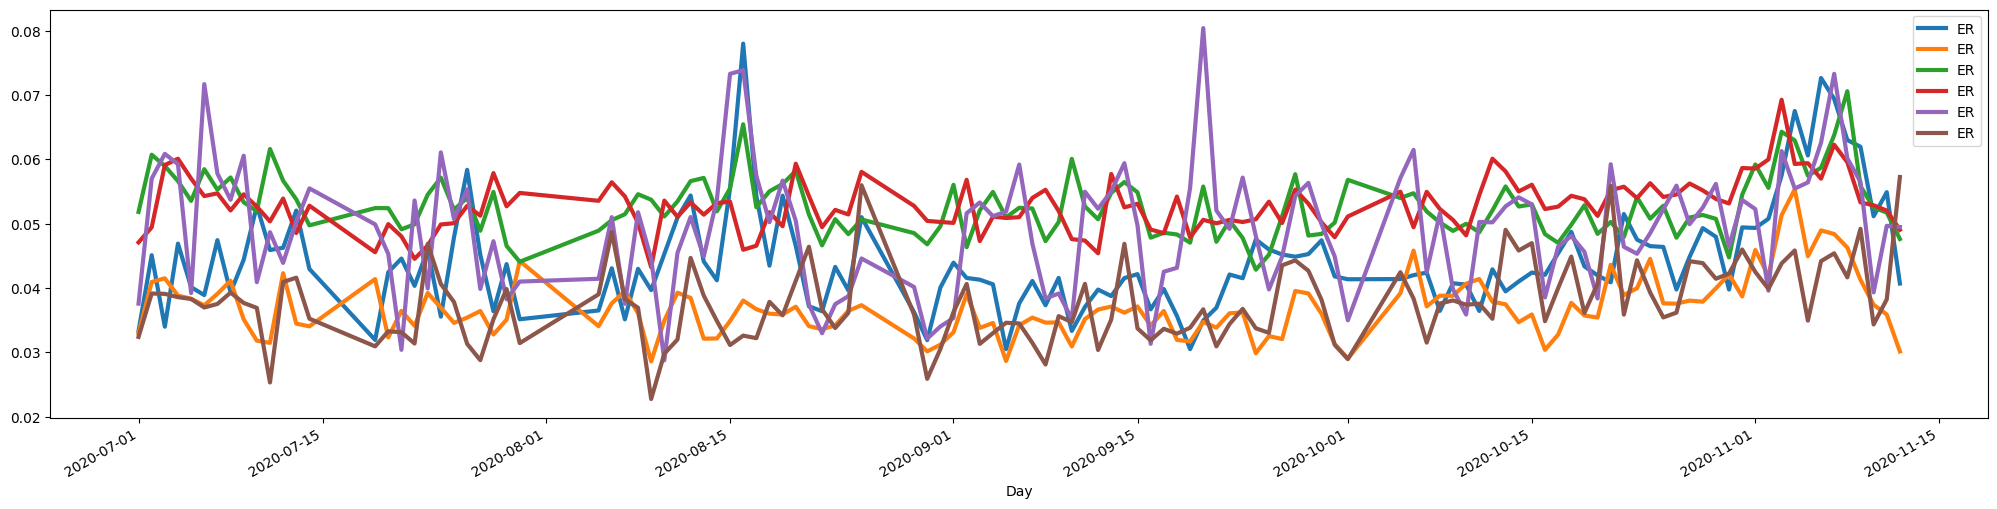

In [73]:
fig, ax = plt.subplots()
polarization_two_party_df.groupby(['Tweet_Type','PartyName']).plot(x = 'Day', y = 'ER', ax=ax, lw=3, legend=True, figsize=(25,6))

In [46]:
#  polarization between democrats and republicans tweets
p_bydate = df[df['PartyName'].isin(['Democrats', 'Republicans'])].groupby(['Day','PartyName'])
polarization_bydate = []
for dtagroup, dtagroup_df in p_bydate:
    er = polarization_Ray(1, dtagroup_df['Score'])
    polarization_bydate.append([dtagroup,er])



In [47]:
polarization_bydate

[[(Timestamp('2020-07-01 00:00:00'), 'Democrats'), 0.03867646952213293],
 [(Timestamp('2020-07-01 00:00:00'), 'Republicans'), 0.03544154951440893],
 [(Timestamp('2020-07-02 00:00:00'), 'Democrats'), 0.05693212540581436],
 [(Timestamp('2020-07-02 00:00:00'), 'Republicans'), 0.041135285962384006],
 [(Timestamp('2020-07-03 00:00:00'), 'Democrats'), 0.05745940806681792],
 [(Timestamp('2020-07-03 00:00:00'), 'Republicans'), 0.043164857475146715],
 [(Timestamp('2020-07-04 00:00:00'), 'Democrats'), 0.05681122787706584],
 [(Timestamp('2020-07-04 00:00:00'), 'Republicans'), 0.04217483291594763],
 [(Timestamp('2020-07-05 00:00:00'), 'Democrats'), 0.04074435920606526],
 [(Timestamp('2020-07-05 00:00:00'), 'Republicans'), 0.0417333900068675],
 [(Timestamp('2020-07-06 00:00:00'), 'Democrats'), 0.06819986134342526],
 [(Timestamp('2020-07-06 00:00:00'), 'Republicans'), 0.04033305499364374],
 [(Timestamp('2020-07-07 00:00:00'), 'Democrats'), 0.0563595269794803],
 [(Timestamp('2020-07-07 00:00:00'), 'R

In [49]:
polarization_party_df = pd.DataFrame(polarization_bydate,columns=['Group','ER'])
polarization_party_df[['Date', 'PartyName']] = pd.DataFrame(polarization_party_df['Group'].tolist(), index=polarization_party_df.index)
polarization_party_df

Group        ER       Date    PartyName
0      (2020-07-01 00:00:00, Democrats)  0.038676 2020-07-01    Democrats
1    (2020-07-01 00:00:00, Republicans)  0.035442 2020-07-01  Republicans
2      (2020-07-02 00:00:00, Democrats)  0.056932 2020-07-02    Democrats
3    (2020-07-02 00:00:00, Republicans)  0.041135 2020-07-02  Republicans
4      (2020-07-03 00:00:00, Democrats)  0.057459 2020-07-03    Democrats
..                                  ...       ...        ...          ...
235  (2020-11-10 00:00:00, Republicans)  0.039194 2020-11-10  Republicans
236    (2020-11-11 00:00:00, Democrats)  0.049977 2020-11-11    Democrats
237  (2020-11-11 00:00:00, Republicans)  0.041992 2020-11-11  Republicans
238    (2020-11-12 00:00:00, Democrats)  0.046831 2020-11-12    Democrats
239  (2020-11-12 00:00:00, Republicans)  0.052687 2020-11-12  Republicans

[240 rows x 4 columns]

In [50]:
polarization_party_df

Group        ER       Date    PartyName
0      (2020-07-01 00:00:00, Democrats)  0.038676 2020-07-01    Democrats
1    (2020-07-01 00:00:00, Republicans)  0.035442 2020-07-01  Republicans
2      (2020-07-02 00:00:00, Democrats)  0.056932 2020-07-02    Democrats
3    (2020-07-02 00:00:00, Republicans)  0.041135 2020-07-02  Republicans
4      (2020-07-03 00:00:00, Democrats)  0.057459 2020-07-03    Democrats
..                                  ...       ...        ...          ...
235  (2020-11-10 00:00:00, Republicans)  0.039194 2020-11-10  Republicans
236    (2020-11-11 00:00:00, Democrats)  0.049977 2020-11-11    Democrats
237  (2020-11-11 00:00:00, Republicans)  0.041992 2020-11-11  Republicans
238    (2020-11-12 00:00:00, Democrats)  0.046831 2020-11-12    Democrats
239  (2020-11-12 00:00:00, Republicans)  0.052687 2020-11-12  Republicans

[240 rows x 4 columns]

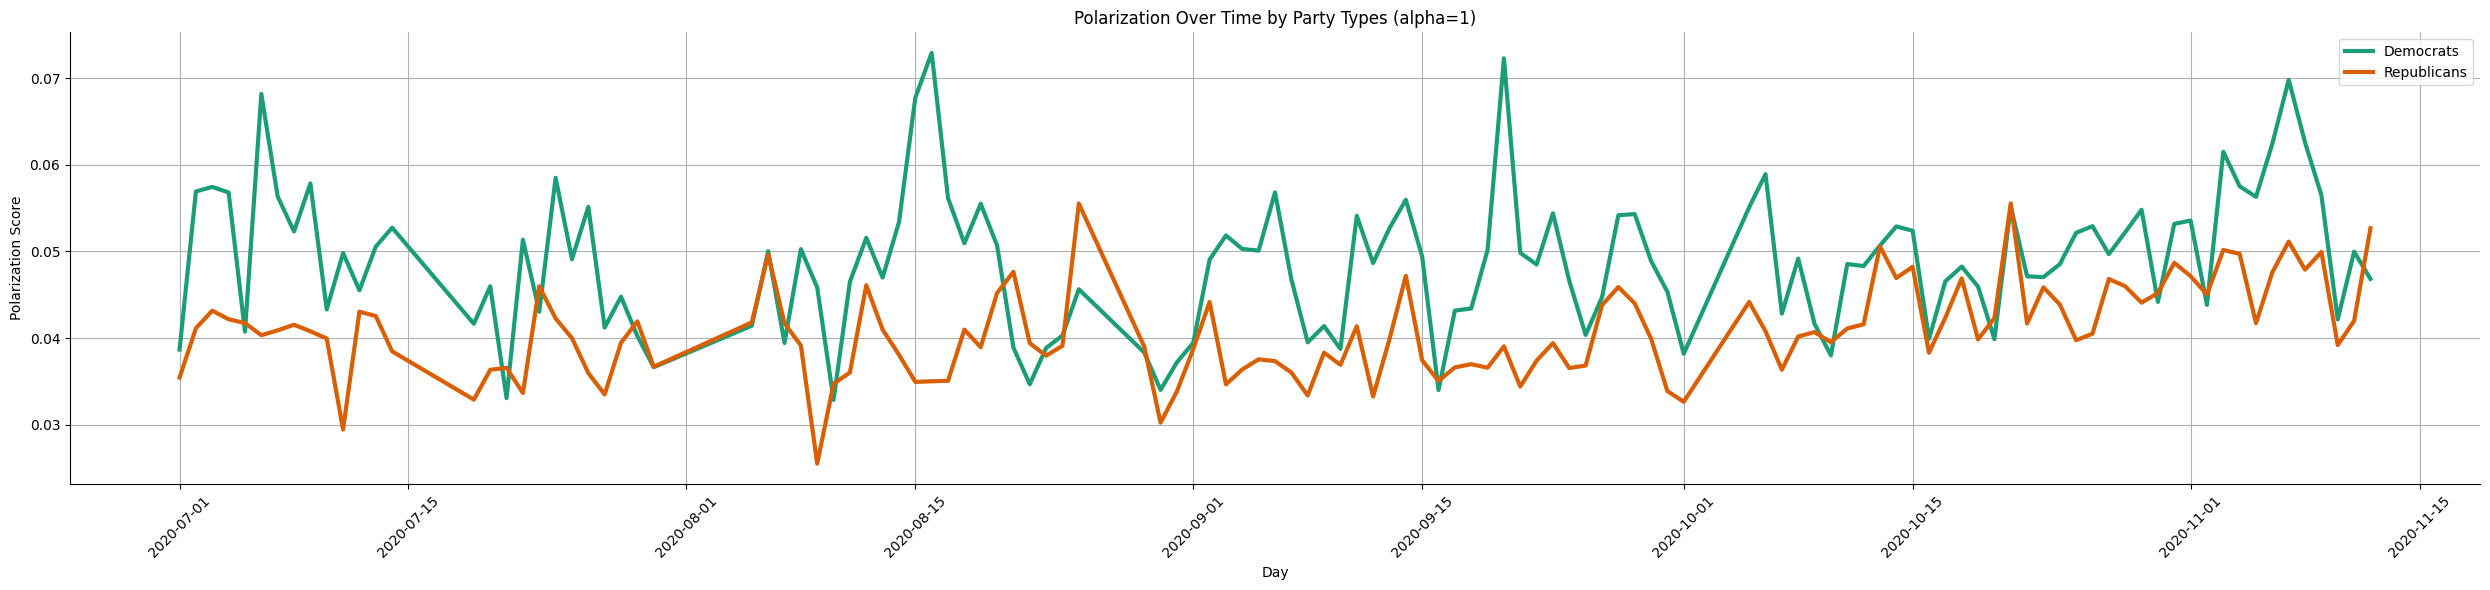

In [51]:
# Get a fancy color palette using seaborn
colors = sns.color_palette("Dark2", n_colors=4)

# Plot the polarization scores over time, grouped by PartyName
plt.figure(figsize=(25, 6))
for idx, party in enumerate(polarization_party_df['PartyName'].unique()):
    # Filter the data for the current party
    party_data = polarization_party_df[polarization_party_df['PartyName'] == party]

    # Plot the data
    plt.plot(party_data['Date'], party_data['ER'], label=party, lw=3, color=colors[idx])

# Remove the top and right spines (borders)
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the title and labels
plt.title('Polarization Over Time by Party Types (alpha=1)')
plt.xlabel('Day')
plt.ylabel('Polarization Score')

# Show legend
plt.legend()

# Enable grid
plt.grid(True)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()




In [200]:
#  polarization between democrats and republicans tweets
p_twitter_bydate = df.groupby(['Day','Tweet_Type'])
polarization_twitter_bydate = []
for dtagroup, dtagroup_df in p_twitter_bydate:
    er = polarization_Ray(1, dtagroup_df['Score'])
    polarization_twitter_bydate.append([dtagroup,er])

In [201]:
polarization_tweet_df = pd.DataFrame(polarization_twitter_bydate,columns=['Group','ER'])
polarization_tweet_df[['Date', 'Tweet_Type']] = pd.DataFrame(polarization_tweet_df['Group'].tolist(), index=polarization_tweet_df.index)


In [202]:
polarization_tweet_df

Group        ER       Date     Tweet_Type
0    (2020-07-01 00:00:00, Original Post)  0.037979 2020-07-01  Original Post
1            (2020-07-01 00:00:00, Reply)  0.046223 2020-07-01          Reply
2          (2020-07-01 00:00:00, Retweet)  0.032342 2020-07-01        Retweet
3    (2020-07-02 00:00:00, Original Post)  0.044409 2020-07-02  Original Post
4            (2020-07-02 00:00:00, Reply)  0.050386 2020-07-02          Reply
..                                    ...       ...        ...            ...
355          (2020-11-11 00:00:00, Reply)  0.049372 2020-11-11          Reply
356        (2020-11-11 00:00:00, Retweet)  0.040537 2020-11-11        Retweet
357  (2020-11-12 00:00:00, Original Post)  0.036011 2020-11-12  Original Post
358          (2020-11-12 00:00:00, Reply)  0.047033 2020-11-12          Reply
359        (2020-11-12 00:00:00, Retweet)  0.051766 2020-11-12        Retweet

[360 rows x 4 columns]

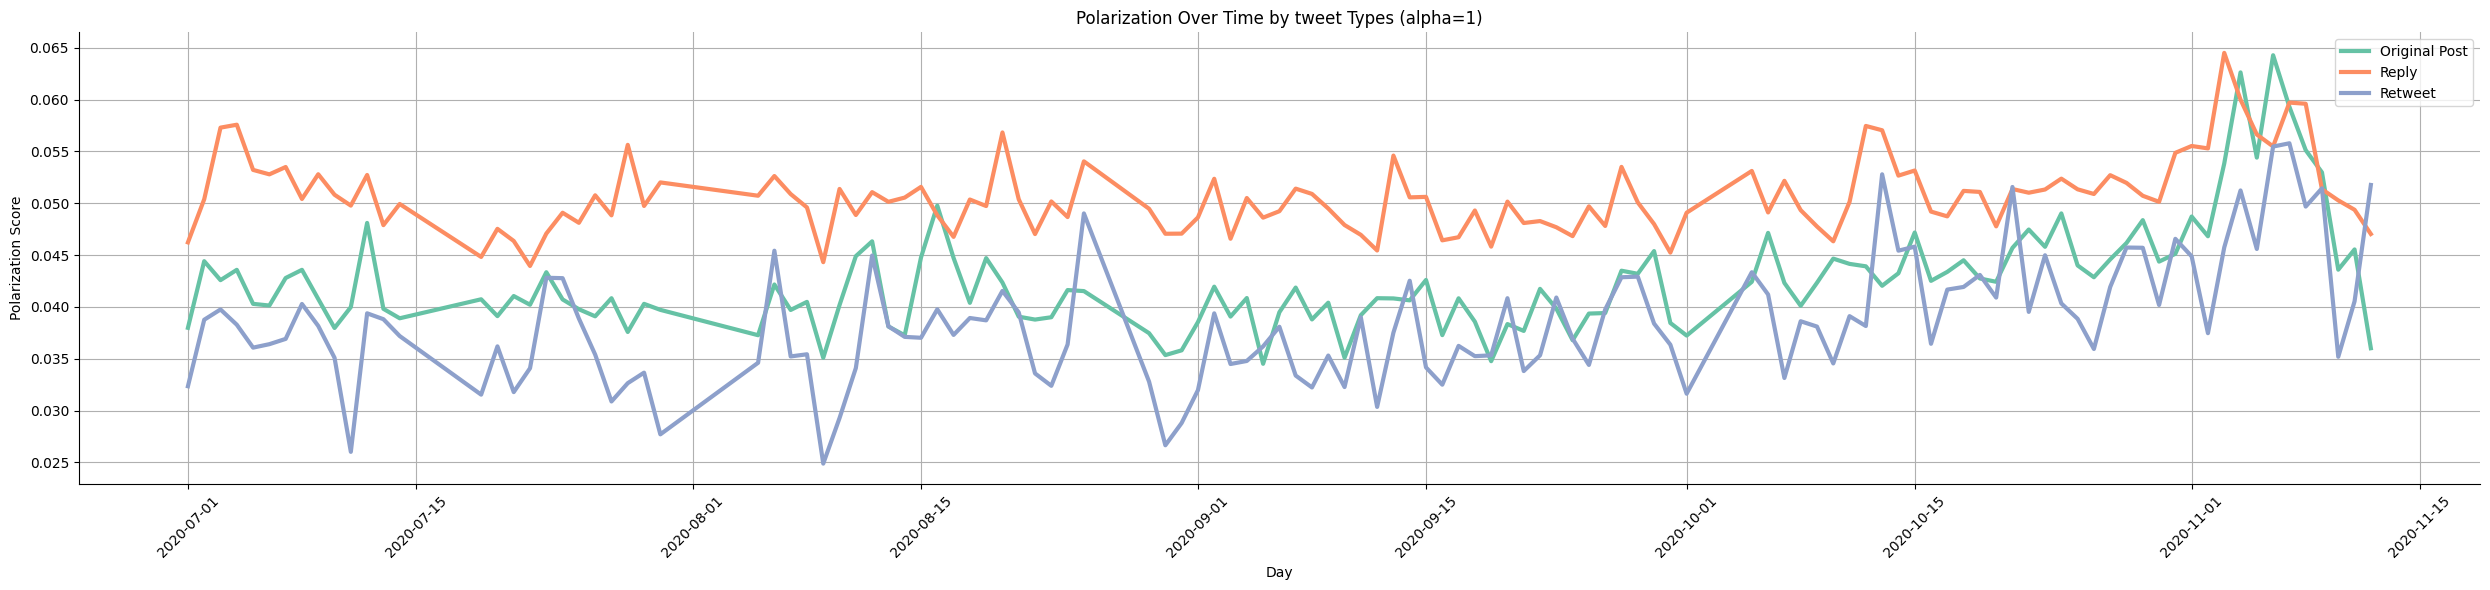

In [100]:
# Get a fancy color palette using seaborn
colors = sns.color_palette("Set2", n_colors=len(polarization_tweet_df["Tweet_Type"].unique()))

# Plot the polarization scores over time, grouped by PartyName
plt.figure(figsize=(25, 6))
for idx, tweet in enumerate(polarization_tweet_df['Tweet_Type'].unique()):
    # Filter the data for the current party
    tweet_data = polarization_tweet_df[polarization_tweet_df['Tweet_Type'] == tweet]

    # Plot the data
    plt.plot(tweet_data['Date'], tweet_data['ER'], label=tweet, lw=3, color=colors[idx])

# Remove the top and right spines (borders)
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the title and labels
plt.title('Polarization Over Time by tweet Types (alpha=1)')
plt.xlabel('Day')
plt.ylabel('Polarization Score')

# Show legend
plt.legend()

# Enable grid
plt.grid(True)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()

In [70]:
# overall polarization about election (including both party and neither)
p_bydate = df.groupby(['Day'])
polarization_bydate_Ray = []
for dtagroup, dtagroup_df in p_bydate:
    er = polarization_Ray(1, dtagroup_df['Score'])
    polarization_bydate_Ray.append([dtagroup,er])

polarization_bydate_Ray

[[(Timestamp('2020-07-01 00:00:00'),), 0.03518987169573599],
 [(Timestamp('2020-07-02 00:00:00'),), 0.04112050394457139],
 [(Timestamp('2020-07-03 00:00:00'),), 0.043118074582239624],
 [(Timestamp('2020-07-04 00:00:00'),), 0.041648132900050934],
 [(Timestamp('2020-07-05 00:00:00'),), 0.039406621765425205],
 [(Timestamp('2020-07-06 00:00:00'),), 0.03953419866885812],
 [(Timestamp('2020-07-07 00:00:00'),), 0.040135830376168566],
 [(Timestamp('2020-07-08 00:00:00'),), 0.042195631234686115],
 [(Timestamp('2020-07-09 00:00:00'),), 0.04080057560509038],
 [(Timestamp('2020-07-10 00:00:00'),), 0.038165984884988],
 [(Timestamp('2020-07-11 00:00:00'),), 0.030141444812157723],
 [(Timestamp('2020-07-12 00:00:00'),), 0.04194822838171011],
 [(Timestamp('2020-07-13 00:00:00'),), 0.04050724685695959],
 [(Timestamp('2020-07-14 00:00:00'),), 0.03952600917818448],
 [(Timestamp('2020-07-19 00:00:00'),), 0.03362886373835897],
 [(Timestamp('2020-07-20 00:00:00'),), 0.0383465638507118],
 [(Timestamp('2020-07

In [72]:
polarization_bydate_Ray_df = pd.DataFrame(polarization_bydate_Ray, columns=['Date', 'Polarization'])
polarization_bydate_Ray_df['Date'] = polarization_bydate_Ray_df['Date'].apply(lambda x: x[0])

# Convert to datetime
polarization_bydate_Ray_df['Date'] = pd.to_datetime(polarization_bydate_Ray_df['Date'])

polarization_bydate_Ray_df

Date  Polarization
0   2020-07-01      0.035190
1   2020-07-02      0.041121
2   2020-07-03      0.043118
3   2020-07-04      0.041648
4   2020-07-05      0.039407
..         ...           ...
115 2020-11-08      0.052685
116 2020-11-09      0.051581
117 2020-11-10      0.039125
118 2020-11-11      0.043089
119 2020-11-12      0.049169

[120 rows x 2 columns]

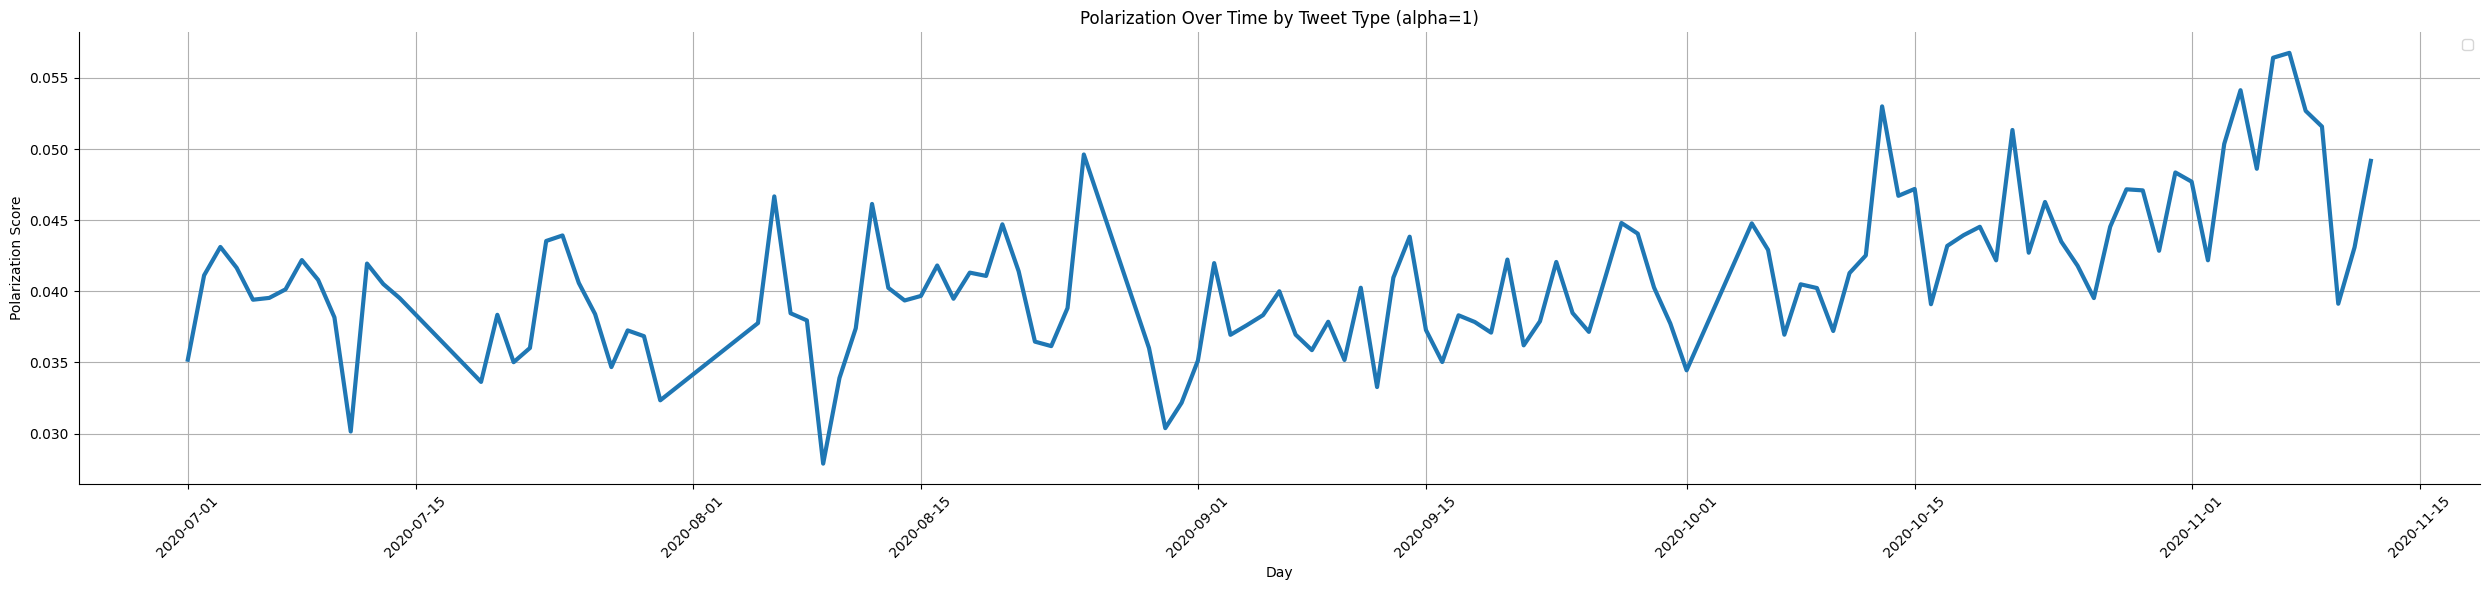

In [109]:
# Plot the polarization scores over time, grouped by Tweet_Type
plt.figure(figsize=(25, 6))
plt.plot(polarization_bydate_Ray_df['Date'], polarization_bydate_Ray_df['Polarization_Duclos'],  lw = 3)


# Remove the top and right spines (borders)
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.title(f'Polarization Over Time by Tweet Type (alpha={1})')
plt.xlabel('Day')
plt.ylabel('Polarization Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## import the data through Twitter API

In [ ]:
import tweepy

consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

# set up Tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


In [ ]:
import json
# define a function to fetch tweet data
def fetch_tweet_data(tweet_ids):
    tweet_data = []
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            tweet_data.append(tweet._json)
        except tweepy.TweepError as e:
            print(f"Error fetching tweet ID {tweet_id}: {e}")
    return tweet_data

# use the id for our dataset for data screening
tweet_ids = data["Id"].astype(str).tolist()
#
# tweet data
tweets = fetch_tweet_data(tweet_ids)

#Save tweet data to a JSON file (optional)
# with open('tweets.json', 'w') as f:
    # json.dump(tweets, f, indent=4)

# Casual effect analysis

## EMD signial processing 

In [68]:
# packages that 
from pyhht.emd import EMD
from pyhht.visualization import plot_imfs

In [79]:
polarization_bydate_Ray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          120 non-null    datetime64[ns]
 1   Polarization  120 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


2
3
4
5


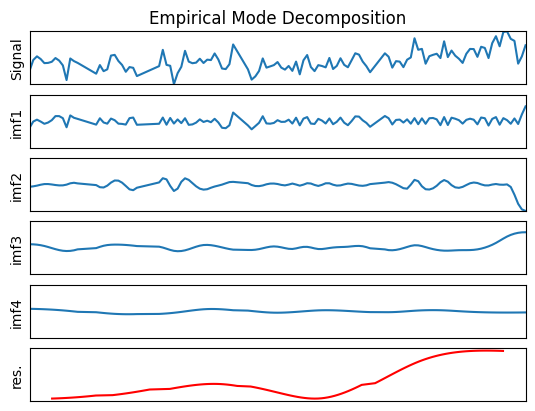

In [85]:
# EMD for overall polarization
decomposer_Ray=EMD(polarization_bydate_Ray_df['Polarization'])
imfs=decomposer_Ray.decompose()
plot_imfs(polarization_bydate_Ray_df['Polarization'].values, imfs, polarization_bydate_Ray_df['Date'].values)

2
3
4
5
6


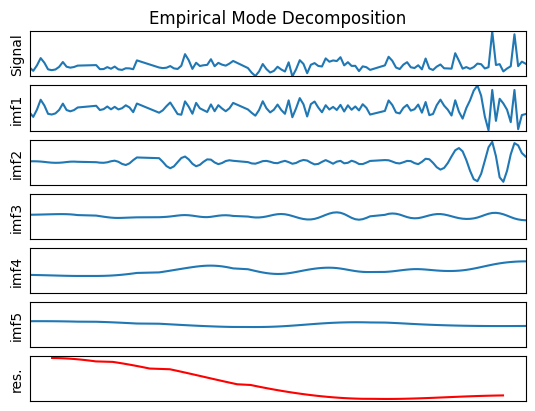

In [88]:
# EMD for overall polarization based on the Duclos method of polarization measurement 
decomposer_Duclos=EMD(polarization_bydate_Duclos_df['Polarization_Duclos'])
imfs=decomposer_Duclos.decompose()
plot_imfs(polarization_bydate_Duclos_df['Polarization_Duclos'].values, imfs, polarization_bydate_Duclos_df['Date'].values)

In [89]:
import scipy.stats
dta_Duclos = polarization_bydate_Duclos_df['Polarization_Duclos'].values

for i in range(0,5,1):
    # print(i)
    print("imf", i)
    print(scipy.stats.spearmanr(dta_Duclos, imfs[i]))
    print(scipy.stats.kendalltau(dta_Duclos, imfs[i]))
    print(np.var(imfs[i]))
    print(np.var(imfs[i]) / np.var(dta_Duclos))

imf 0
SignificanceResult(statistic=0.5881866796305297, pvalue=1.6198789173202148e-12)
SignificanceResult(statistic=0.4198879551820728, pvalue=1.0448480742524346e-11)
0.002075727868735887
0.7406253921079878
imf 1
SignificanceResult(statistic=0.308174178762414, pvalue=0.0006164327593190805)
SignificanceResult(statistic=0.20896358543417365, pvalue=0.0007138211600486876)
0.0015548196336947623
0.5547639062935864
imf 2
SignificanceResult(statistic=0.10110424335023264, pvalue=0.2718696330909184)
SignificanceResult(statistic=0.06694677871148459, pvalue=0.2782677207899181)
0.00015673320370920192
0.055922836611603424
imf 3
SignificanceResult(statistic=0.3701993193971803, pvalue=3.15836253133757e-05)
SignificanceResult(statistic=0.2375350140056022, pvalue=0.00011960422443413118)
0.000657742605310876
0.23468436412195234
imf 4
SignificanceResult(statistic=0.005875408014445446, pvalue=0.9492180678883115)
SignificanceResult(statistic=0.0030812324929971983, pvalue=0.9602010479650023)
0.000159727762080

## EEMD signal processing

### Overall polarization and statistical testing

In [193]:
!pip install PyEMD
!pip install EMD-signal


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [194]:
from PyEMD import EEMD
import pylab as plt

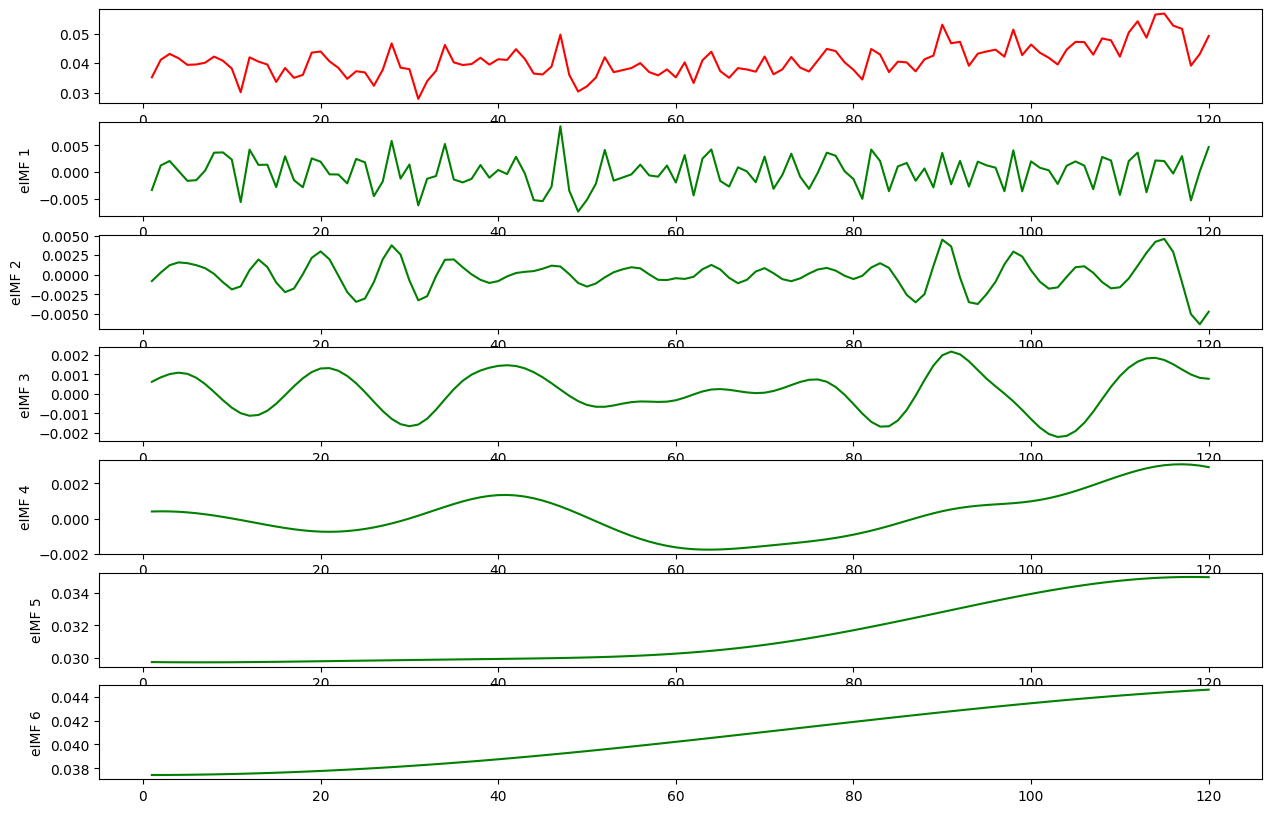

In [291]:
# eemd = EEMD(spline_kind='akima') # ‘Akima’ or ‘piecewise cubic’.
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"

# Execute EEMD on S
eIMFs = eemd.eemd(polarization_bydate_Ray_df['Polarization'].values)
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(15,10))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(np.arange(1,121, 1), polarization_bydate_Ray_df['Polarization'].values, 'r')

for n in range(nIMFs): 
    plt.subplot(nIMFs+1, 1, n+2) 
    plt.plot(np.arange(1,121, 1), eIMFs[n], 'g') 
    plt.ylabel("eIMF %i" %(n+1)) 
    plt.locator_params(axis='y', nbins=5)

plt.show()

In [253]:
# Example categorization
high_frequency_component = np.sum(eIMFs[0:3], axis=0)  # Adjust indices based on your IMFs
medium_frequency_component = np.sum(eIMFs[3:5], axis=0)
long_term_trend = eIMFs[-1]  # Typically, the last IMF represents the trend


In [254]:
from scipy.stats import ttest_1samp

# Hypothesis testing: Testing if mean of the component is significantly different from zero
t_stat, p_value = ttest_1samp(high_frequency_component, 0)
print("High Frequency Component: t-statistic =", t_stat, ", p-value =", p_value)


High Frequency Component: t-statistic = 0.225058779479987 , p-value = 0.8223195683223137


In [255]:
# Hypothesis testing: Testing if mean of the component is significantly different from zero
t_stat, p_value = ttest_1samp(medium_frequency_component, 0)
print("High Frequency Component: t-statistic =", t_stat, ", p-value =", p_value)


High Frequency Component: t-statistic = 109.67924156558328 , p-value = 2.1440043200765157e-121


In [256]:
# Hypothesis testing: Testing if mean of the component is significantly different from zero
t_stat, p_value = ttest_1samp(long_term_trend, 0)
print("High Frequency Component: t-statistic =", t_stat, ", p-value =", p_value)


High Frequency Component: t-statistic = 263.24490168869573 , p-value = 1.956557459762483e-166


In [259]:
import scipy.stats
dta = polarization_bydate_Ray_df['Polarization'].values

for i in range(0,6,1):
    # print(i)
    print("imf", i+1)
    print(scipy.stats.spearmanr(dta, eIMFs[i]))
    print(scipy.stats.kendalltau(dta, eIMFs[i]))
    print(ttest_1samp(eIMFs[i],0))
    print(np.var(eIMFs[i]))
    print(np.var(eIMFs[i]) / np.var(dta))

imf 1
SignificanceResult(statistic=0.2594346829640947, pvalue=0.004218004370632999)
SignificanceResult(statistic=0.17731092436974788, pvalue=0.004084092197652845)
TtestResult(statistic=-0.15116170634827927, pvalue=0.880104107854054, df=119)
4.640086085763607e-06
0.1660866407686205
imf 2
SignificanceResult(statistic=0.23919022154316272, pvalue=0.008511417305761448)
SignificanceResult(statistic=0.17478991596638652, pvalue=0.00464369441703577)
TtestResult(statistic=-0.2557845022074813, pvalue=0.7985588521485438, df=119)
3.995445079185446e-06
0.14301244401766747
imf 3
SignificanceResult(statistic=0.24946871310507668, pvalue=0.0060001326370851685)
SignificanceResult(statistic=0.1722689075630252, pvalue=0.005271848525108017)
TtestResult(statistic=1.6204669938538525, pvalue=0.10777895714881944, df=119)
1.0107930595281933e-06
0.036180195941698017
imf 4
SignificanceResult(statistic=0.49364539204111396, pvalue=1.0104210155264732e-08)
SignificanceResult(statistic=0.3428571428571428, pvalue=2.8136

In [292]:
# Calculate the mean of each IMF
IMF_means = [np.mean(eIMFs[i]) for i in range(nIMFs)]

# Print the mean of each IMF
for i, mean in enumerate(IMF_means):
    print(f"Mean of IMF {i+1}: {mean}")


Mean of IMF 1: -3.44737462853395e-05
Mean of IMF 2: -4.70552343975319e-05
Mean of IMF 3: 0.00011781650308722132
Mean of IMF 4: 0.0001884952335543633
Mean of IMF 5: 0.03135194393200571
Mean of IMF 6: 0.040540120180633195


In [293]:
# Prepare lists to store results
IMF_means = []
p_values = []

# Perform t-test for each IMF
for i in range(nIMFs):
    mean_value = np.mean(eIMFs[i])
    t_stat, p_value = ttest_1samp(eIMFs[i], 0)
    IMF_means.append(mean_value)
    p_values.append(p_value)

# Create a DataFrame to store the results
results_df1 = pd.DataFrame({
    'IMFs': range(1, nIMFs + 1),
    'Mean Value': IMF_means,
    'P-Value': p_values
})

# Display the DataFrame
print(results_df1)

   IMFs  Mean Value        P-Value
0     1   -0.000034   8.979180e-01
1     2   -0.000047   7.847772e-01
2     3    0.000118   2.178882e-01
3     4    0.000188   1.144768e-01
4     5    0.031352  1.753831e-147
5     6    0.040540  1.016807e-148


In [301]:
def classify_imfs(imf_number):
    if imf_number in [1, 2]:
        return 'High-Frequency'
    elif imf_number in [3, 4]:
        return 'Medium-Frequency'
    elif imf_number in [5, 6]:
        return 'Residual'

In [305]:
results_df1['Frequency Component'] = results_df1["IMFs"].apply(classify_imfs)
results_df1

IMFs  Mean Value        P-Value Frequency Component
0     1   -0.000034   8.979180e-01      High-Frequency
1     2   -0.000047   7.847772e-01      High-Frequency
2     3    0.000118   2.178882e-01    Medium-Frequency
3     4    0.000188   1.144768e-01    Medium-Frequency
4     5    0.031352  1.753831e-147            Residual
5     6    0.040540  1.016807e-148            Residual

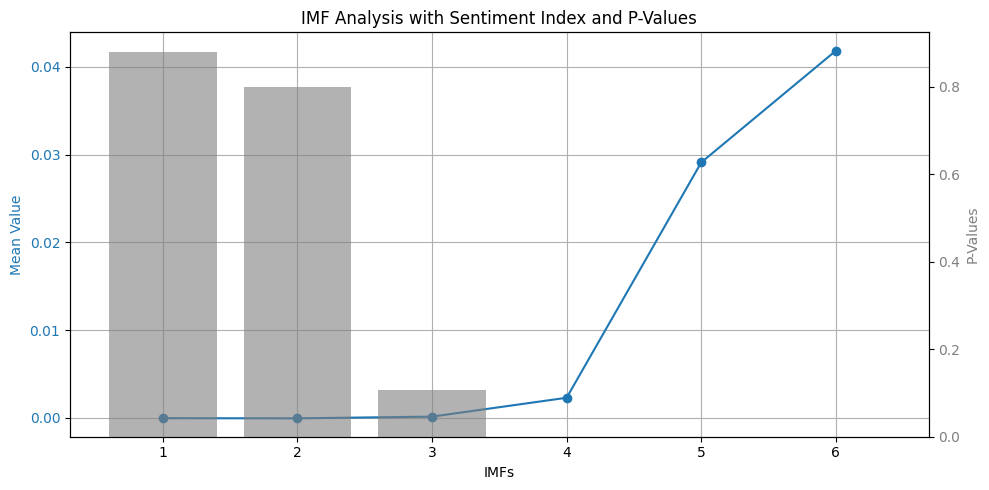

In [266]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting the line graph on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('IMFs')
ax1.set_ylabel('Mean Value', color=color)
ax1.plot(results_df['IMFs'], results_df['Mean Value'], color=color, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for the bar graph
ax2 = ax1.twinx()  
color = 'tab:gray'
ax2.set_ylabel('P-Values', color=color)
ax2.bar(results_df['IMFs'], results_df['P-Value'], color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

# Adding grid, title and adjusting layout
ax1.grid(True)
plt.title('IMF Analysis with Sentiment Index and P-Values')
fig.tight_layout()  # To adjust subplot params so that subplots are nicely fit in the figure area.
plt.show()


### EEMD FOR TWEET TYPE

In [267]:
polarization_tweet_df

Group        ER       Date     Tweet_Type
0    (2020-07-01 00:00:00, Original Post)  0.037979 2020-07-01  Original Post
1            (2020-07-01 00:00:00, Reply)  0.046223 2020-07-01          Reply
2          (2020-07-01 00:00:00, Retweet)  0.032342 2020-07-01        Retweet
3    (2020-07-02 00:00:00, Original Post)  0.044409 2020-07-02  Original Post
4            (2020-07-02 00:00:00, Reply)  0.050386 2020-07-02          Reply
..                                    ...       ...        ...            ...
355          (2020-11-11 00:00:00, Reply)  0.049372 2020-11-11          Reply
356        (2020-11-11 00:00:00, Retweet)  0.040537 2020-11-11        Retweet
357  (2020-11-12 00:00:00, Original Post)  0.036011 2020-11-12  Original Post
358          (2020-11-12 00:00:00, Reply)  0.047033 2020-11-12          Reply
359        (2020-11-12 00:00:00, Retweet)  0.051766 2020-11-12        Retweet

[360 rows x 4 columns]

In [268]:
# Initialize EEMD with specified parameters
eemd = EEMD(trials=1000, noise_width=0.1)
emd = eemd.EMD
emd.extrema_detection = "parabol"

# Filter DataFrame for 'Original Post' and extract 'ER' values
filtered_df_Original = polarization_tweet_df[polarization_tweet_df['Tweet_Type'] == "Original Post"]
if not filtered_df_Original.empty:
    data_series = filtered_df_Original['ER'].values
    eIMFs_original = eemd.eemd(data_series)
    nIMFs = eIMFs_original.shape[0]
    print(f"Number of IMFs: {nIMFs}")
else:
    print("No data available for 'Original Post'")

Number of IMFs: 6


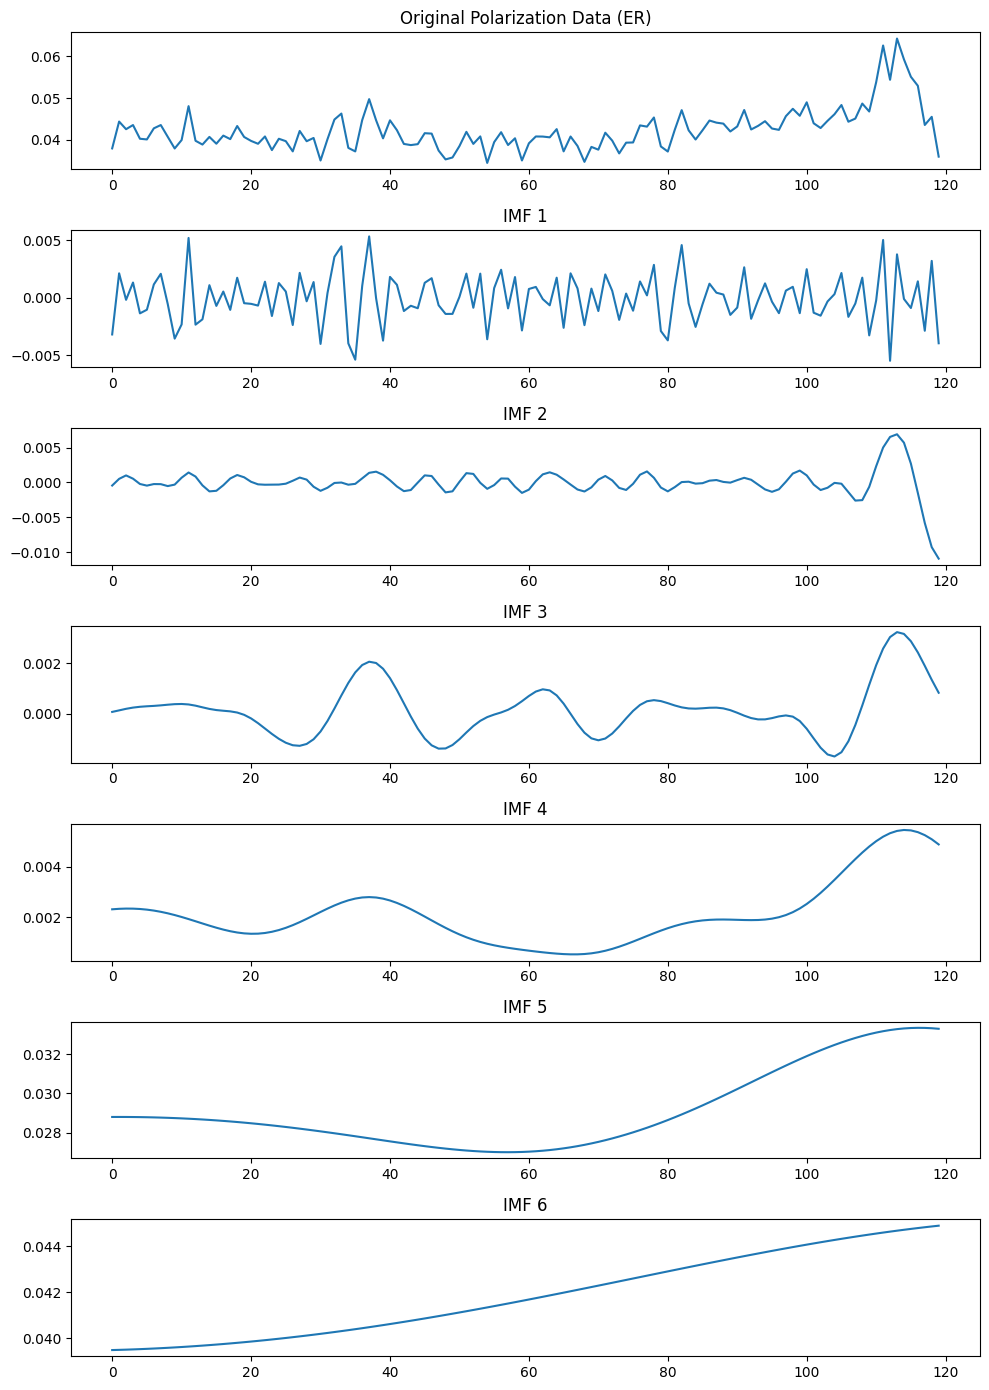

In [269]:
# Assume eIMFs is already computed and contains the IMFs
nIMFs = eIMFs_original.shape[0]
time = np.arange(len(polarization_tweet_df[polarization_tweet_df['Tweet_Type'] == "Original Post"]['ER']))

# Create subplots
fig, axs = plt.subplots(nIMFs + 1, 1, figsize=(10, 2 * (nIMFs + 1)))

# Plot the original data
axs[0].plot(time, polarization_tweet_df[polarization_tweet_df['Tweet_Type'] == "Original Post"]['ER'].values)
axs[0].set_title("Original Polarization Data (ER)")

# Plot each IMF
for i in range(nIMFs):
    axs[i + 1].plot(time, eIMFs_original[i])
    axs[i + 1].set_title(f"IMF {i + 1}")

# Adjust layout for clarity
plt.tight_layout()
plt.show()

In [286]:
# Prepare lists to store results
IMF_means = []
p_values = []

# Perform t-test for each IMF
for i in range(nIMFs):
    mean_value = np.mean(eIMFs_original[i])
    t_stat, p_value = ttest_1samp(eIMFs_original[i], 0)
    IMF_means.append(mean_value)
    p_values.append(p_value)

# Create a DataFrame to store the results
results_df2 = pd.DataFrame({
    'IMFs': range(1, nIMFs + 1),
    'Mean Value': IMF_means,
    'P-Value': p_values
})

# Display the DataFrame
print(results_df2)

   IMFs  Mean Value        P-Value
0     1   -0.000038   8.479547e-01
1     2   -0.000040   8.274253e-01
2     3    0.000142   1.357899e-01
3     4    0.002125   9.629315e-37
4     5    0.029102  2.713045e-140
5     6    0.041856  9.659050e-166


In [287]:
results_df2['Frequency Component'] = results_df2.apply(classify_imfs, axis=1)
results_df2

IMFs  Mean Value        P-Value Frequency Component
0     1   -0.000038   8.479547e-01      High-Frequency
1     2   -0.000040   8.274253e-01      High-Frequency
2     3    0.000142   1.357899e-01      High-Frequency
3     4    0.002125   9.629315e-37            Residual
4     5    0.029102  2.713045e-140            Residual
5     6    0.041856  9.659050e-166            Residual

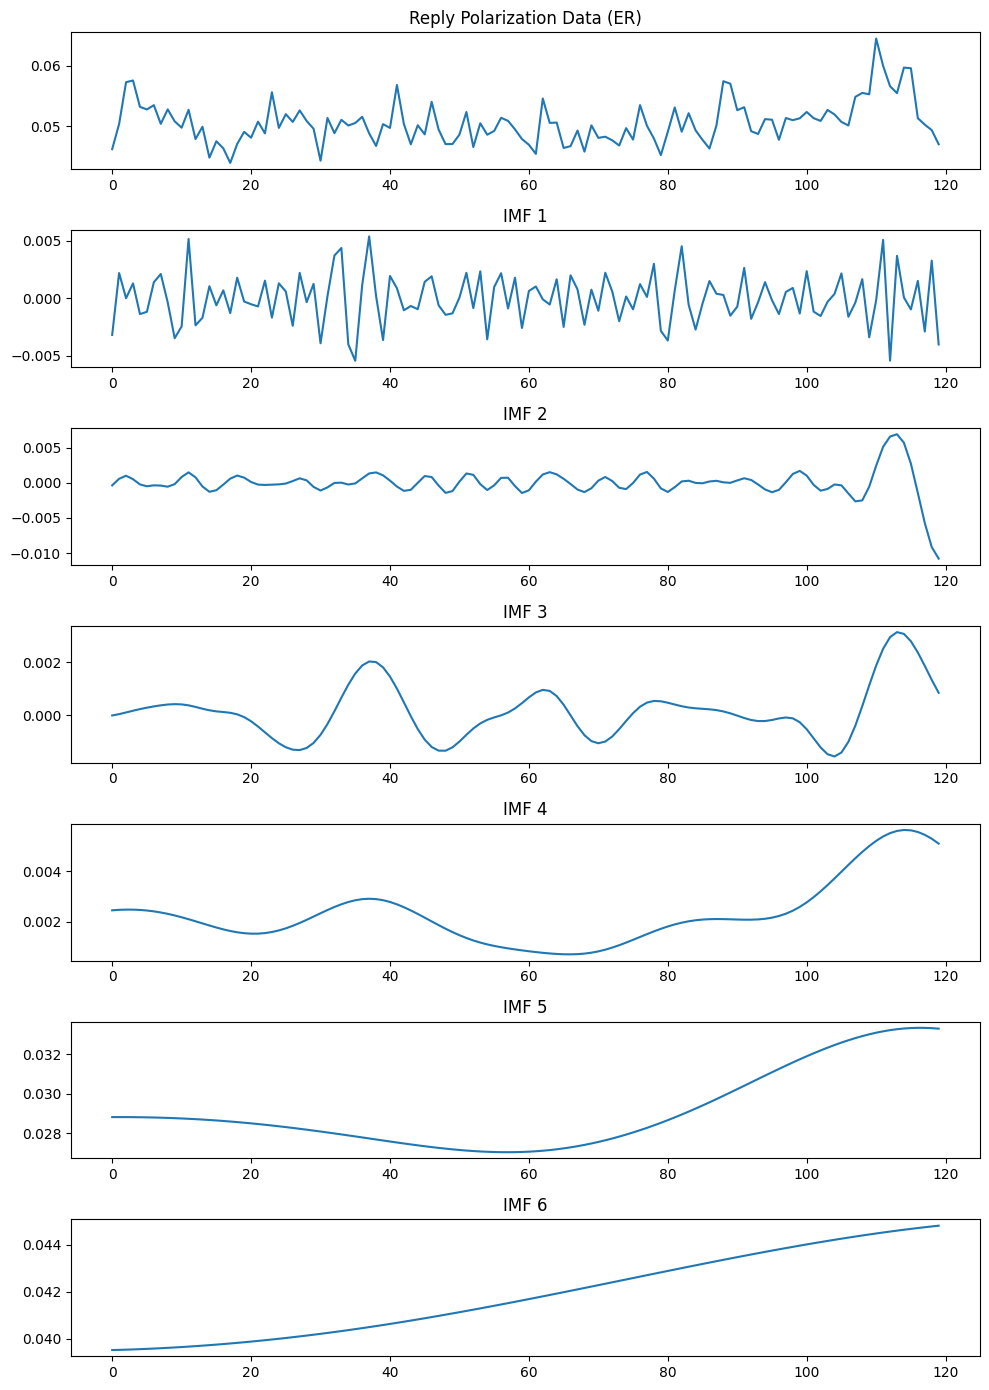

In [272]:
# Assume eIMFs is already computed and contains the IMFs
nIMFs = eIMFs.shape[0]
time = np.arange(len(polarization_tweet_df[polarization_tweet_df['Tweet_Type'] == "Reply"]['ER']))

# Create subplots
fig, axs = plt.subplots(nIMFs + 1, 1, figsize=(10, 2 * (nIMFs + 1)))

# Plot the original data
axs[0].plot(time, polarization_tweet_df[polarization_tweet_df['Tweet_Type'] == "Reply"]['ER'].values)
axs[0].set_title("Reply Polarization Data (ER)")

# Plot each IMF
for i in range(nIMFs):
    axs[i + 1].plot(time, eIMFs[i])
    axs[i + 1].set_title(f"IMF {i + 1}")

# Adjust layout for clarity
plt.tight_layout()
plt.show()

In [275]:
eIMFs = eemd.eemd(polarization_tweet_df[polarization_tweet_df['Tweet_Type'] == "Original Post"]['ER'].values)
dta = polarization_tweet_df[polarization_tweet_df['Tweet_Type'] == "Original Post"]['ER'].values

for i in range(0,6,1):
    # print(i)
    print("imf", i+1)
    print(scipy.stats.spearmanr(dta, eIMFs[i]))
    print(scipy.stats.kendalltau(dta, eIMFs[i]))
    print(scipy.stats.pearsonr(dta, eIMFs[i]))
    print(np.var(eIMFs[i]))
    print(np.var(eIMFs[i]) / np.var(dta))

imf 1
SignificanceResult(statistic=0.5640947288006111, pvalue=1.9585793691804193e-11)
SignificanceResult(statistic=0.41652661064425767, pvalue=1.522413448011887e-11)
PearsonRResult(statistic=0.47912333958525094, pvalue=3.0962931467026384e-08)
4.544755024547209e-06
0.17663413706990666
imf 2
SignificanceResult(statistic=0.3962219598583234, pvalue=7.4741185970521744e-06)
SignificanceResult(statistic=0.2899159663865546, pvalue=2.6627056347367982e-06)
PearsonRResult(statistic=0.5042215910701568, pvalue=4.32294777336639e-09)
4.186465648909331e-06
0.16270904444218745
imf 3
SignificanceResult(statistic=0.29738176262240423, pvalue=0.0009719892811546187)
SignificanceResult(statistic=0.20924369747899157, pvalue=0.0007021164587829142)
PearsonRResult(statistic=0.5691405505458366, pvalue=1.1815562480033787e-11)
1.0037734544259429e-06
0.0390121485049395
imf 4
SignificanceResult(statistic=0.584311410514619, pvalue=2.4525624380291876e-12)
SignificanceResult(statistic=0.430532212885154, pvalue=3.1119963

In [288]:
IMF_means = []
p_values = []

# Perform t-test for each IMF
for i in range(nIMFs):
    mean_value = np.mean(eIMFs[i])
    t_stat, p_value = ttest_1samp(eIMFs[i], 0)
    IMF_means.append(mean_value)
    p_values.append(p_value)

# Create a DataFrame to store the results
results_df3 = pd.DataFrame({
    'IMFs': range(1, nIMFs + 1),
    'Mean Value': IMF_means,
    'P-Value': p_values
})

# Display the DataFrame
print(results_df3)

   IMFs  Mean Value        P-Value
0     1   -0.000122   4.754042e-01
1     2   -0.000036   7.971197e-01
2     3    0.000216   5.248326e-02
3     4    0.000419   8.049511e-08
4     5    0.032968  5.274241e-195
5     6    0.050066  1.197596e-221


In [289]:
results_df3['Frequency Component'] = results_df2.apply(classify_imfs, axis=1)
results_df3

IMFs  Mean Value        P-Value Frequency Component
0     1   -0.000122   4.754042e-01      High-Frequency
1     2   -0.000036   7.971197e-01      High-Frequency
2     3    0.000216   5.248326e-02      High-Frequency
3     4    0.000419   8.049511e-08            Residual
4     5    0.032968  5.274241e-195            Residual
5     6    0.050066  1.197596e-221            Residual

In [277]:
eIMFs = eemd.eemd(polarization_tweet_df[polarization_tweet_df['Tweet_Type'] == "Reply"]['ER'].values)
dta = polarization_tweet_df[polarization_tweet_df['Tweet_Type'] == "Reply"]['ER'].values

for i in range(0,6,1):
    # print(i)
    print("imf", i+1)
    print(scipy.stats.spearmanr(dta, eIMFs[i]))
    print(scipy.stats.kendalltau(dta, eIMFs[i]))
    print(scipy.stats.pearsonr(dta, eIMFs[i]))
    print(np.var(eIMFs[i]))
    print(np.var(eIMFs[i]) / np.var(dta))

imf 1
SignificanceResult(statistic=0.5765955969164525, pvalue=5.511663101679035e-12)
SignificanceResult(statistic=0.4366946778711484, pvalue=1.52305284400398e-12)
PearsonRResult(statistic=0.5830486191210716, pvalue=2.8041867179454945e-12)
3.4649906683039238e-06
0.2846345437457138
imf 2
SignificanceResult(statistic=0.6037919299951384, pvalue=2.879406939054456e-13)
SignificanceResult(statistic=0.43081232492997196, pvalue=3.013183478151379e-12)
PearsonRResult(statistic=0.594968536820097, pvalue=7.734321027295736e-13)
2.2919809859165856e-06
0.1882766866207897
imf 3
SignificanceResult(statistic=0.4179873602333495, pvalue=2.0319119472191844e-06)
SignificanceResult(statistic=0.2868347338935574, pvalue=3.3948950927084476e-06)
PearsonRResult(statistic=0.541778246493188, pvalue=1.6584335860951884e-10)
1.446560686622603e-06
0.11882893215376363
imf 4
SignificanceResult(statistic=0.44857281755677475, pvalue=2.7744344804850475e-07)
SignificanceResult(statistic=0.30812324929971985, pvalue=6.033893059

### Causal effect: Granger causality test.

In [ ]:
eIMFs_original

In [252]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag = 12  # Or another appropriate lag based on your data's frequency and characteristics
test = 'ssr_chi2test'  # This is one of the tests available; others include F-test, ssr_ftest, etc.

# Example: Testing if IMFs from 'Original Post' can predict overall polarization
gc_result = grangercausalitytests(np.column_stack((eIMFs, eIMFs_original)), maxlag=1, verbose=True)



Granger Causality
number of lags (no zero) 1


InfeasibleTestError: The Granger causality test statistic cannot be compute because the VAR has a perfect fit of the data.

## Network Analysis


In [ ]:
# Define interaction type based on Retweet-Count and presence of To-User-Id
def determine_interaction_type(tweet):
    if 'retweeted_status' in tweet:
        return 'retweet'
    elif tweet['in_reply_to_status_id'] is not None:
        return 'reply'
    else:
        return 'original'
# Apply the function to create Interaction_Type column
data['Interaction_Type'] = data.apply(determine_interaction_type, axis=1)

# Display the first few rows to check the new column
print(data.head())


       Created-At         From-User-Id  To-User-Id Language  Retweet-Count  \
0  7/1/20 7:44 PM  1223446325758394369   387882597       en            0.0   
1  7/1/20 7:44 PM  1001407960252342273          -1       en          178.0   
2  7/1/20 7:44 PM  1178522693840392195          -1       en            2.0   
3  7/1/20 7:44 PM             64267482    65497475       en            0.0   
4  7/1/20 7:44 PM  1068507190103699456          -1       en           28.0   

     PartyName                   Id     Score  \
0    BothParty  1278368973948694528  0.102564   
1  Republicans  1278368973923528704 -0.589744   
2    Democrats  1278368973910937600  0.692308   
3  Republicans  1278368973893951489 -1.461538   
4  Republicans  1278368973881511936  0.025641   

                                      Scoring String  Negativity  Positivity  \
0         yep (0.31)  torturing (-0.77)  care (0.56)    0.769231    0.871795   
1                                       ugly (-0.59)    0.589744    0.000000

In [ ]:
import networkx as nx

# Initialize directed graphs for retweets and mentions
retweet_graph = nx.DiGraph()
mention_graph = nx.DiGraph()

# Add edges to the retweet and mention graphs
for index, row in data.iterrows():
    from_user = row['From-User-Id']
    to_user = row['To-User-Id']
    party = row['PartyName']
    score = row['Score']
    interaction_type = row['Interaction_Type']

    if interaction_type == 'retweet':
        retweet_graph.add_edge(from_user, to_user, party=party, score=score)
    elif interaction_type == 'reply':
        mention_graph.add_edge(from_user, to_user, party=party, score=score)

print(f"Retweet Graph has {retweet_graph.number_of_nodes()} nodes and {retweet_graph.number_of_edges()} edges")
print(f"Mention Graph has {mention_graph.number_of_nodes()} nodes and {mention_graph.number_of_edges()} edges")


Retweet Graph has 3187037 nodes and 3187036 edges
Mention Graph has 2283751 nodes and 4383959 edges


In [ ]:
# Initialize a dictionary to store reply trees for each root tweet
reply_trees = {}

# Function to construct a reply tree
def construct_reply_tree(tweets):
    tree = nx.DiGraph()
    for tweet in tweets:
        tweet_id = tweet['id']
        user_id = tweet['user']['id']
        created_at = tweet['created_at']
        tree.add_node(tweet_id, user_id=user_id, created_at=created_at)
        if tweet['in_reply_to_status_id'] is not None:
            parent_id = tweet['in_reply_to_status_id']
            tree.add_edge(parent_id, tweet_id)
    return tree

# Group tweets by root tweet (the original tweet in each thread)
root_tweet_groups = {}
for tweet in tweets:
    root_id = tweet['in_reply_to_status_id'] if tweet['in_reply_to_status_id'] else tweet['id']
    if root_id not in root_tweet_groups:
        root_tweet_groups[root_id] = []
    root_tweet_groups[root_id].append(tweet)

# Construct reply trees for each root tweet
for root_id, group in root_tweet_groups.items():
    reply_trees[root_id] = construct_reply_tree(group)

In [ ]:
# Initialize the user reply graph
user_reply_graph = nx.DiGraph()

# Project reply trees onto the user reply graph
for root_id, tree in reply_trees.items():
    for edge in tree.edges():
        parent_id, child_id = edge
        parent_user = tree.nodes[parent_id]['user_id']
        child_user = tree.nodes[child_id]['user_id']
        if user_reply_graph.has_edge(child_user, parent_user):
            user_reply_graph[child_user][parent_user]['weight'] += 1
        else:
            user_reply_graph.add_edge(child_user, parent_user, weight=1)

print(f"User Reply Graph has {user_reply_graph.number_of_nodes()} nodes and {user_reply_graph.number_of_edges()} edges")

## Coletto method

In [ ]:
def create_interaction_graph(tweets):
    G = nx.DiGraph()
    for tweet in tweets:
        user = tweet.user.screen_name
        for reply in tweepy.Cursor(api.search_tweets, q='to:{}'.format(user), since_id=tweet.id).items():
            if hasattr(reply, 'in_reply_to_status_id_str'):
                replied_user = reply.in_reply_to_screen_name
                G.add_edge(user, replied_user)
    return G

G = create_interaction_graph(tweets)

In [ ]:
def extract_features(G):
    features = {}

    # Example feature: average degree, we can use other features as well
    features['avg_degree'] = sum(dict(G.degree()).values()) / len(G.nodes())

    # Example feature: average inter-reply time
    # This would require additional timestamp data from tweets

    # Example dyadic motif: A user replies to another user they do not follow
    dyadic_motifs = {'A': 0, 'B': 0, 'C': 0}
    for edge in G.edges():
        u, v = edge
        if not G.has_edge(v, u):
            dyadic_motifs['A'] += 1
        elif G.has_edge(v, u) and G[u][v] == G[v][u]:
            dyadic_motifs['B'] += 1
        else:
            dyadic_motifs['C'] += 1

    features.update(dyadic_motifs)

    return features

features = extract_features(G)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = []  # Feature vectors
y = []  # Labels (1 for controversial, 0 for non-controversial)

# labeled dataset
for tweet_data in labeled_tweets:
    G = create_interaction_graph(tweet_data['tweets'])
    features = extract_features(G)
    X.append(list(features.values()))
    y.append(tweet_data['label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
